# **QMP 25 CASE STUDY**

**Q.1 Understanding Error Surfaces**

In [ ]:
#All imports

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, IntSlider

In [ ]:
########################################
#Generate meaningfull data
########################################
np.random.seed(48)
heights = np.linspace(55,75,25)
weights_true = 3.68*heights - 100.42
w0_true = -100.42
w1_true = 3.86
noise = np.random.normal(0,np.sqrt(20),25)
weights = weights_true + noise
df = pd.DataFrame({'Height':heights, 'Weight':weights})
print(df)

       Height      Weight
0   55.000000   97.536346
1   55.833333  100.290994
2   56.666667  105.259771
3   57.500000  115.927569
4   58.333333  113.542734
5   59.166667  122.204636
6   60.000000  111.100971
7   60.833333  126.579993
8   61.666667  134.002545
9   62.500000  127.803068
10  63.333333  143.039003
11  64.166667  131.242536
12  65.000000  136.279420
13  65.833333  132.887031
14  66.666667  143.276267
15  67.500000  142.361685
16  68.333333  160.173936
17  69.166667  156.775546
18  70.000000  164.151134
19  70.833333  168.501172
20  71.666667  158.353265
21  72.500000  159.514146
22  73.333333  176.861065
23  74.166667  168.446551
24  75.000000  177.281851


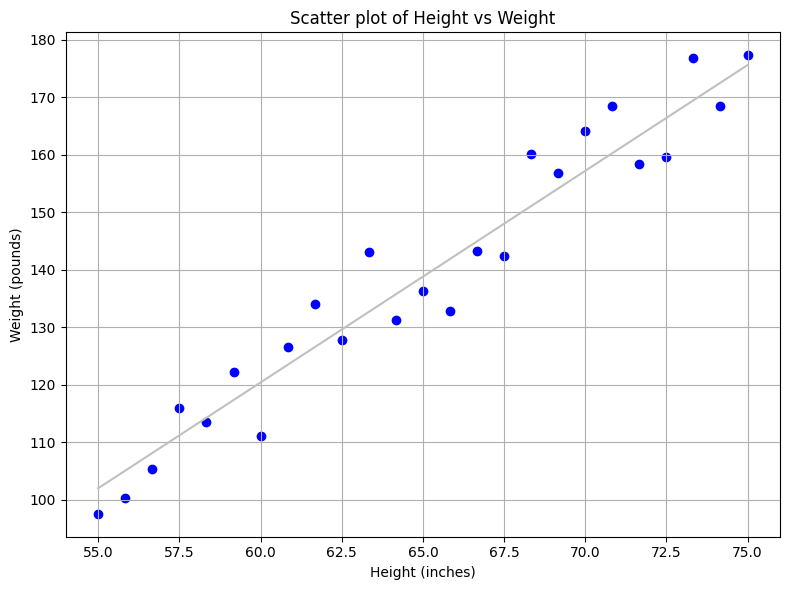

In [ ]:
########################################
#Plot scatter plot of data
########################################

plt.figure(figsize=(8,6))
plt.scatter(df['Height'],df['Weight'],color='blue',label='Noisy data')
plt.plot(heights,weights_true, color='silver',label='True function')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Scatter plot of Height vs Weight')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface

w0_range = np.linspace(-150, -50, 100)
w1_range = np.linspace(0, 6, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute the Error
def Error(W0,W1,y,X):
  MSE = np.zeros(W0.shape)
  for i in range(25):
    MSE += (y[i] - (W0+W1*X[i]))**2
  MSE = MSE/2
  return MSE

MSE = Error(W0,W1,weights,heights)

min_index = np.unravel_index(np.argmin(MSE),MSE.shape)
empirical_w0 = W0[min_index]
empirical_w1 = W1[min_index]
min_MSE = MSE[min_index]

print(f"Minimum MSE: {min_MSE}")
print(f"Located at w0 = {empirical_w0}, w1 = {empirical_w1}")

Minimum MSE: 422.07931884894896
Located at w0 = -105.55555555555554, w1 = 3.757575757575758


<ipython-input-225-ec4920055cbb>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


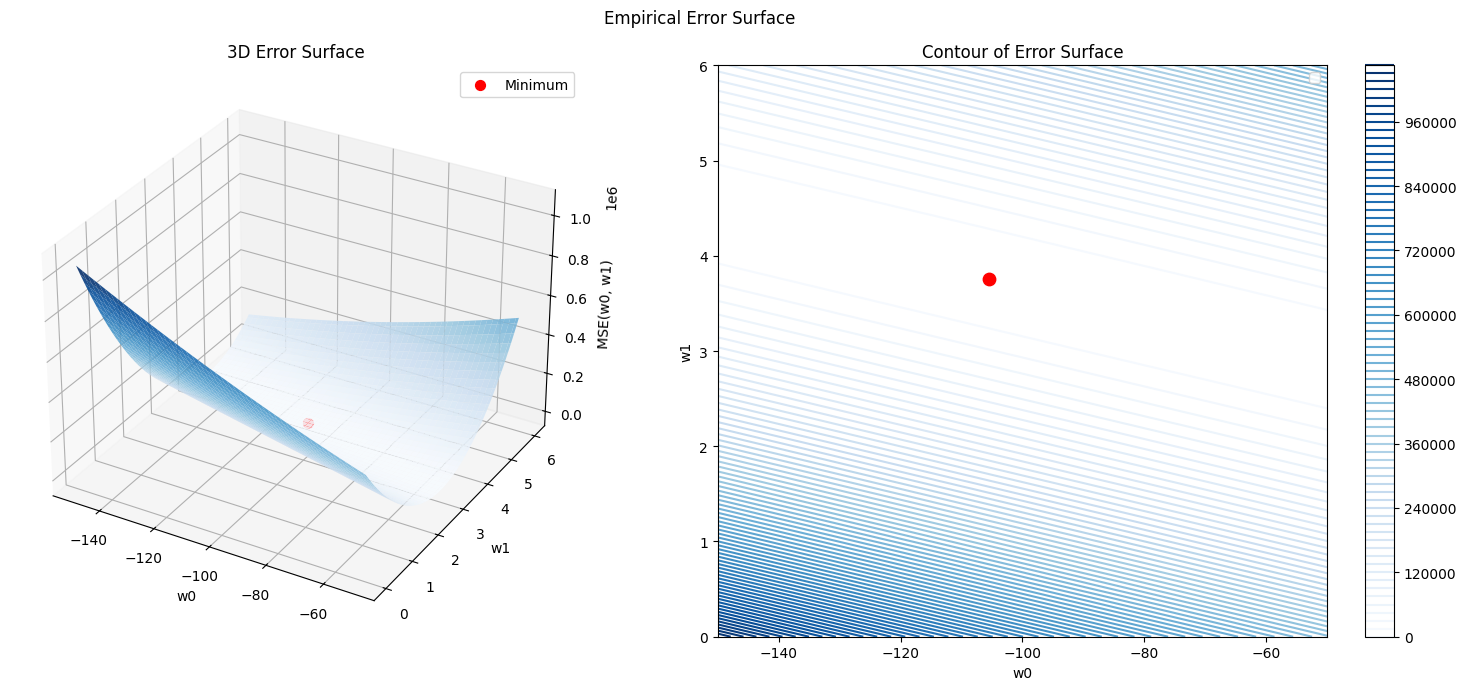

In [ ]:
#Plot 3D error surface and the corresponding contour plots

fig = plt.figure(figsize=(16, 7))

# 3D Error Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(empirical_w0, empirical_w1, min_MSE, color='r', s=50, label='Minimum')
ax1.plot_surface(W0, W1, MSE, cmap='Blues', alpha=0.9)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('MSE(w0, w1)')
ax1.set_title('3D Error Surface')
ax1.legend()

# Contour Plot
# Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(W0, W1, MSE, levels=100, cmap='Blues')
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Contour of Error Surface')
ax2.scatter(empirical_w0, empirical_w1, c='red', s=80)
ax2.legend()

plt.suptitle('Empirical Error Surface')
plt.tight_layout()
plt.show()

In [ ]:
# Least squares approach to estimate weights
# linear regression function

def LinearRegression(X,Y):
  X1 = np.c_[np.ones((25, 1)), X] #Adding bias term
  w_opt = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(Y)

  return w_opt

#Estimate optimal weight's using "LinearRegression" function
w_opt = LinearRegression(heights,weights)
print(w_opt)
w0_opt = w_opt[0]
w1_opt = w_opt[1]

[-108.10038174    3.80055555]


In [ ]:
#Estimate the targets using the input x and the estimated weights
weights_pred = w0_opt + w1_opt*heights
df['weights_predicted'] = weights_pred
print(df)

       Height      Weight  weights_predicted
0   55.000000   97.536346         100.930174
1   55.833333  100.290994         104.097303
2   56.666667  105.259771         107.264433
3   57.500000  115.927569         110.431563
4   58.333333  113.542734         113.598692
5   59.166667  122.204636         116.765822
6   60.000000  111.100971         119.932952
7   60.833333  126.579993         123.100081
8   61.666667  134.002545         126.267211
9   62.500000  127.803068         129.434340
10  63.333333  143.039003         132.601470
11  64.166667  131.242536         135.768600
12  65.000000  136.279420         138.935729
13  65.833333  132.887031         142.102859
14  66.666667  143.276267         145.269989
15  67.500000  142.361685         148.437118
16  68.333333  160.173936         151.604248
17  69.166667  156.775546         154.771377
18  70.000000  164.151134         157.938507
19  70.833333  168.501172         161.105637
20  71.666667  158.353265         164.272766
21  72.500

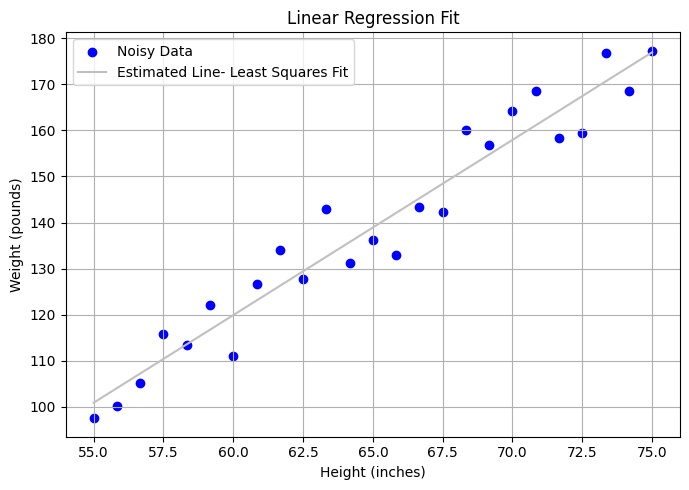

In [ ]:
# Scatter plot of actual data
plt.figure(figsize=(7, 5))
plt.scatter(heights, weights, color='blue', label='Noisy Data')

# Line of best fit (predicted values)
x_line = np.linspace(min(heights), max(heights), 100)
y_line = w0_opt + w1_opt * x_line
plt.plot(x_line, y_line, color='silver', label='Estimated Line- Least Squares Fit')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

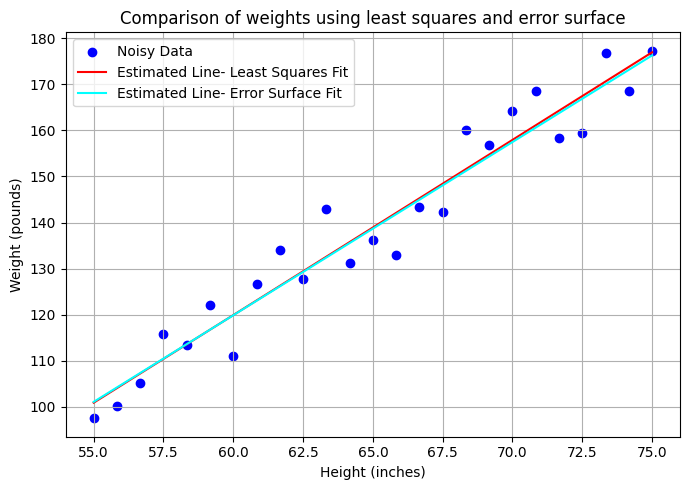

In [ ]:
#Comparison of lines of best fit using least squares and error surface

# Scatter plot of actual data
plt.figure(figsize=(7, 5))
plt.scatter(heights, weights, color='blue', label='Noisy Data')

# Line of best fit (Least squares method)
x_line = np.linspace(min(heights), max(heights), 100)
y_line = w0_opt + w1_opt * x_line
plt.plot(x_line, y_line, color='red', label='Estimated Line- Least Squares Fit')

#Line of best fit (Error Surface method)
y_line1 = empirical_w0 + empirical_w1* x_line
plt.plot(x_line, y_line1, color='cyan', label='Estimated Line- Error Surface Fit')

plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Comparison of weights using least squares and error surface')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Compare the estimated weight's using least squares approach with the error surface approach
print(f"{'Approach':<20} {'w0':<15} {'w1':<15}")
print(f"{'True Values':<20} {w0_true:<15.2f} {w1_true:<15.2f}")
print(f"{'Empirical Values':<20} {empirical_w0:<15.2f} {empirical_w1:<15.2f}")
print(f"{'Least Squares':<20} {w0_opt:<15.2f} {w1_opt:<15.2f}")
print(f"{'MSE Least Squares':<20} {Error(w0_opt,w1_opt,weights,heights):<15.2f}")
print(f"{'MSE Error Surface':<20} {Error(empirical_w0,empirical_w1,weights,heights):<15.2f}")

Approach             w0              w1             
True Values          -100.42         3.86           
Empirical Values     -105.56         3.76           
Least Squares        -108.10         3.80           
MSE Least Squares    420.47         
MSE Error Surface    422.08         


**OBSERVATIONS**

1. Error surface shape: MSE(w0,w1) (mean squared error) is a convex quadratic function, forming a smooth paraboloid.The surface has a single global minimum (no local minima) which guarantees a unique solution.

2. The least squares solution given by provides the best linear fit to the noisy data under the assumption of minimizing the squared error.The estimated slope and intercept are close to the actual values.

  The weight values obtained from empirically minimizing the error surface (via mesh grid evaluation) closely matched the least squares solution. However, the MSE from the least squares method was slightly lower, as it computes the exact analytical minimum.

3. The error surface is useful for visualizing how model accuracy changes with different parameter values.

4. Although the least squares method is precise, it can be computationally expensive for large datasets due to the matrix inversion step. In such cases, we prefer iterative optimization techniques like gradient descent, stochastic gradient descent (SGD), or mini-batch methods which scale better with data.



**Q.2 Understanding model order and overfitting**

In [ ]:
#Generate 20 data points

x = np.random.uniform(0,1,20)
y_true = np.sin(2*np.pi*x)
y = y_true + np.random.normal(0,0.1,20) #Adding noise to data
df = pd.DataFrame({'x':x, 'y':y})
print(df)

           x         y
0   0.037427  0.186375
1   0.613630 -0.646377
2   0.152068  0.865972
3   0.771877 -0.986042
4   0.263119  1.096213
5   0.771969 -1.065179
6   0.287452  1.117793
7   0.651679 -0.910700
8   0.950589 -0.153750
9   0.918474 -0.412748
10  0.164783  1.014099
11  0.337794  0.992853
12  0.090067  0.701723
13  0.692838 -1.070848
14  0.679915 -1.026610
15  0.909166 -0.618223
16  0.306076  1.065748
17  0.182108  1.179652
18  0.034778  0.160984
19  0.370199  0.631449


In [ ]:
# Obtain train and test splits

train_df = df.iloc[::2].reset_index(drop=True)
test_df = df.iloc[1::2].reset_index(drop=True)
print(train_df)
print(test_df)

X_train = train_df['x']
Y_train = train_df['y']
X_test = test_df['x']
Y_test = test_df['y']

          x         y
0  0.037427  0.186375
1  0.152068  0.865972
2  0.263119  1.096213
3  0.287452  1.117793
4  0.950589 -0.153750
5  0.164783  1.014099
6  0.090067  0.701723
7  0.679915 -1.026610
8  0.306076  1.065748
9  0.034778  0.160984
          x         y
0  0.613630 -0.646377
1  0.771877 -0.986042
2  0.771969 -1.065179
3  0.651679 -0.910700
4  0.918474 -0.412748
5  0.337794  0.992853
6  0.692838 -1.070848
7  0.909166 -0.618223
8  0.182108  1.179652
9  0.370199  0.631449


In [ ]:
# Function to fit an Mth degree polynomial to training data
def PolynomialFit(X_train,Y_train,M,lamda,regularize_bias = True):
    #Transform the data using polynomial kernel
    X_polynomial_train = np.array([[xi**i for i in range(M+1)] for xi in X_train])

    XT = X_polynomial_train.T
    I = np.eye(X_polynomial_train.shape[1])

    if not regularize_bias:
        I[0, 0] = 0

    #Find Pseudo inverse solution
    if lamda == 0:
        w_opt = np.linalg.pinv(XT @ X_polynomial_train) @ XT @ Y_train
    else:
        w_opt = np.linalg.inv(XT @ X_polynomial_train + lamda*I) @ XT @ Y_train

    #return the weight vector
    return w_opt

# Function to return the predicted values
def PolynomialPred(w_est,X_train,X_test):
    M = len(w_est) - 1

    X_polynomial_train = np.array([[xi**i for i in range(M+1)] for xi in X_train])
    X_polynomial_test = np.array([[xi**i for i in range(M+1)] for xi in X_test])

    y_train_pred = X_polynomial_train @ w_est
    y_test_pred = X_polynomial_test @ w_est

    return y_train_pred , y_test_pred

# Function to return the RMSE
def PolynomialPred_Error(w_est,X_train,X_test,Y_train,Y_test):
    M = len(w_est) - 1

    X_polynomial_train = np.array([[xi**i for i in range(M+1)] for xi in X_train])
    X_polynomial_test = np.array([[xi**i for i in range(M+1)] for xi in X_test])

    y_train_pred = X_polynomial_train @ w_est
    y_test_pred = X_polynomial_test @ w_est

    #RMSE Error
    rmse_train = np.sqrt(np.mean((y_train_pred - Y_train)**2))
    rmse_test = np.sqrt(np.mean((y_test_pred - Y_test)**2))

    return rmse_train, rmse_test

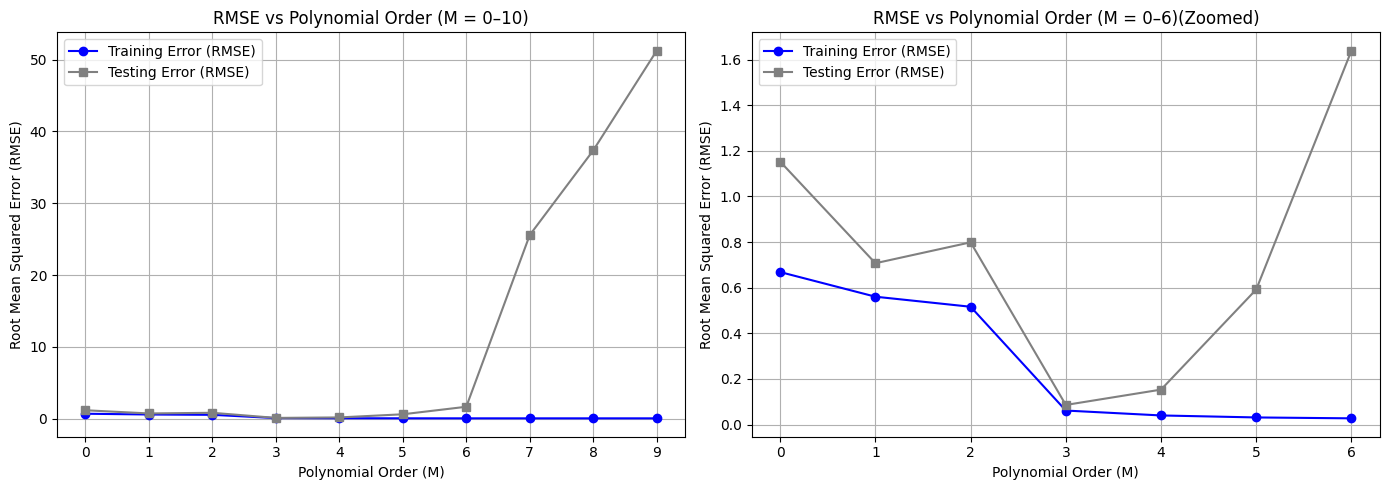

In [ ]:
#  Iterate through range of M values and plot training and test error vs polynomial order
M_range=list(range(10))
TrError = []
TeError = []
TrPred = []
TePred = []

for M in M_range:
  # Fit Mth order polynomial
  w_opt = PolynomialFit(X_train, Y_train, M, lamda=0)

  #Predict tragets
  y_train_pred, y_test_pred = PolynomialPred(w_opt, X_train, X_test)

  # Predict errors
  rmse_train, rmse_test = PolynomialPred_Error(w_opt, X_train, X_test, Y_train, Y_test)

  # Store errors
  TrError.append(rmse_train)
  TeError.append(rmse_test)

  # Store predictions
  TrPred.append(y_train_pred)
  TePred.append(y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Plot M(0–10) on the first subplot of polynomial order vs RMSE
axes[0].plot(M_range, TrError, marker='o', label='Training Error (RMSE)', color='blue')
axes[0].plot(M_range, TeError, marker='s', label='Testing Error (RMSE)', color='grey')
axes[0].set_title('RMSE vs Polynomial Order (M = 0–10)')
axes[0].set_xlabel('Polynomial Order (M)')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks(M_range)

# Plot M(0–6) on the second subplot (Zoomed version of the first plot to see the errors more closely)
M_range_zoom = list(range(7))
TrError_zoom = TrError[:7]
TeError_zoom = TeError[:7]

axes[1].plot(M_range_zoom, TrError_zoom, marker='o', label='Training Error (RMSE)', color='blue')
axes[1].plot(M_range_zoom, TeError_zoom, marker='s', label='Testing Error (RMSE)', color='grey')
axes[1].set_title('RMSE vs Polynomial Order (M = 0–6)(Zoomed)')
axes[1].set_xlabel('Polynomial Order (M)')
axes[1].set_ylabel('Root Mean Squared Error (RMSE)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(M_range_zoom)

plt.tight_layout()
plt.show()

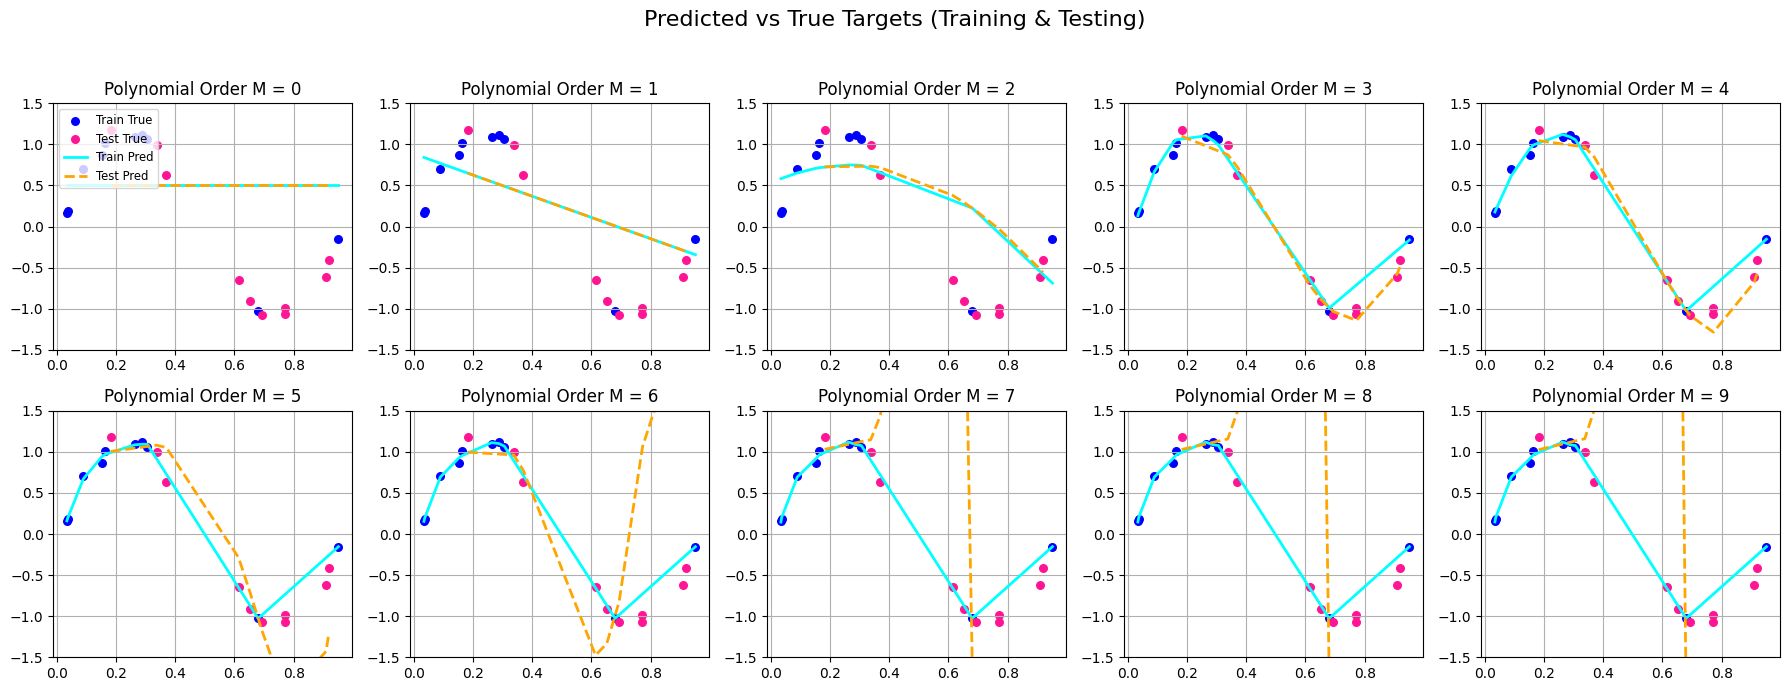

In [ ]:
#Plot training and testing estimates alogwith the original targets
num_cols = 5
num_rows = 2

plt.figure(figsize=(18, 7))
for i, M in enumerate(M_range):
    plt.subplot(num_rows, num_cols, i + 1)

    # Sort training data for smooth lines
    train_sort = np.argsort(X_train)
    test_sort = np.argsort(X_test)

    # Scatter actual values
    plt.scatter(X_train, Y_train, color='blue', label='Train True', s=30)
    plt.scatter(X_test, Y_test, color='deeppink', label='Test True', s=30)

    # Line plot for predicted values (sorted for smoothness)
    plt.plot(X_train[train_sort], TrPred[i][train_sort], color='cyan', label='Train Pred', linewidth=2)
    plt.plot(X_test[test_sort], TePred[i][test_sort], color='orange', label='Test Pred', linewidth=2, linestyle='--')

    plt.title(f'Polynomial Order M = {M}')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    if i == 0:
        plt.legend(loc='upper left', fontsize='small')

plt.suptitle('Predicted vs True Targets (Training & Testing)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# A more clear plot to training predictions and test predictions separately.
def plot_predictions(M):
    train_sort = np.argsort(X_train)
    test_sort = np.argsort(X_test)

    plt.figure(figsize=(12, 4))

    # Training plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, Y_train, color='blue', label='Train True', s=30)
    plt.plot(X_train[train_sort], TrPred[M][train_sort], color='grey', linewidth=2, label='Train Pred')
    plt.title(f'Training Data (M = {M})')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

    # Testing plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, Y_test, color='blue', label='Test True', s=30)
    plt.plot(X_test[test_sort], TePred[M][test_sort], color='grey', linewidth=2, linestyle='--', label='Test Pred')
    plt.title(f'Testing Data (M = {M})')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create and display the interactive slider
slider = widgets.IntSlider(value=0, min=0, max=len(M_range) - 1, step=1, description='Model Order M')
widgets.interact(plot_predictions, M=slider)

interactive(children=(IntSlider(value=0, description='Model Order M', max=9), Output()), _dom_classes=('widget…

<function __main__.plot_predictions(M)>

MOVE THE SLIDER TO SEE HOW THE PREDICTIONS CHANGE WITH MODEL ORDER

From the graphs, we can see that models with higher polynomial orders (M = 6 to 9) achieve very low training errors but suffer from a sharp increase in testing error. This indicates overfitting, where the model fits the training data too closely—including noise—and fails to generalize well to unseen data.

On the other hand, lower-order models (e.g., M = 0 or 1) have relatively high errors on both training and testing sets, indicating underfitting, where the model is too simple to capture the underlying patterns in the data.

Models with intermediate orders, particularly M = 3-5/6, strike a balance—achieving low error on both training and testing data. These represent a good fit and demonstrate optimal model complexity.

In [ ]:
#Increase the size of training data set to 100 points and repeat the experiments

x_1 = np.random.uniform(0,1,100)
y_1_true = np.sin(2*np.pi*x_1)
y_1 = y_1_true + np.random.normal(0,0.1,100) #Adding noise
df1 = pd.DataFrame({'x':x_1, 'y':y_1})
print(df1)

           x         y
0   0.984162 -0.196635
1   0.446678  0.370742
2   0.066667  0.406472
3   0.361095  0.871180
4   0.039846  0.232087
..       ...       ...
95  0.688409 -1.058246
96  0.817575 -0.911365
97  0.232161  0.933529
98  0.336411  0.880273
99  0.386027  0.603488

[100 rows x 2 columns]


In [ ]:
#Obtain train and test splits

train_df_1 = df1.iloc[::2].reset_index(drop=True)
test_df_1 = df1.iloc[1::2].reset_index(drop=True)
print(train_df_1)
print(test_df_1)

           x         y
0   0.984162 -0.196635
1   0.066667  0.406472
2   0.039846  0.232087
3   0.799094 -1.040071
4   0.268744  0.979574
5   0.258394  1.054058
6   0.714613 -1.074663
7   0.930031 -0.613805
8   0.194768  0.950873
9   0.451325  0.440636
10  0.028767  0.290270
11  0.824167 -0.774208
12  0.437095 -0.080526
13  0.414414  0.427390
14  0.279315  0.912460
15  0.185339  0.998192
16  0.155878  0.998874
17  0.559590 -0.284027
18  0.724109 -0.995757
19  0.931605 -0.313064
20  0.970232 -0.284262
21  0.359501  0.715339
22  0.107758  0.602725
23  0.913190 -0.781513
24  0.407941  0.665859
25  0.806432 -0.897526
26  0.467816  0.307673
27  0.645455 -0.775238
28  0.730031 -1.095861
29  0.618542 -0.652388
30  0.336268  0.671973
31  0.640914 -0.791514
32  0.539354  0.101963
33  0.384070  0.621453
34  0.606990 -0.622218
35  0.372492  0.945156
36  0.645821 -0.999662
37  0.954967 -0.121929
38  0.227429  0.863204
39  0.382915  0.680038
40  0.973338 -0.148714
41  0.414414  0.506377
42  0.97224

In [ ]:
X_train1 = train_df_1['x']
Y_train1 = train_df_1['y']
X_test1 = test_df_1['x']
Y_test1 = test_df_1['y']

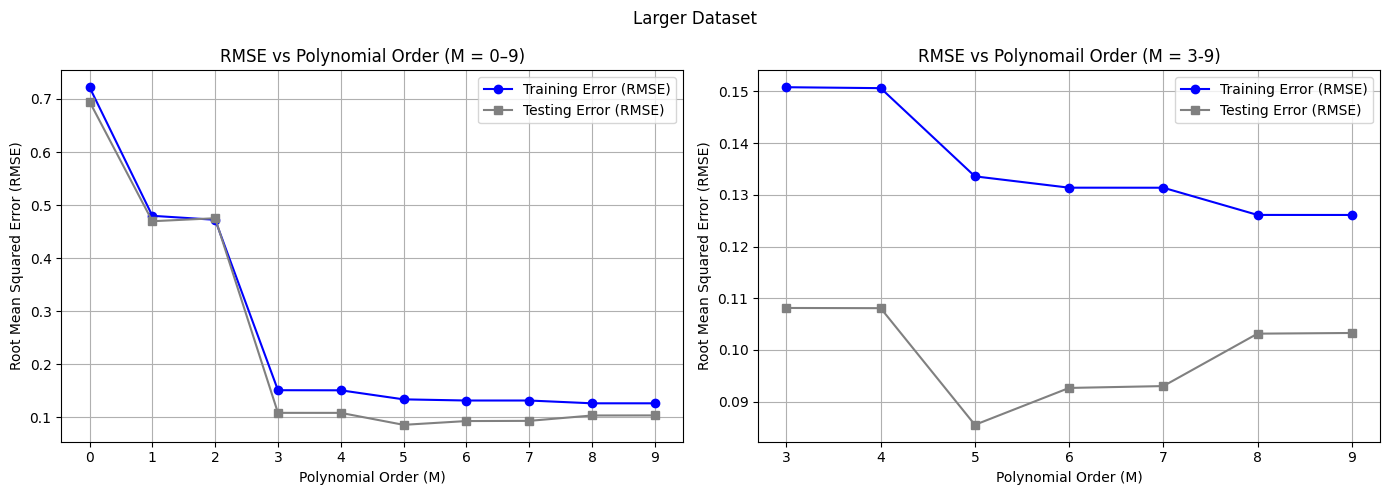

In [ ]:
#Iterate through range of M values for larger dataset
M_range=list(range(10))
TrError1 = []
TeError1 = []
TrPred1 = []
TePred1 = []

for M in M_range:
  # Fit Mth order polynomial
  w_opt_1 = PolynomialFit(X_train1, Y_train1, M, lamda=0)

  #Predict tragets
  y_train_pred_1, y_test_pred_1 = PolynomialPred(w_opt_1, X_train1, X_test1)

  # Predict errors
  rmse_train_1, rmse_test_1 = PolynomialPred_Error(w_opt_1, X_train1, X_test1, Y_train1, Y_test1)

  # Store errors
  TrError1.append(rmse_train_1)
  TeError1.append(rmse_test_1)

  # Store predictions
  TrPred1.append(y_train_pred_1)
  TePred1.append(y_test_pred_1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Plot 0–9 on the first subplot
axes[0].plot(M_range, TrError1, marker='o', label='Training Error (RMSE)', color='blue')
axes[0].plot(M_range, TeError1, marker='s', label='Testing Error (RMSE)', color='grey')
axes[0].set_title('RMSE vs Polynomial Order (M = 0–9)')
axes[0].set_xlabel('Polynomial Order (M)')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xticks(M_range)

# Plot 3-9 on the second subplot
M_range_zoom = list(range(3,10))
TrError_zoom1 = TrError1[3:10]
TeError_zoom1 = TeError1[3:10]

axes[1].plot(M_range_zoom, TrError_zoom1, marker='o', label='Training Error (RMSE)', color='blue')
axes[1].plot(M_range_zoom, TeError_zoom1, marker='s', label='Testing Error (RMSE)', color='grey')
axes[1].set_title('RMSE vs Polynomail Order (M = 3-9)')
axes[1].set_xlabel('Polynomial Order (M)')
axes[1].set_ylabel('Root Mean Squared Error (RMSE)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(M_range_zoom)

plt.suptitle('Larger Dataset')
plt.tight_layout()
plt.show()

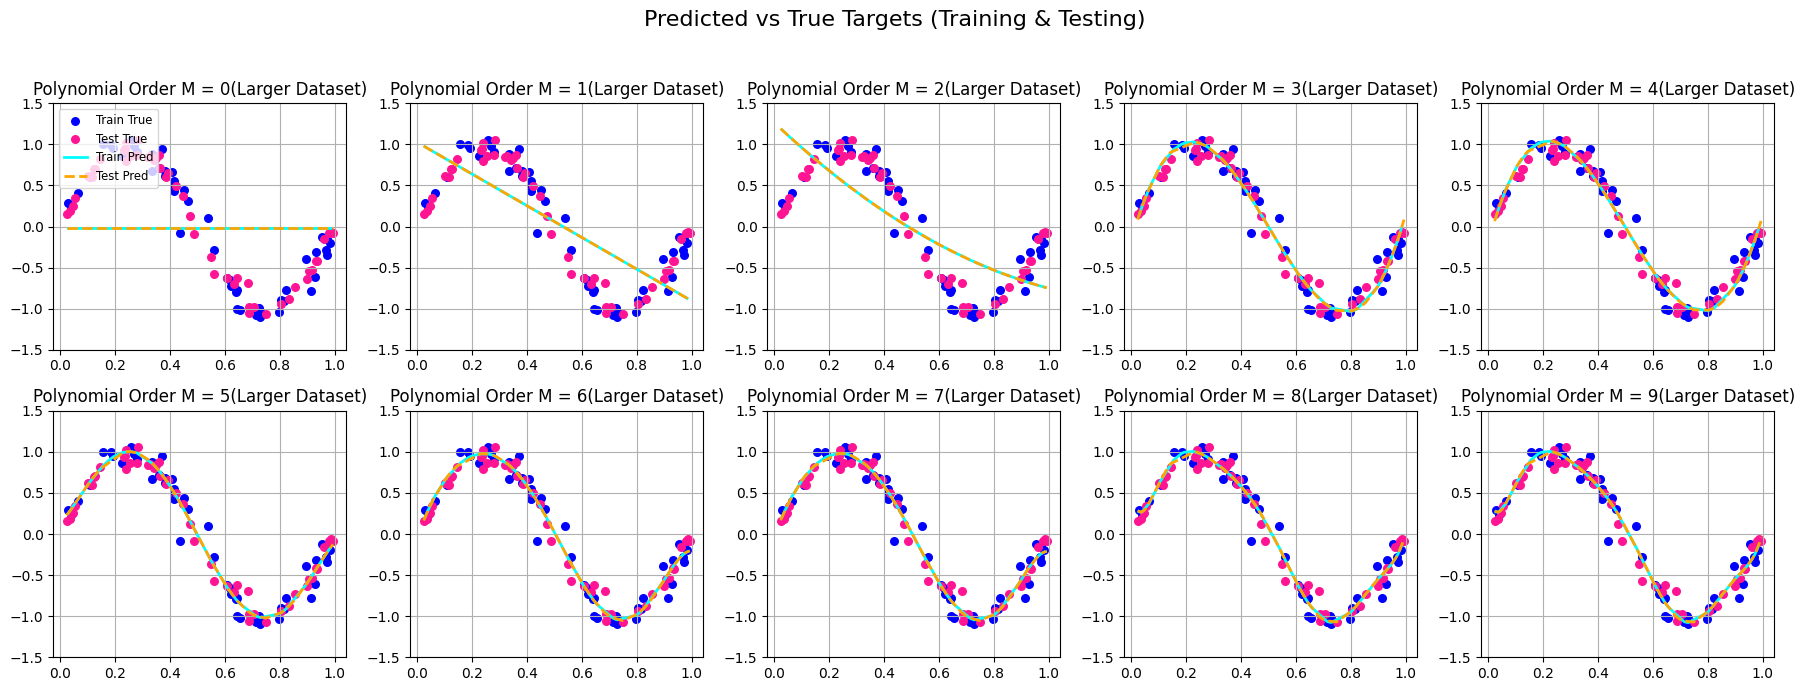

In [ ]:
# Plot training and testing estimates along with the original tragets

num_rows = 2
num_cols = 5

plt.figure(figsize=(18, 7))
for i, M in enumerate(M_range):
    plt.subplot(num_rows, num_cols, i + 1)

    # Sort training data for smooth lines
    train_sort_1 = np.argsort(X_train1)
    test_sort_1 = np.argsort(X_test1)

    # Scatter actual values
    plt.scatter(X_train1, Y_train1, color='blue', label='Train True', s=30)
    plt.scatter(X_test1, Y_test1, color='deeppink', label='Test True', s=30)

    # Line plot for predicted values (sorted for smoothness)
    plt.plot(X_train1[train_sort_1], TrPred1[i][train_sort_1], color='cyan', label='Train Pred', linewidth=2)
    plt.plot(X_test1[test_sort_1], TePred1[i][test_sort_1], color='orange', label='Test Pred', linewidth=2, linestyle='--')

    plt.title(f'Polynomial Order M = {M}(Larger Dataset)')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    if i == 0:
        plt.legend(loc='upper left', fontsize='small')

plt.suptitle('Predicted vs True Targets (Training & Testing)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# A more clear plot to training predictions and test predictions separately (Larger Dataset)
def plot_predictions_1(M):
    train_sort1 = np.argsort(X_train1)
    test_sort1 = np.argsort(X_test1)

    plt.figure(figsize=(12, 4))

    # Training plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_train1, Y_train1, color='blue', label='Train True', s=30)
    plt.plot(X_train1[train_sort1], TrPred1[M][train_sort1], color='grey', linewidth=2, label='Train Pred')
    plt.title(f'Training Data (M = {M})')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

    # Testing plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_test1, Y_test1, color='blue', label='Test True', s=30)
    plt.plot(X_test1[test_sort1], TePred1[M][test_sort1], color='grey', linewidth=2, linestyle='--', label='Test Pred')
    plt.title(f'Testing Data (M = {M})')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create and display the interactive slider
slider = widgets.IntSlider(value=0, min=0, max=len(M_range) - 1, step=1, description='Model Order M')
widgets.interact(plot_predictions_1, M=slider)

interactive(children=(IntSlider(value=0, description='Model Order M', max=9), Output()), _dom_classes=('widget…

<function __main__.plot_predictions_1(M)>

**Reduced Overfitting with More Data**

More training data helps the model generalize better. Higher-order polynomials that once overfit the small dataset now capture true patterns, reducing test error. While training error may slightly increase (as the model can't memorize all points), it's a good trade-off for better generalization. Low-order models may still underfit, but overfitting in complex models reduces — shifting the optimal model order slightly higher (around 5-7).

In [ ]:
#Effect of regularisation

def analyze_regularization(X_train, X_test, y_train, y_test, dataset_name,regularise_bias_ = True):
    M_range = range(10)
    lambdas = [0,1e-7, 1e-4, 0.01, 1]
    num_lambdas = len(lambdas)

    num_cols = 5
    num_rows = 2

    plt.figure(figsize=(20, 10))

    for i, lamda in enumerate(lambdas):
        TrError_reg, TeError_reg = [], []

        for M in M_range:
            if not regularise_bias_:
              w_opt_reg = PolynomialFit(X_train, y_train, M, lamda, False)
            else:
              w_opt_reg = PolynomialFit(X_train, y_train, M, lamda)
            rmse_train_reg, rmse_test_reg = PolynomialPred_Error(w_opt_reg, X_train, X_test, y_train, y_test)
            TrError_reg.append(rmse_train_reg)
            TeError_reg.append(rmse_test_reg)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.plot(M_range, TrError_reg, marker='o', linestyle='-', color='blue', label='Train RMSE')
        plt.plot(M_range, TeError_reg, marker='s', linestyle='--', color='grey', label='Test RMSE')

        plt.xlabel('Polynomial Degree (M)')
        plt.ylabel('RMSE')
        plt.title(f'λ = {lamda}')
        plt.grid(True)
        plt.xticks(M_range)
        if i == 0:
            plt.legend()

    plt.suptitle(f'Regularization Impact on Train/Test RMSE ({dataset_name} Dataset)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

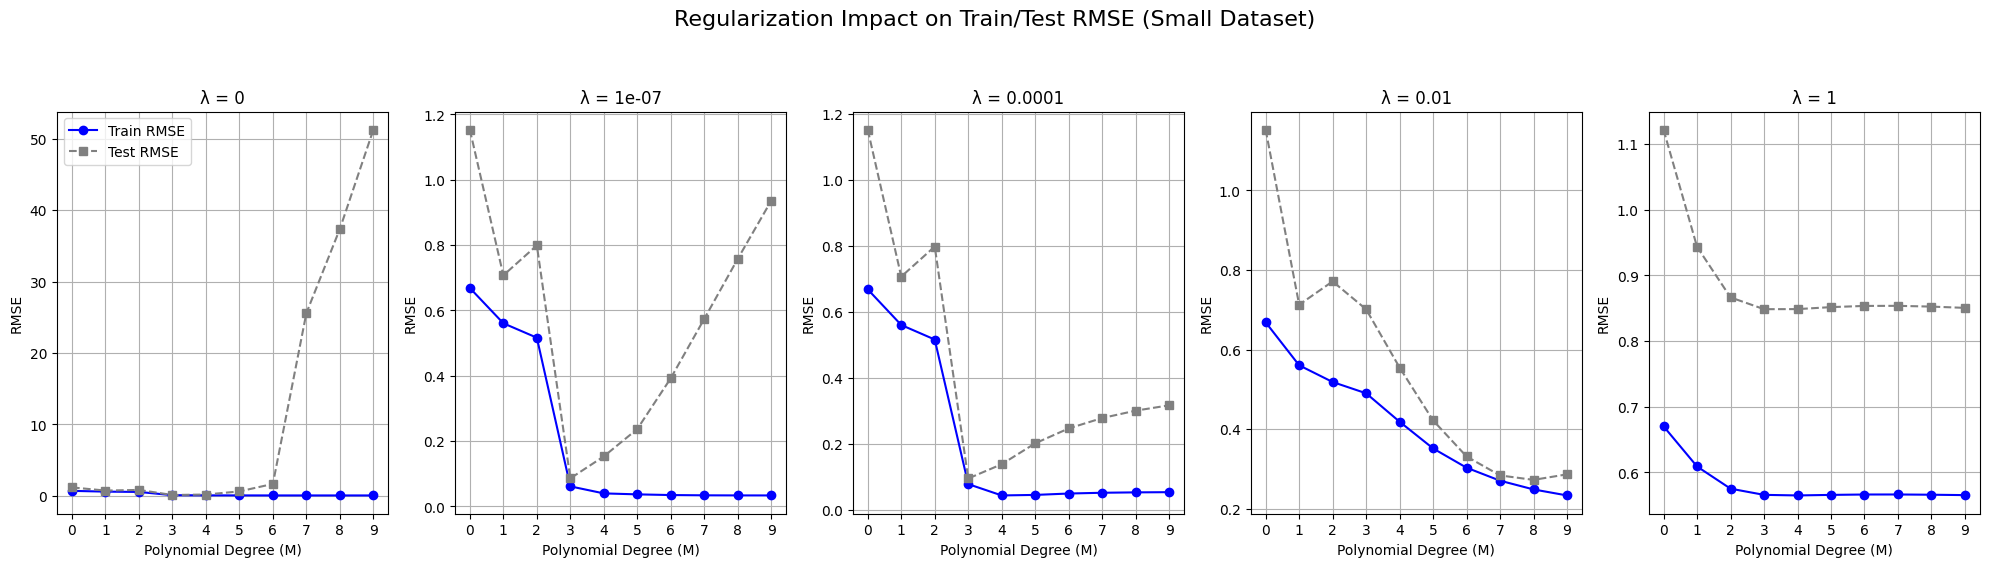

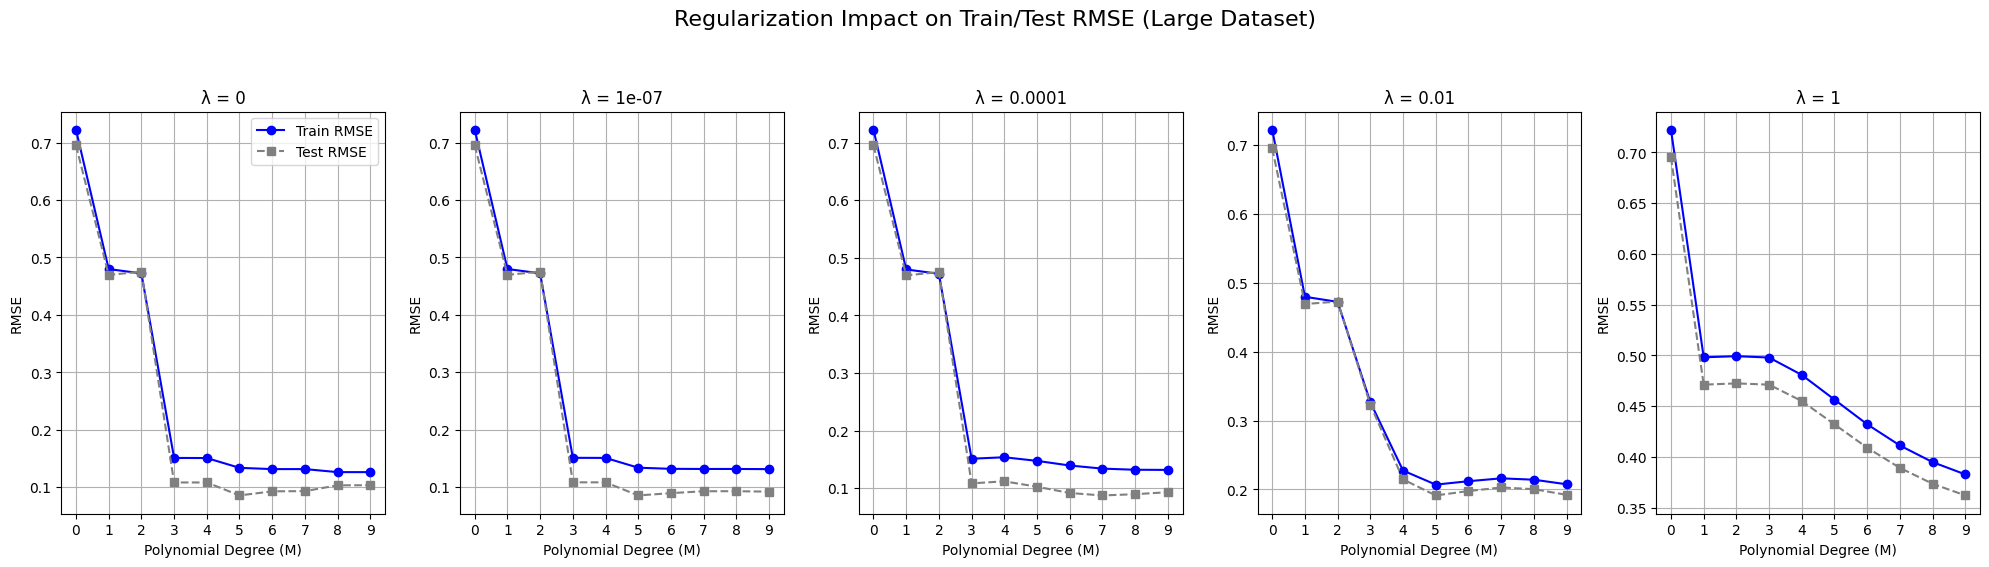

In [ ]:
analyze_regularization(X_train, X_test, Y_train, Y_test, 'Small')
analyze_regularization(X_train1, X_test1, Y_train1, Y_test1, 'Large')

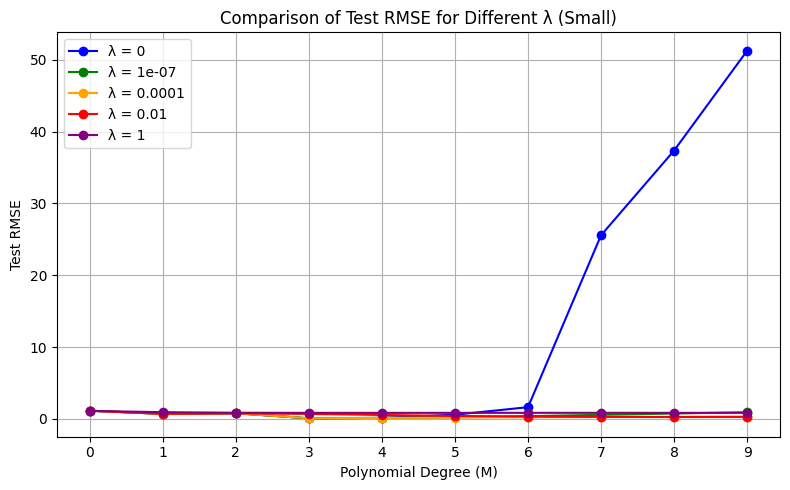

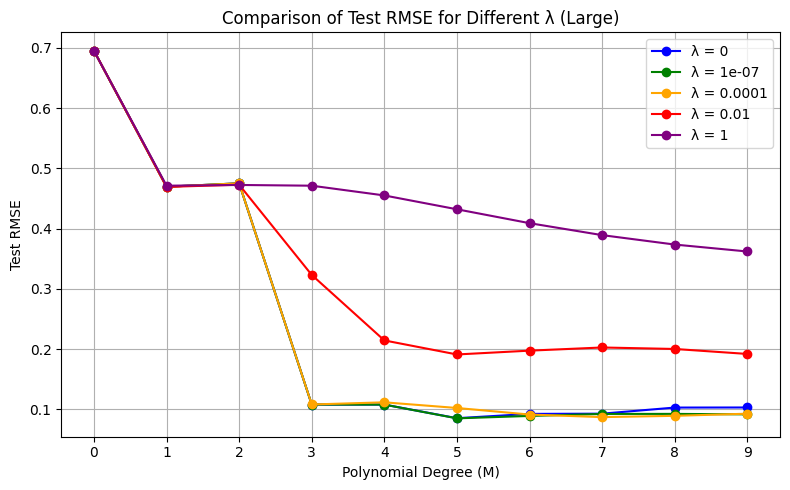

In [ ]:
def compare_regularization_effects(X_train, X_test, y_train, y_test, dataset_name, regularise_bias_ = True):
    M_range = range(10)
    lambdas = [0, 1e-7, 1e-4, 0.01, 1]
    colors = ['blue', 'green', 'orange', 'red', 'purple']

    plt.figure(figsize=(8, 5))

    for i, lamda in enumerate(lambdas):
        TeError_reg = []

        for M in M_range:
            if not regularise_bias_:
                w_opt_reg = PolynomialFit(X_train, y_train, M, lamda, False)
            else:
                w_opt_reg = PolynomialFit(X_train, y_train, M, lamda)
            _, rmse_test_reg = PolynomialPred_Error(w_opt_reg, X_train, X_test, y_train, y_test)
            TeError_reg.append(rmse_test_reg)

        plt.plot(M_range, TeError_reg, marker='o', linestyle='-', color=colors[i], label=f'λ = {lamda}')

    plt.xlabel('Polynomial Degree (M)')
    plt.ylabel('Test RMSE')
    plt.title(f'Comparison of Test RMSE for Different λ ({dataset_name})')
    plt.grid(True)
    plt.xticks(M_range)
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_regularization_effects(X_train, X_test, Y_train, Y_test, 'Small')
compare_regularization_effects(X_train1, X_test1, Y_train1, Y_test1, 'Large')

In [ ]:
# Plot training and testing estimates along with the original tragets for regularisation

def interactive_prediction_plot(X_train, X_test, y_train, y_test, dataset_name):
    M_range = range(10)
    lambdas = [0, 1e-7, 1e-4, 0.01, 1]

    train_sort = np.argsort(X_train)
    test_sort = np.argsort(X_test)

    def plot_for_M(M):
        plt.figure(figsize=(20, 6))

        for i, lamda in enumerate(lambdas):
            w_opt_reg_ = PolynomialFit(X_train, y_train, M, lamda)
            y_train_pred_, y_test_pred_ = PolynomialPred(w_opt_reg_, X_train, X_test)

            plt.subplot(1, len(lambdas), i + 1)

            plt.plot(X_train, y_train, 'bo', label='Train True', markersize=3)
            plt.plot(X_train[train_sort], y_train_pred_[train_sort], 'c-', label='Train Pred', linewidth=1.5)

            plt.plot(X_test, y_test, 'ro', label='Test True', markersize=3)
            plt.plot(X_test[test_sort], y_test_pred_[test_sort], 'orange', label='Test Pred', linewidth=1.5)

            plt.title(f'λ = {lamda}', fontsize=10)
            plt.ylim(-1.5, 1.5)
            plt.grid(True)
            if i == 0:
                plt.ylabel('Output')
                plt.legend(fontsize='small')
            plt.xlabel('X')

        plt.suptitle(f'Train & Test Predictions for Polynomial Degree M = {M} ({dataset_name})', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.93])
        plt.show()

    interact(plot_for_M, M=IntSlider(value=0, min=0, max=9, step=1, description='Model Order M'))

interactive_prediction_plot(X_train, X_test, Y_train, Y_test, 'small')
interactive_prediction_plot(X_train1, X_test1, Y_train1, Y_test1, 'large')

interactive(children=(IntSlider(value=0, description='Model Order M', max=9), Output()), _dom_classes=('widget…

interactive(children=(IntSlider(value=0, description='Model Order M', max=9), Output()), _dom_classes=('widget…

For the dataset with 10 points:
*   Without regularization (λ = 0), training error decreases with model
complexity, but test error spikes for higher degrees — showing clear overfitting.
*   With small regularization, overfitting is reduced; training error stays low, and test error remains stable.
*   Moderate regularization gives the best bias-variance trade-off, enabling higher-degree models to generalize well.
*   Strong regularization leads to underfitting, with both errors remaining high due to excessive constraint on the model.

For the dataset with 100 points:

Regularization has a smaller impact due to sufficient training data. The best performance is achieved with minimal regularization, as overfitting is naturally reduced. Here also, strong regularization leads to underfitting, with both errors remaining high due to excessive constraint on the model.

In [ ]:
# effect of bias regularisation
#Adding 5 to the original datasets will do it becasue the function 5 + sin(2*pi*x)

# Generating data
y_bias_train_small = 5 + Y_train
y_bias_train_large = 5 + Y_train1
y_bias_test_small = 5 + Y_test
y_bias_test_large = 5 + Y_test1

In [ ]:
#Smaller dataset

w_opt_without_bias_reg = PolynomialFit(X_train, y_bias_train_small,M=3,lamda=10, regularize_bias=True)
w_opt_with_bias_reg = PolynomialFit(X_train,y_bias_train_small,3, 10, False)
print(w_opt_without_bias_reg)
print(w_opt_with_bias_reg)

[2.63138459 0.60057695 0.25053816 0.15994271]
[ 5.55351071 -0.08324995 -0.09383924 -0.08196237]


In [ ]:
#Larger dataset

w_opt_without_bias = PolynomialFit(X_train1, y_bias_train_large,5, 10, True)
w_opt_with_bias = PolynomialFit(X_train1,y_bias_train_large,5, 10, False)
print(w_opt_without_bias)
print(w_opt_with_bias)

[ 3.70977596e+00  8.77812385e-01  1.91273873e-01 -2.86843230e-03
 -5.14656729e-02 -5.43734985e-02]
[ 5.38000113 -0.34113544 -0.30879559 -0.21306768 -0.12494227 -0.05664124]


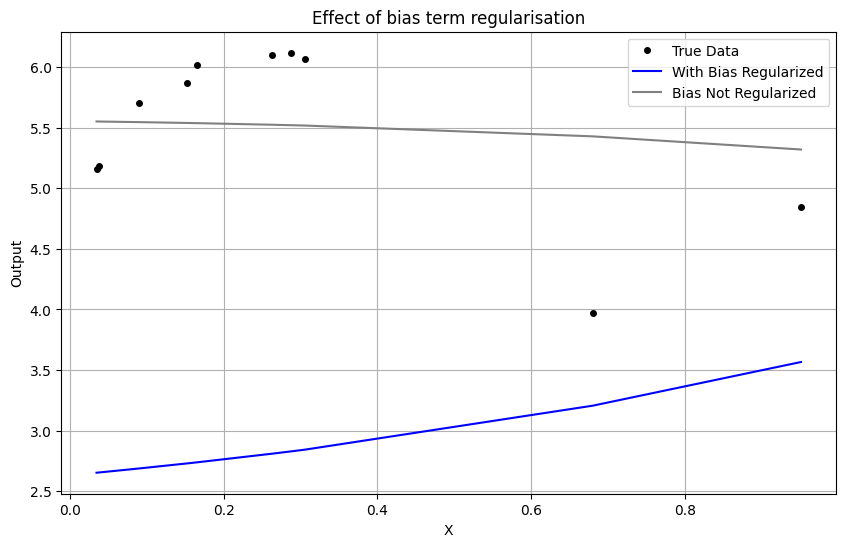

In [ ]:
y_pred_no_bias_train, _ = PolynomialPred(w_opt_without_bias_reg, X_train, X_test)
y_pred_with_bias_train, _ = PolynomialPred(w_opt_with_bias_reg, X_train, X_test)

sort_idx = np.argsort(X_train)

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_bias_train_small, 'ko', label='True Data', markersize=4)
plt.plot(X_train[sort_idx], y_pred_no_bias_train[sort_idx], 'blue', label='With Bias Regularized')
plt.plot(X_train[sort_idx], y_pred_with_bias_train[sort_idx], 'grey', label='Bias Not Regularized')
plt.title('Effect of bias term regularisation')
plt.xlabel('X')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

At moderate or high regularisation, bias term differences become significant and Non-bias terms shrink noticeably in both models.

Without bias regularisation, the bias coefficient w0 tends to 5(true function mean). and that with bias regularisation shrunks to 0.  

Bias regularization significantly impacts model behavior. It shrinks intercept towards 0 for non centered data. It should generally be avoided unless all features/targets are standardized.



**OBSERVATIONS**

1. Low-order polynomial models tend to underfit the data, failing to capture underlying patterns, while high-order models often overfit especially with limited data by fitting noise and losing generalization. The best performance is typically observed at intermediate model orders (around M = 3 to 5 or 6), where the model balances complexity and generalization.

2. Overfitting can be reduced either by increasing training data or regularisation.For smaller datasets, regularization plays a crucial role in controlling overfitting; moderate regularization leads to better test performance. In contrast, larger datasets naturally reduce overfitting, so minimal or no regularization works best, and strong regularization causes underfitting.

3. Regularizing the bias term shrinks the intercept toward zero, which can distort predictions when the data is not centered. Therefore, bias regularization should generally be avoided unless both inputs and targets are standardized.

Q.3 Understanding the choice of kernel

In [ ]:
#Generate 100 data points (function in part a)
########################################

x = np.random.uniform(0,1,100)
y = np.sin(2*np.pi*x)
gaussian_noise = np.random.normal(0,0.1,100)
y_noised = y + gaussian_noise
df = pd.DataFrame({'x':x, 'y':y_noised})\

# Obtaining train and test splits
train_df = df.iloc[::2].reset_index(drop=True)
test_df = df.iloc[1::2].reset_index(drop=True)

X_train = train_df['x']
Y_train = train_df['y']
X_test = test_df['x']
Y_test = test_df['y']

mean = np.mean(X_train)
std_dev = np.std(X_train)
X_train = (X_train - mean) / std_dev
X_test = (X_test - mean) / std_dev

In [ ]:
#Generate 100 data points (function in part b)
########################################

x1 = np.random.uniform(0, 3, 100)
y1_true = np.zeros_like(x)

mask1 = (x1 >= 0) & (x1 < 1)
mask2 = (x1 >= 1) & (x1 < 2)
mask3 = (x1 >= 2) & (x1 <= 3)

y1_true[mask1] = np.sin(2 * np.pi * x1[mask1])
y1_true[mask2] = 1 - 2 * np.abs(x1[mask2] - 1.5)
y1_true[mask3] = np.exp(-((x1[mask3] - 2.5) ** 2) / (2 * 0.1 ** 2))

y1 = y1_true + np.random.normal(0, 0.1, 100)

df1 = pd.DataFrame({'x1':x1, 'y1':y1})
train_df1 = df1.iloc[::2].reset_index(drop=True)
test_df1 = df1.iloc[1::2].reset_index(drop=True)
X_train1 = train_df1['x1']
Y_train1 = train_df1['y1']
X_test1 = test_df1['x1']
Y_test1 = test_df1['y1']

mean1 = np.mean(X_train1)
std_dev1 = np.std(X_train1)
X_train1 = (X_train1 - mean1) / std_dev1
X_test1 = (X_test1 - mean1) / std_dev1

In [ ]:
def polynomial_features(X,M):
  features = np.zeros((len(X),M+1))
  for i in range(M+1):
    features[:,i] = X**i
  return features

def gaussian_features(X,M):
  if M==0:
    return np.ones((len(X),1))
  centers = np.linspace(np.min(X),np.max(X),M)
  sigma = (np.max(X)-np.min(X))/M * 1
  features = np.zeros((len(X),M))
  for j in range(M):
    mu_j = centers[j]
    features[:,j] = np.exp(-(X-mu_j)**2/(2 * sigma**2))
  features = np.hstack([np.ones((len(X),1)),features])
  return features

def sigmoidal_features(X,M):
  if(M ==0):
    return np.ones((len(X),1))
  centers = np.linspace(np.min(X),np.max(X),M)
  a = M / (np.max(X)-np.min(X))
  features = np.zeros((len(X),M))
  for j in range(M):
    a_j = centers[j]
    features[:,j] = 1/(1+np.exp(-a*(X-a_j)))
  features = np.hstack([np.ones((len(X),1)),features])
  return features

def KernelRegressionFit(X_train,Y_train,kernel,M,lamda = 0 ):
  if kernel == 'polynomial':
    X = polynomial_features(X_train,M)
  elif kernel =='gaussian':
    X = gaussian_features(X_train,M)
  elif kernel == 'sigmoidal':
    X = sigmoidal_features(X_train,M)
  I = np.eye(X.shape[1])
  if lamda == 0 :
    w_opt = np.linalg.pinv(X.T @ X) @ X.T @ Y_train
  else :
    w_opt = np.linalg.pinv(X.T @ X + lamda*I) @ X.T @ Y_train
  return w_opt

def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    M = len(w_est) - 1
    if kernelType == 'polynomial':
        X_tr = polynomial_features(X_train, M)
        X_te = polynomial_features(X_test, M)
    elif kernelType == 'gaussian':
        X_tr = gaussian_features(X_train, M)
        X_te = gaussian_features(X_test, M)
    elif kernelType == 'sigmoidal':
        X_tr = sigmoidal_features(X_train, M)
        X_te = sigmoidal_features(X_test, M)

    Y_tr_pred = X_tr @ w_est
    Y_te_pred = X_te @ w_est
    train_error = np.sqrt(np.mean((Y_tr_pred - Y_train)**2))
    test_error = np.sqrt(np.mean((Y_te_pred - Y_test)**2))
    return train_error, test_error

def KernelRegressionPred(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    M = len(w_est) - 1
    if kernelType == 'polynomial':
        X_tr = polynomial_features(X_train, M)
        X_te = polynomial_features(X_test, M)
    elif kernelType == 'gaussian':
        X_tr = gaussian_features(X_train, M)
        X_te = gaussian_features(X_test, M)
    elif kernelType == 'sigmoidal':
        X_tr = sigmoidal_features(X_train, M)
        X_te = sigmoidal_features(X_test, M)

    Y_tr_pred = X_tr @ w_est
    Y_te_pred = X_te @ w_est
    return Y_tr_pred , Y_te_pred

In [ ]:
# Plotting graphs for part a

M_range=list(range(1,10))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

polynomial_tr_pred= []
polynomial_te_pred = []
gaussian_tr_pred = []
gaussian_te_pred = []
sigmoid_tr_pred = []
sigmoid_te_pred = []

for m in  M_range:
  w_polynomial = KernelRegressionFit(X_train,Y_train,'polynomial',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_polynomial, X_train, Y_train, X_test, Y_test,'polynomial')
  tr_err, te_err = KernelRegressionPred_Error(w_polynomial,X_train,Y_train,X_test,Y_test,'polynomial')
  polynomial_tr_error.append(tr_err)
  polynomial_te_error.append(te_err)
  polynomial_tr_pred.append(Y_train_pred)
  polynomial_te_pred.append(Y_test_pred)

  w_gaussian = KernelRegressionFit(X_train,Y_train,'gaussian',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_gaussian, X_train, Y_train, X_test, Y_test,'gaussian')
  tr_err, te_err = KernelRegressionPred_Error(w_gaussian,X_train,Y_train,X_test,Y_test,'gaussian')
  gaussian_tr_error.append(tr_err)
  gaussian_te_error.append(te_err)
  gaussian_tr_pred.append(Y_train_pred)
  gaussian_te_pred.append(Y_test_pred)

  w_sigmoidal= KernelRegressionFit(X_train,Y_train,'sigmoidal',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_sigmoidal, X_train, Y_train, X_test, Y_test,'sigmoidal')
  tr_err, te_err = KernelRegressionPred_Error(w_sigmoidal,X_train,Y_train,X_test,Y_test,'sigmoidal')
  sigmoid_tr_error.append(tr_err)
  sigmoid_te_error.append(te_err)
  sigmoid_tr_pred.append(Y_train_pred)
  sigmoid_te_pred.append(Y_test_pred)

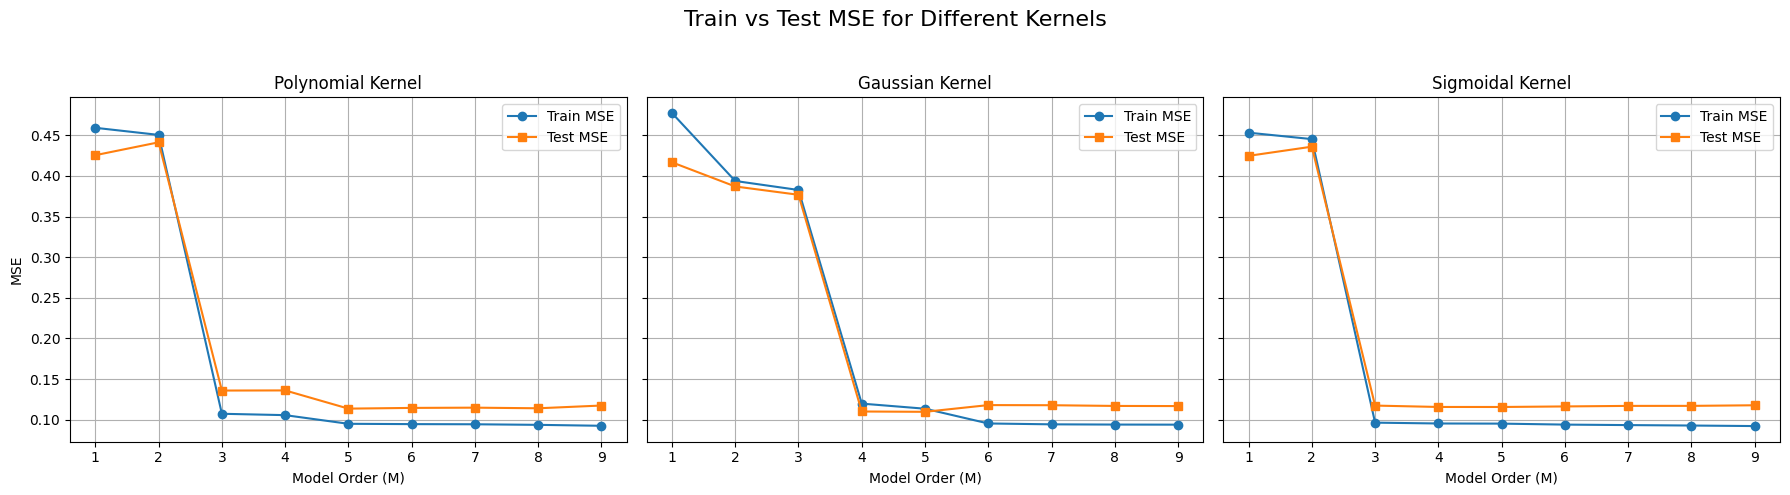

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# --- Plot 1: Polynomial Kernel Errors ---
axs[0].plot(M_range, polynomial_tr_error, 'o-', label='Train MSE')
axs[0].plot(M_range, polynomial_te_error, 's-', label='Test MSE')
axs[0].set_title('Polynomial Kernel')
axs[0].set_xlabel('Model Order (M)')
axs[0].set_ylabel('MSE')
axs[0].grid(True)
axs[0].legend()

# --- Plot 2: Gaussian Kernel Errors ---
axs[1].plot(M_range, gaussian_tr_error, 'o-', label='Train MSE')
axs[1].plot(M_range, gaussian_te_error, 's-', label='Test MSE')
axs[1].set_title('Gaussian Kernel')
axs[1].set_xlabel('Model Order (M)')
axs[1].grid(True)
axs[1].legend()

# --- Plot 3: Sigmoidal Kernel Errors ---
axs[2].plot(M_range, sigmoid_tr_error, 'o-', label='Train MSE')
axs[2].plot(M_range, sigmoid_te_error, 's-', label='Test MSE')
axs[2].set_title('Sigmoidal Kernel')
axs[2].set_xlabel('Model Order (M)')
axs[2].grid(True)
axs[2].legend()

plt.suptitle('Train vs Test MSE for Different Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

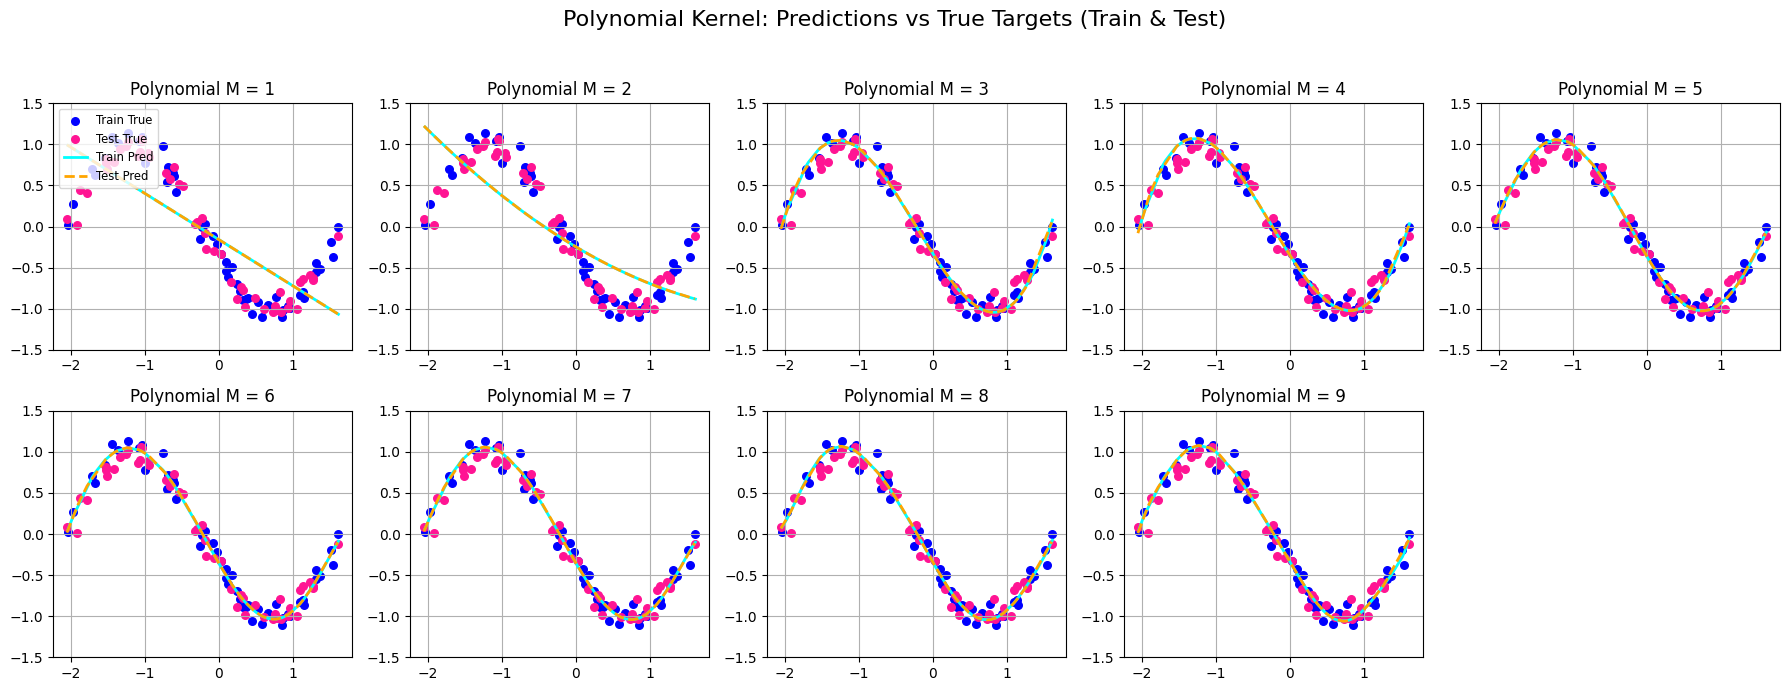

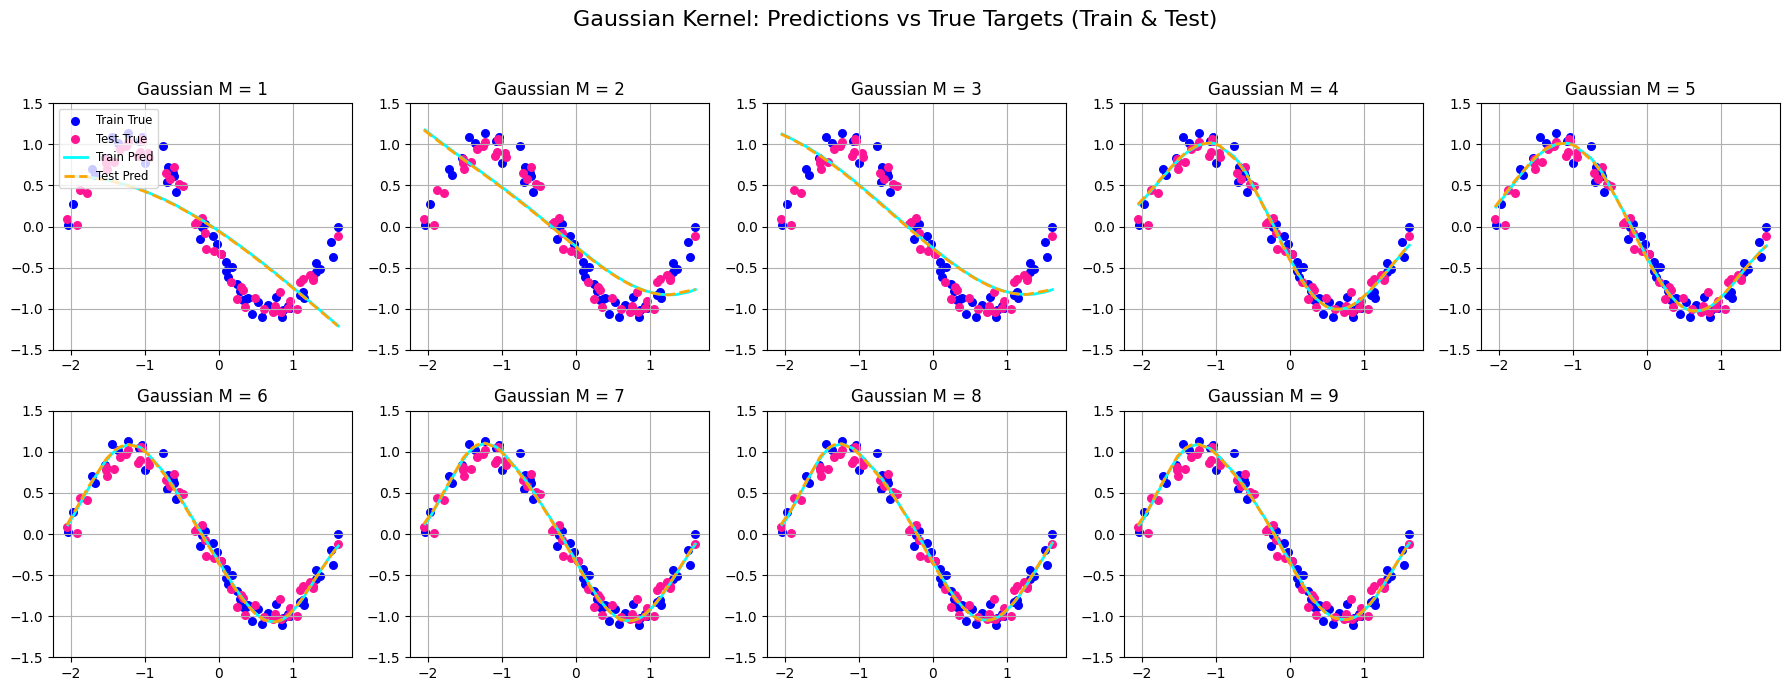

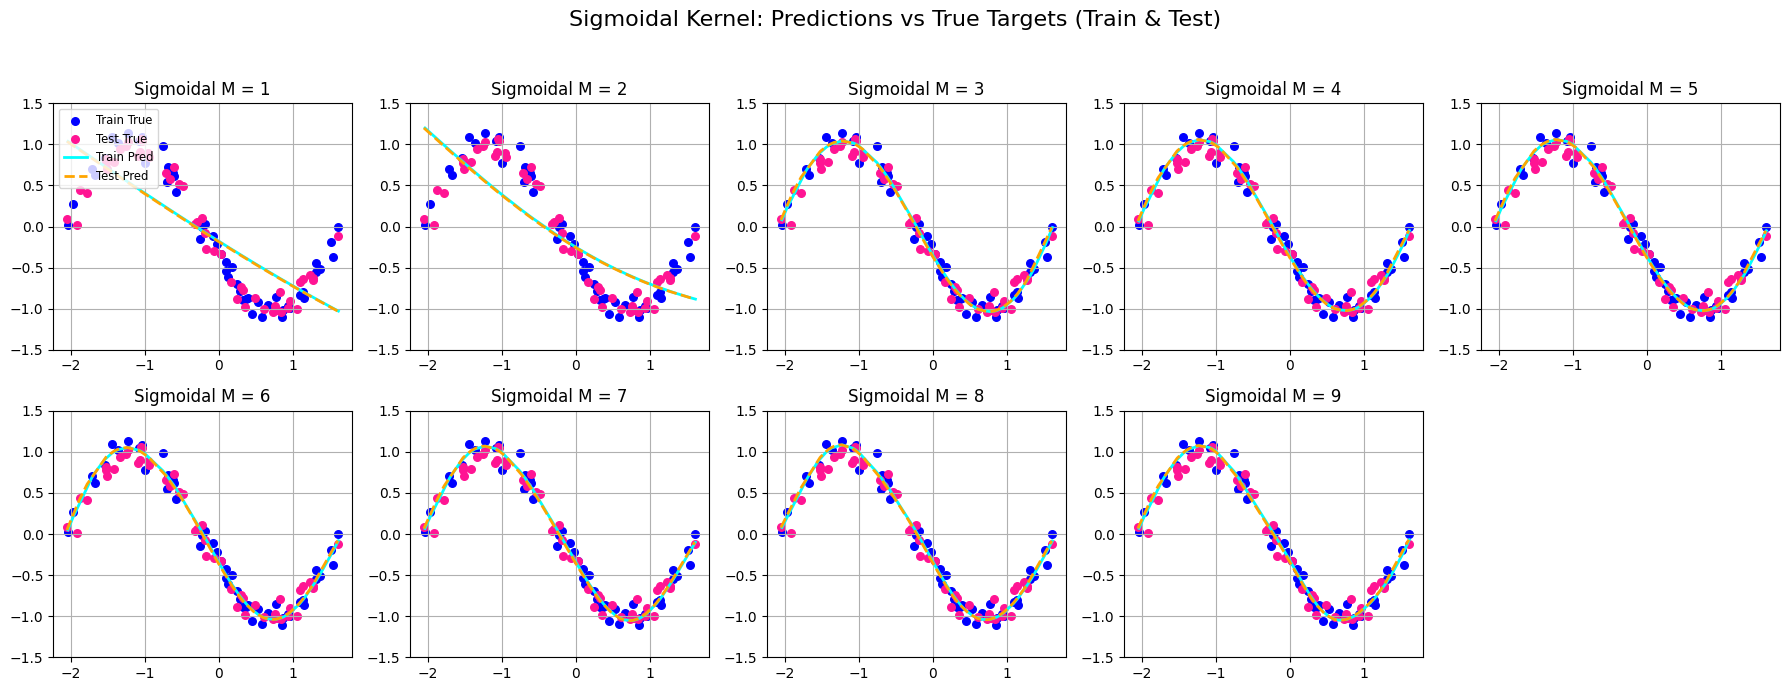

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generic function to plot results for a given kernel
def plot_kernel_predictions(M_range, TrPred_list, TePred_list, X_train, Y_train, X_test, Y_test, kernel_name, color_train='cyan', color_test='orange'):
    num_rows = 2
    num_cols = 5

    plt.figure(figsize=(18, 7))
    for i, M in enumerate(M_range):
        plt.subplot(num_rows, num_cols, i + 1)

        train_sort = np.argsort(X_train)
        test_sort = np.argsort(X_test)

        # Actual values
        plt.scatter(X_train, Y_train, color='blue', label='Train True', s=30)
        plt.scatter(X_test, Y_test, color='deeppink', label='Test True', s=30)

        # Predicted values
        plt.plot(X_train[train_sort], TrPred_list[i][train_sort], color=color_train, label='Train Pred', linewidth=2)
        plt.plot(X_test[test_sort], TePred_list[i][test_sort], color=color_test, linestyle='--', label='Test Pred', linewidth=2)

        plt.title(f'{kernel_name} M = {M}')
        plt.ylim(-1.5, 1.5)
        plt.grid(True)

        if i == 0:
            plt.legend(loc='upper left', fontsize='small')

    plt.suptitle(f'{kernel_name} Kernel: Predictions vs True Targets (Train & Test)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_kernel_predictions(M_range, polynomial_tr_pred, polynomial_te_pred, X_train, Y_train, X_test, Y_test, kernel_name='Polynomial')
plot_kernel_predictions(M_range, gaussian_tr_pred, gaussian_te_pred, X_train, Y_train, X_test, Y_test, kernel_name='Gaussian')
plot_kernel_predictions(M_range, sigmoid_tr_pred, sigmoid_te_pred, X_train, Y_train, X_test, Y_test, kernel_name='Sigmoidal')

1. Polynomial kernel gives high training and test errors for lower order models. As model order is increased, training and test errors decrease significantly. But, it may overfit if model order is increased beyond a certain limit. If optimal model order is chosen, this kernel performs fairly well.

2. Gaussian kernel gives high training and test errors for lower order models. Choosing optimal sigma (bandwidth) is very crucial in gaussian kernel as it significantly affects model performance.

3. Sigmoid kernel performs very similar to Gaussian kernel. Here also, chosing the coefficient 'a' is crucial for model performance. After a certain M , the training and test error plateuas, and not change much even on increasing model complexity.

In [ ]:
# Repeating the experiments for part b

M_range=list(range(1,10))

polynomial_tr_error1 = []
polynomial_te_error1 = []
gaussian_tr_error1 = []
gaussian_te_error1 = []
sigmoid_tr_error1 = []
sigmoid_te_error1 = []

polynomial_tr_pred1= []
polynomial_te_pred1 = []
gaussian_tr_pred1 = []
gaussian_te_pred1 = []
sigmoid_tr_pred1 = []
sigmoid_te_pred1 = []

for m in  M_range:
  w_polynomial = KernelRegressionFit(X_train1,Y_train1,'polynomial',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_polynomial, X_train1, Y_train1, X_test1, Y_test1,'polynomial')
  tr_err, te_err = KernelRegressionPred_Error(w_polynomial,X_train1,Y_train1,X_test1,Y_test1,'polynomial')
  polynomial_tr_error1.append(tr_err)
  polynomial_te_error1.append(te_err)
  polynomial_tr_pred1.append(Y_train_pred)
  polynomial_te_pred1.append(Y_test_pred)

  w_gaussian = KernelRegressionFit(X_train1,Y_train1,'gaussian',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_gaussian, X_train1, Y_train1, X_test1, Y_test1,'gaussian')
  tr_err, te_err = KernelRegressionPred_Error(w_gaussian,X_train1,Y_train1,X_test1,Y_test1,'gaussian')
  gaussian_tr_error1.append(tr_err)
  gaussian_te_error1.append(te_err)
  gaussian_tr_pred1.append(Y_train_pred)
  gaussian_te_pred1.append(Y_test_pred)

  w_sigmoidal= KernelRegressionFit(X_train1,Y_train1,'sigmoidal',m,0)
  Y_train_pred , Y_test_pred = KernelRegressionPred(w_sigmoidal, X_train1, Y_train1, X_test1, Y_test1,'sigmoidal')
  tr_err, te_err = KernelRegressionPred_Error(w_sigmoidal,X_train1,Y_train1,X_test1,Y_test1,'sigmoidal')
  sigmoid_tr_error1.append(tr_err)
  sigmoid_te_error1.append(te_err)
  sigmoid_tr_pred1.append(Y_train_pred)
  sigmoid_te_pred1.append(Y_test_pred)

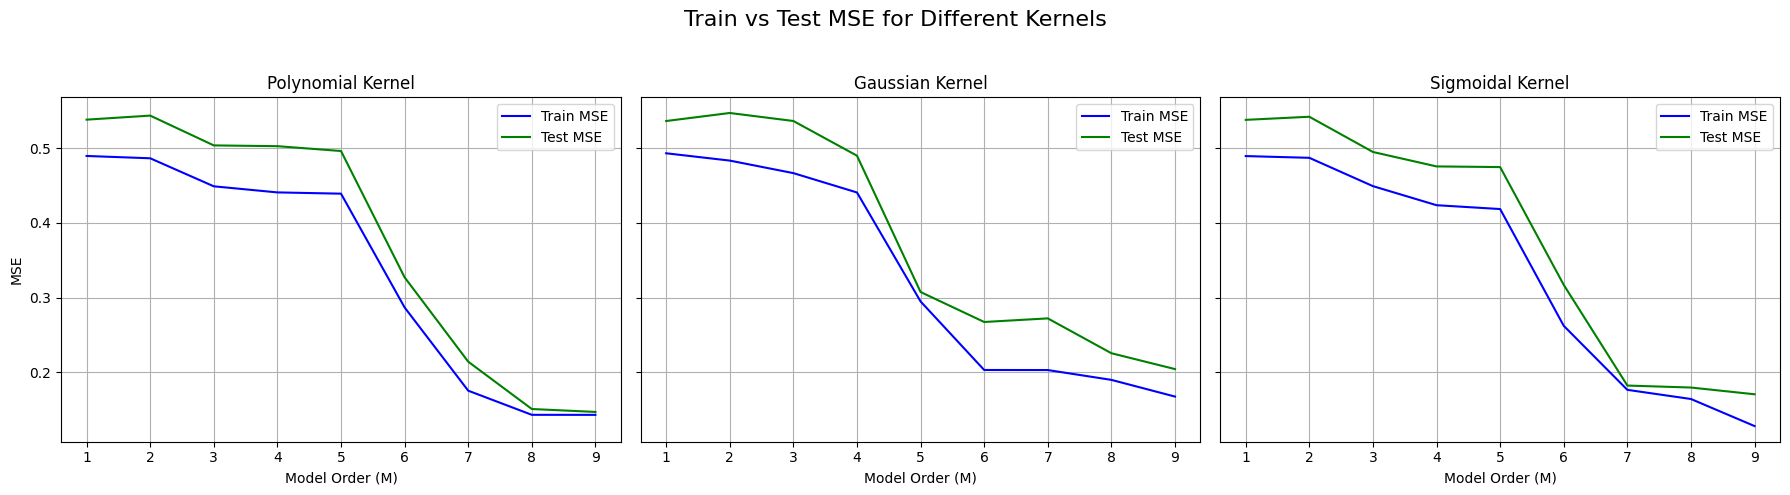

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# --- Plot 1: Polynomial Kernel Errors ---
axs[0].plot(M_range, polynomial_tr_error1, 'b-', label='Train MSE')
axs[0].plot(M_range, polynomial_te_error1, 'g-', label='Test MSE')
axs[0].set_title('Polynomial Kernel')
axs[0].set_xlabel('Model Order (M)')
axs[0].set_ylabel('MSE')
axs[0].grid(True)
axs[0].legend()

# --- Plot 2: Gaussian Kernel Errors ---
axs[1].plot(M_range, gaussian_tr_error1, 'b-', label='Train MSE')
axs[1].plot(M_range, gaussian_te_error1, 'g-', label='Test MSE')
axs[1].set_title('Gaussian Kernel')
axs[1].set_xlabel('Model Order (M)')
axs[1].grid(True)
axs[1].legend()

# --- Plot 3: Sigmoidal Kernel Errors ---
axs[2].plot(M_range, sigmoid_tr_error1, 'b-', label='Train MSE')
axs[2].plot(M_range, sigmoid_te_error1, 'g-', label='Test MSE')
axs[2].set_title('Sigmoidal Kernel')
axs[2].set_xlabel('Model Order (M)')
axs[2].grid(True)
axs[2].legend()

plt.suptitle('Train vs Test MSE for Different Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

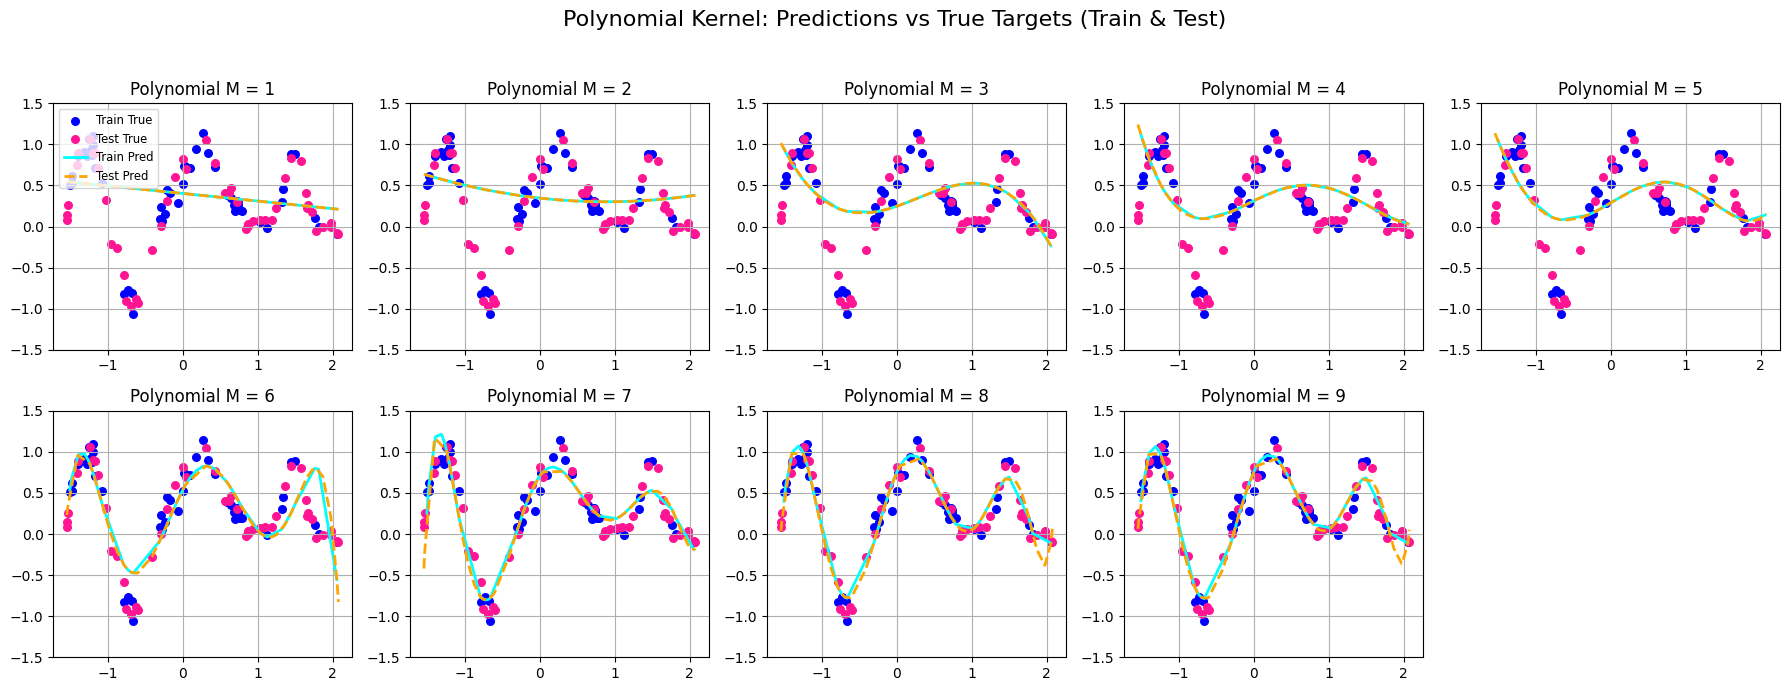

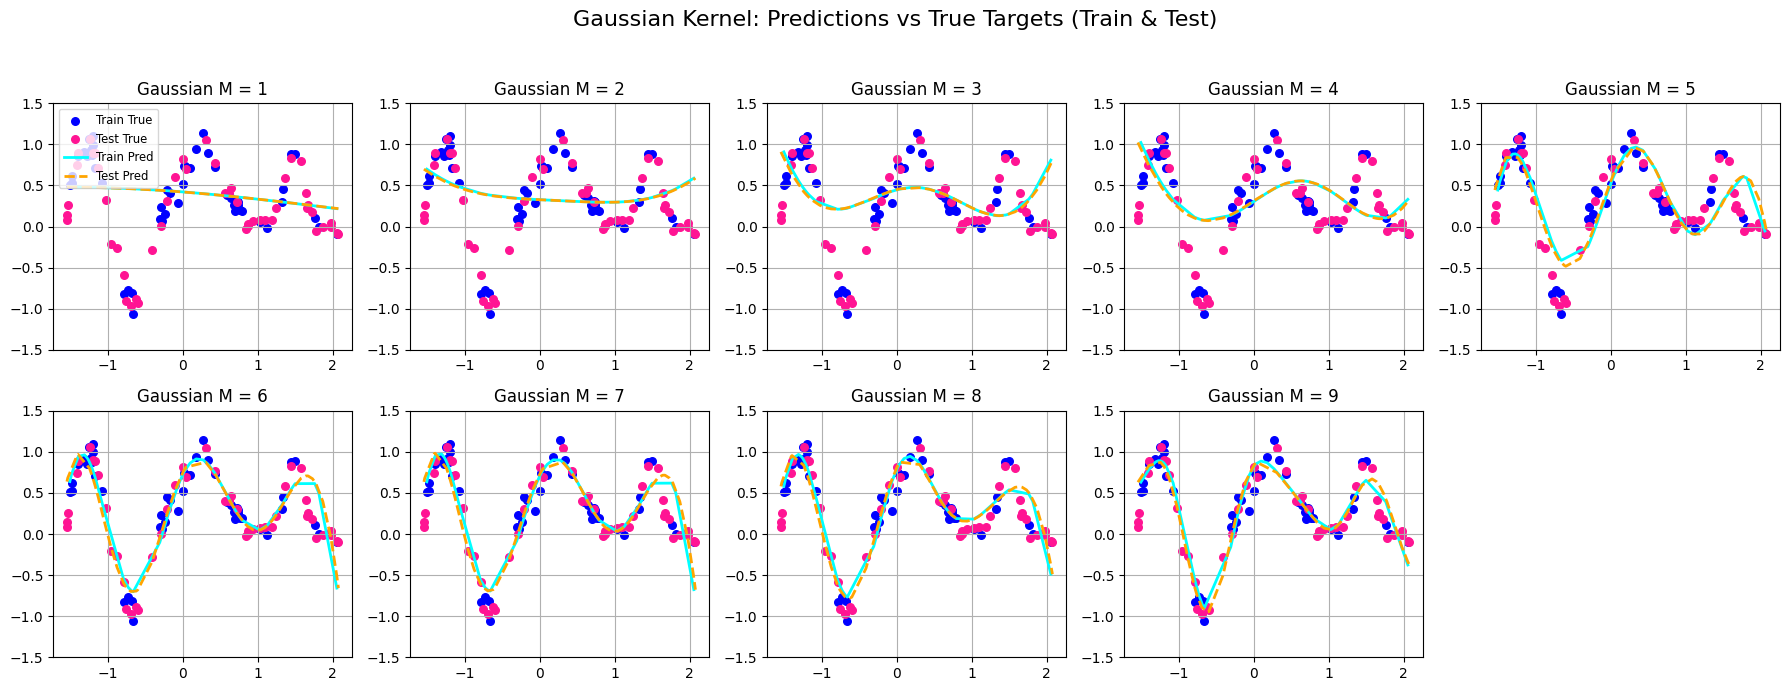

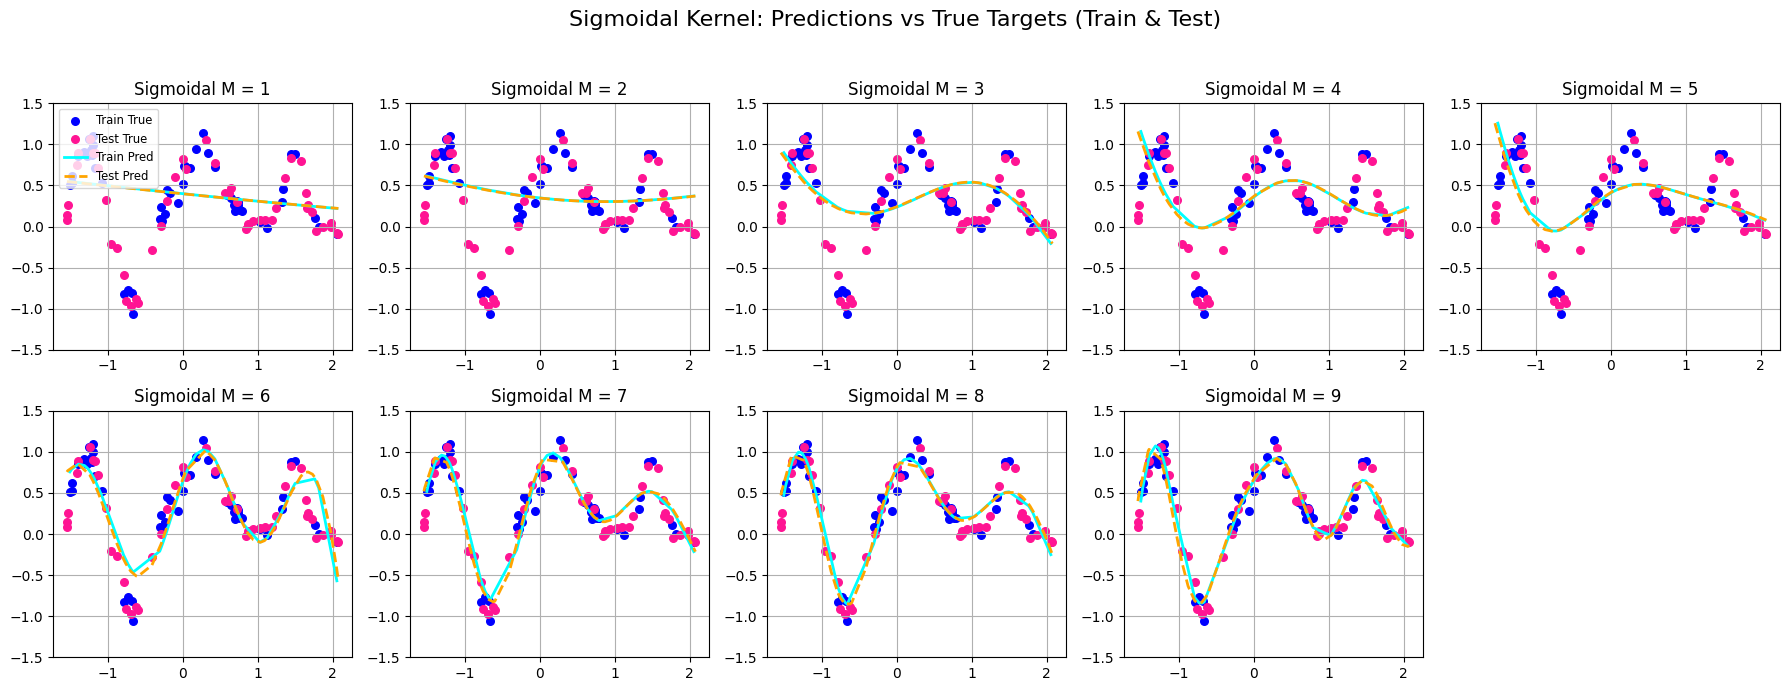

In [ ]:
plot_kernel_predictions(M_range, polynomial_tr_pred1, polynomial_te_pred1, X_train1, Y_train1, X_test1, Y_test1, kernel_name='Polynomial')
plot_kernel_predictions(M_range, gaussian_tr_pred1, gaussian_te_pred1, X_train1, Y_train1, X_test1, Y_test1, kernel_name='Gaussian')
plot_kernel_predictions(M_range, sigmoid_tr_pred1, sigmoid_te_pred1, X_train1, Y_train1, X_test1, Y_test1, kernel_name='Sigmoidal')

Overall a higher model complexity is required to model the function in part b than in part a

**Observations**  
1. **Polynomial Kernel** :Requires higher complexity (M ≥ 6) for stable fitting; lower M values cause overshooting and oscillations. Train-test gap reduces around M = 7-8, indicating delayed convergence.

2. **Sigmoidal Kernel** : Similar to polynomial, it needs M ≥ 6 to avoid erratic predictions. Its sensitivity to parameter tuning (like a) makes it less robust at lower complexities without fine adjustments.

3. **Gaussian Kernel**  : Delivers strong performance even at lower complexities (M = 4-5), achieving smooth fits with smaller M and better train-test alignment-demonstrating superior efficiency and stability.




Q.4 Understanding training parameters

In [ ]:
#In Q.4 , we have to repeat the experiments in 3a and 3b . So, we will use the same dataset as in Q.3

In [ ]:
# Generating data
x = np.random.uniform(0,1,100)
y = np.sin(2*np.pi*x)
gaussian_noise = np.random.normal(0,0.1,100)
y_noised = y + gaussian_noise
df = pd.DataFrame({'x':x, 'y':y_noised})
print(df)

#Obtain train and test splits
train_df = df.iloc[::2].reset_index(drop=True)
test_df = df.iloc[1::2].reset_index(drop=True)
print(train_df)
print(test_df)

X_train = train_df['x']
Y_train = train_df['y']
X_test = test_df['x']
Y_test = test_df['y']

#Feature Scaling
mean = np.mean(X_train)
std = np.std(X_train)
if std == 0:
  std = 1e-8
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

           x         y
0   0.269024  0.864749
1   0.519116 -0.204686
2   0.158212  0.866263
3   0.978863 -0.118189
4   0.771847 -0.861690
..       ...       ...
95  0.591582 -0.488165
96  0.435520  0.397807
97  0.511542  0.066815
98  0.845284 -0.911059
99  0.443376  0.157726

[100 rows x 2 columns]
           x         y
0   0.269024  0.864749
1   0.158212  0.866263
2   0.771847 -0.861690
3   0.461645  0.100112
4   0.204282  0.954993
5   0.906856 -0.733262
6   0.612866 -0.653538
7   0.619404 -0.618302
8   0.787423 -0.944368
9   0.505183 -0.228631
10  0.933051 -0.418333
11  0.432967  0.299772
12  0.388494  0.608349
13  0.469592  0.295237
14  0.543596 -0.243993
15  0.103782  0.660108
16  0.822133 -0.858893
17  0.904834 -0.520796
18  0.018394  0.134558
19  0.744418 -1.004161
20  0.927525 -0.350838
21  0.989865 -0.122962
22  0.871442 -0.876934
23  0.486125  0.319997
24  0.049689  0.387398
25  0.638181 -0.841816
26  0.880369 -0.646757
27  0.587497 -0.537310
28  0.464431  0.283700
29  0.4527

In [ ]:
def apply_kernel(X,kernelType, M, centers = None):
    if kernelType=='polynomial':
      features = np.zeros((len(X),M+1))
      for i in range(M+1):
        features[:,i] = X**i
      return features


    if centers is None:
       centers = np.linspace(np.min(X),np.max(X),M)

    if kernelType=='gaussian':
      if M==0:
        return np.ones((len(X),1))
      sigma = 1/M * 2.0
      features = np.zeros((len(X),M))
      for j in range(M):
        mu_j = centers[j]
        features[:,j] = np.exp(-(X-mu_j)**2/(2 * sigma**2))
      features = np.hstack([np.ones((len(X),1)),features])
      return features

    if kernelType == 'sigmoidal':
      if(M ==0):
        return np.ones((len(X),1))
      features = np.zeros((len(X),M))
      a = 5
      for j in range(M):
        a_j = centers[j]
        features[:,j] = 1/(1+np.exp(-a*(X-a_j)))
      features = np.hstack([np.ones((len(X),1)),features])
      return features


def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType):
  M = len(w_est) - 1

  X_tr = apply_kernel(X_train, kernelType, M)
  X_te = apply_kernel(X_test, kernelType, M)

  Y_tr_pred = X_tr @ w_est
  Y_te_pred = X_te @ w_est

  RMSE_tr = np.sqrt(np.mean((Y_tr_pred - Y_train)**2))
  RMSE_te = np.sqrt(np.mean((Y_te_pred - Y_test)**2))

  return RMSE_tr, RMSE_te

def closed_form_solution(X_train, Y_train, kernelType, M, lamda = 0):
  X = apply_kernel(X_train, kernelType, M)
  I = np.eye(X.shape[1])
  if lamda == 0:
    w_opt = np.linalg.pinv(X.T @ X) @ X.T @ Y_train
  else:
    w_opt = np.linalg.pinv(X.T @ X + lamda*I) @ X.T @ Y_train
  return w_opt

def Pred(w_est,X_train,Y_train,Xtest,Y_test,kernelType):
  M = len(w_est) - 1
  X_tr = apply_kernel(X_train, kernelType, M)
  X_te = apply_kernel(X_test, kernelType, M)
  Y_tr_pred = X_tr @ w_est
  Y_te_pred = X_te @ w_est
  return Y_tr_pred, Y_te_pred

In [ ]:
def training(X_train, Y_train, X_test, Y_test, kernelType, M, epochs, stepSize, BatchSize=1,print_epochs = True,plot_= True,return_err = False):
    total_training_data = len(X_train)
    n_features = M + 1
    weights = np.zeros(n_features)
    best_weights = weights.copy()

    centers = np.linspace(np.min(X_train), np.max(X_train), M)

    train_error = []
    test_error = []
    best_test_error = float('inf')
    best_epoch = 0

    batches_per_epoch = int(np.ceil(total_training_data / BatchSize))

    for epoch in range(epochs):
        tr_err, te_err = KernelRegressionPred_Error(weights, X_train, Y_train, X_test, Y_test, kernelType)
        train_error.append(tr_err)
        test_error.append(te_err)

        if te_err < best_test_error:
            best_test_error = te_err
            best_weights = weights.copy()
            best_epoch = epoch

        indices = np.random.permutation(total_training_data)
        X_shuffled = X_train.to_numpy()[indices]
        Y_shuffled = Y_train.to_numpy()[indices]

        for i in range(batches_per_epoch):
            start = i * BatchSize
            end = min(start + BatchSize, total_training_data)

            X_batch = X_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]

            gradient = np.zeros(n_features)

            for j in range(len(X_batch)):
                x = X_batch[j]
                y_true = Y_batch[j]

                X_tr = apply_kernel(np.array([x]), kernelType, M, centers)[0]

                X_pred = np.dot(weights, X_tr)
                error = X_pred - y_true
                gradient += error * X_tr

            gradient_avg = gradient / len(X_batch)
            weights -= stepSize * gradient_avg

        if print_epochs and (epoch % max(1, epochs // 10) == 0):
            grad_norm = np.linalg.norm(gradient_avg)
            print(f"Epoch {epoch}/{epochs}: "
                  f"Train MSE={tr_err:.4f}, Test MSE={te_err:.4f}, "
                  f"|∇|={grad_norm:.6f}")

    # Evaluate final errors
    tr_err, te_err = KernelRegressionPred_Error(weights, X_train, Y_train, X_test, Y_test, kernelType)
    train_error.append(tr_err)
    test_error.append(te_err)

    if plot_:
      # Plot MSE over epochs
      plt.figure(figsize=(12, 6))
      epochs_range = np.arange(len(train_error))

      plt.semilogy(epochs_range, train_error, 'b-', label='Training MSE', alpha=0.7)
      plt.semilogy(epochs_range, test_error, 'r-', label='Testing MSE', alpha=0.7)

      # Mark minimum test error
      min_idx = np.argmin(test_error)
      min_value = test_error[min_idx]
      plt.scatter(min_idx, min_value, s=100, c='red', zorder=5,
                label=f'Min Test Error: {min_value:.4f}')

      # Closed-form solution
      w_closed = closed_form_solution(X_train, Y_train, kernelType, M)
      _, cf_test_err = KernelRegressionPred_Error(w_closed, X_train, Y_train, X_test, Y_test, kernelType)

      plt.axhline(y=cf_test_err, color='g', linestyle='--',
                label=f'Closed-Form MSE: {cf_test_err:.4f}')

      plt.title(f'{kernelType.capitalize()} Kernel (M={M}, η={stepSize}, Batch={BatchSize})\n'
              f'Best: {best_test_error:.4f} | Final: {te_err:.4f} | Closed: {cf_test_err:.4f}')
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error (log scale)')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()

      # Weight comparison
      print("\nWeight Comparison:")
      print(f"{'':<15} {'SGD Weights':<25} {'Closed-Form Weights':<25} {'Difference':<15}")
      for i, (w_sgd, w_cf) in enumerate(zip(best_weights, w_closed)):
          diff = abs(w_sgd - w_cf)
          print(f"w{i}: {w_sgd:12.6f} | {w_cf:12.6f} | {diff:12.6f}")

    if return_err:
      return best_weights, train_error, test_error
    else:
      return best_weights

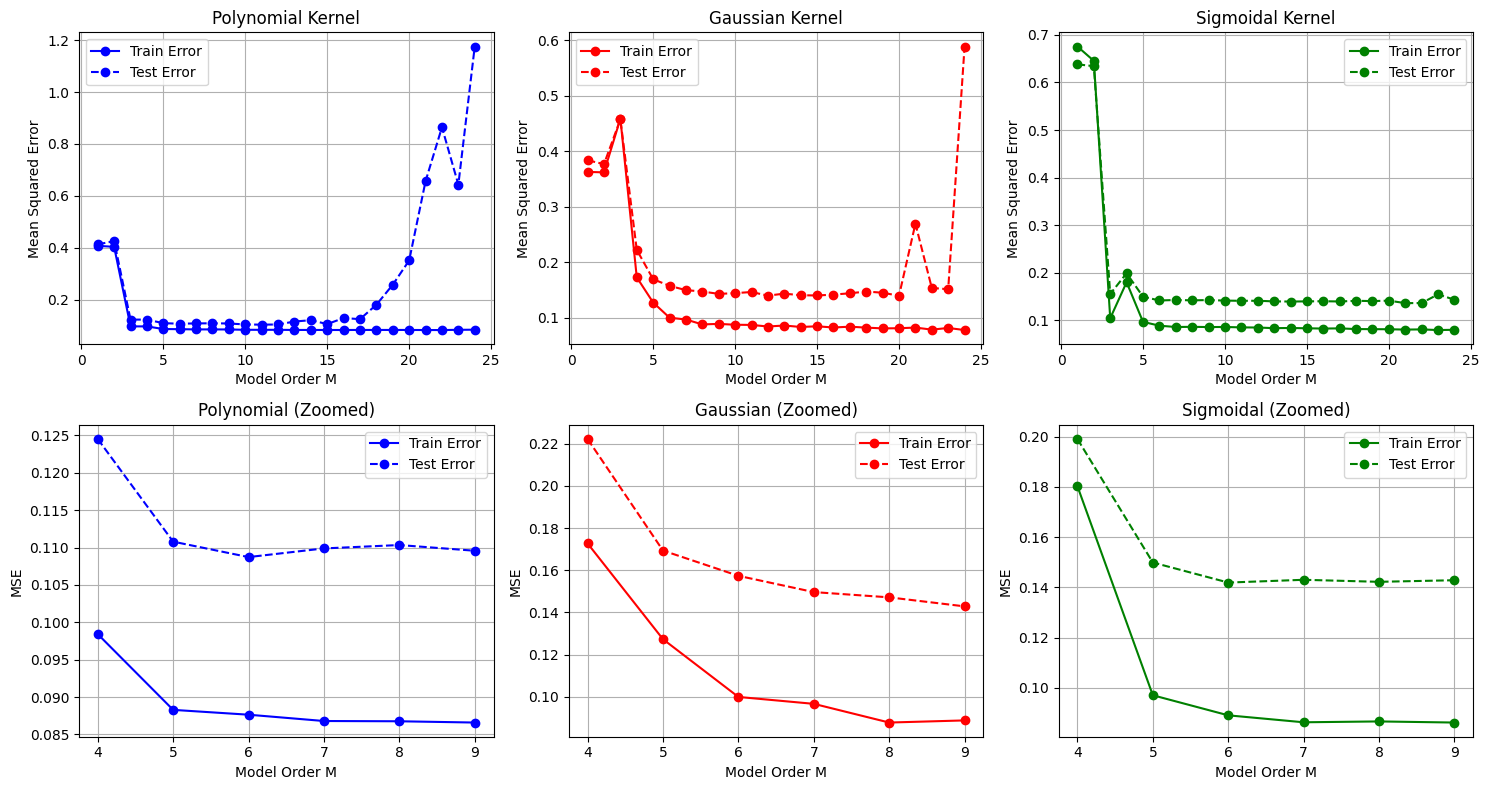

In [ ]:
M_range=list(range(1,25))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

for m in  M_range:
  w_polynomial = closed_form_solution(X_train,Y_train,'polynomial',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_polynomial,X_train,Y_train,X_test,Y_test,'polynomial')
  polynomial_tr_error.append(tr_err)
  polynomial_te_error.append(te_err)

  w_gaussian = closed_form_solution(X_train,Y_train,'gaussian',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_gaussian,X_train,Y_train,X_test,Y_test,'gaussian')
  gaussian_tr_error.append(tr_err)
  gaussian_te_error.append(te_err)

  w_sigmoidal= closed_form_solution(X_train,Y_train,'sigmoidal',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_sigmoidal,X_train,Y_train,X_test,Y_test,'sigmoidal')
  sigmoid_tr_error.append(tr_err)
  sigmoid_te_error.append(te_err)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

# ---------- Full Range Plots (Row 0) ----------
# Polynomial
axes[0, 0].plot(M_range, polynomial_tr_error, 'b-o', label='Train Error')
axes[0, 0].plot(M_range, polynomial_te_error, 'b--o', label='Test Error')
axes[0, 0].set_title('Polynomial Kernel')
axes[0, 0].set_xlabel('Model Order M')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gaussian
axes[0, 1].plot(M_range, gaussian_tr_error, 'r-o', label='Train Error')
axes[0, 1].plot(M_range, gaussian_te_error, 'r--o', label='Test Error')
axes[0, 1].set_title('Gaussian Kernel')
axes[0, 1].set_xlabel('Model Order M')
axes[0, 1].set_ylabel('Mean Squared Error')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Sigmoidal
axes[0, 2].plot(M_range, sigmoid_tr_error, 'g-o', label='Train Error')
axes[0, 2].plot(M_range, sigmoid_te_error, 'g--o', label='Test Error')
axes[0, 2].set_title('Sigmoidal Kernel')
axes[0, 2].set_xlabel('Model Order M')
axes[0, 2].set_ylabel('Mean Squared Error')
axes[0, 2].legend()
axes[0, 2].grid(True)

# ---------- Zoomed-In Plots (Row 1, M = 2 to 5) ----------
zoom_range = list(range(4, 10))  # M = 2 to 5
zoom_idx = [M_range.index(m) for m in zoom_range]

# Polynomial zoom
axes[1, 0].plot(zoom_range, [polynomial_tr_error[i] for i in zoom_idx], 'b-o', label='Train Error')
axes[1, 0].plot(zoom_range, [polynomial_te_error[i] for i in zoom_idx], 'b--o', label='Test Error')
axes[1, 0].set_title('Polynomial (Zoomed)')
axes[1, 0].set_xlabel('Model Order M')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Gaussian zoom
axes[1, 1].plot(zoom_range, [gaussian_tr_error[i] for i in zoom_idx], 'r-o', label='Train Error')
axes[1, 1].plot(zoom_range, [gaussian_te_error[i] for i in zoom_idx], 'r--o', label='Test Error')
axes[1, 1].set_title('Gaussian (Zoomed)')
axes[1, 1].set_xlabel('Model Order M')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Sigmoidal zoom
axes[1, 2].plot(zoom_range, [sigmoid_tr_error[i] for i in zoom_idx], 'g-o', label='Train Error')
axes[1, 2].plot(zoom_range, [sigmoid_te_error[i] for i in zoom_idx], 'g--o', label='Test Error')
axes[1, 2].set_title('Sigmoidal (Zoomed)')
axes[1, 2].set_xlabel('Model Order M')
axes[1, 2].set_ylabel('MSE')
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

For part a , the best fit for all the kernels were in range (5-7). Now, we will use stochastic gradient descent to compute weights for different kernels.

Epoch 0/5000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.541705
Epoch 500/5000: Train MSE=0.1585, Test MSE=0.1825, |∇|=2.500327
Epoch 1000/5000: Train MSE=0.1183, Test MSE=0.1416, |∇|=0.058292
Epoch 1500/5000: Train MSE=0.1005, Test MSE=0.1241, |∇|=0.186051
Epoch 2000/5000: Train MSE=0.0928, Test MSE=0.1159, |∇|=0.184396
Epoch 2500/5000: Train MSE=0.0901, Test MSE=0.1132, |∇|=1.364044
Epoch 3000/5000: Train MSE=0.0889, Test MSE=0.1118, |∇|=0.167544
Epoch 3500/5000: Train MSE=0.0889, Test MSE=0.1117, |∇|=0.070352
Epoch 4000/5000: Train MSE=0.0885, Test MSE=0.1113, |∇|=0.185212
Epoch 4500/5000: Train MSE=0.0883, Test MSE=0.1110, |∇|=0.095803


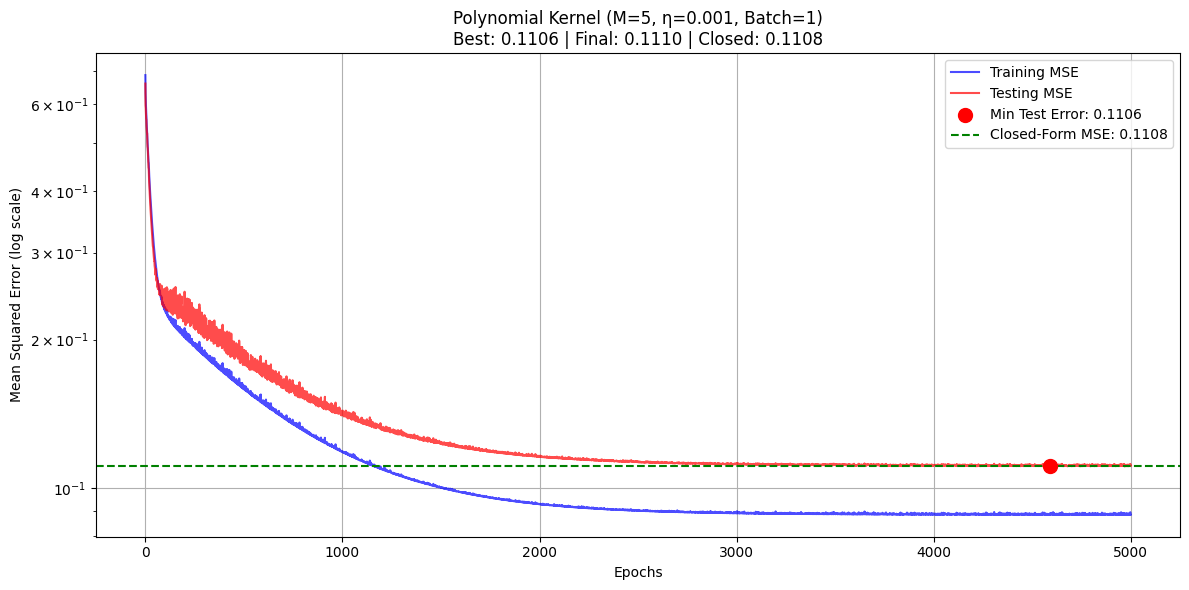


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.188773 |    -0.190194 |     0.001421
w1:    -1.591346 |    -1.601984 |     0.010638
w2:     0.234275 |     0.236635 |     0.002360
w3:     0.684786 |     0.697584 |     0.012798
w4:    -0.035178 |    -0.037346 |     0.002168
w5:    -0.059251 |    -0.063176 |     0.003925
Epoch 0/5000: Train MSE=0.6866, Test MSE=0.6601, |∇|=1.797343
Epoch 500/5000: Train MSE=0.1629, Test MSE=0.1762, |∇|=0.406513
Epoch 1000/5000: Train MSE=0.1309, Test MSE=0.1593, |∇|=0.146312
Epoch 1500/5000: Train MSE=0.1023, Test MSE=0.1235, |∇|=0.099590
Epoch 2000/5000: Train MSE=0.0934, Test MSE=0.1167, |∇|=1.011160
Epoch 2500/5000: Train MSE=0.1021, Test MSE=0.1222, |∇|=0.260727
Epoch 3000/5000: Train MSE=0.0894, Test MSE=0.1115, |∇|=0.082949
Epoch 3500/5000: Train MSE=0.0915, Test MSE=0.1133, |∇|=0.190954
Epoch 4000/5000: Train MSE=0.0908, Test MSE=0.1120, |∇|=0.872162
Epoch 4500/5000: Train MSE=0.0954

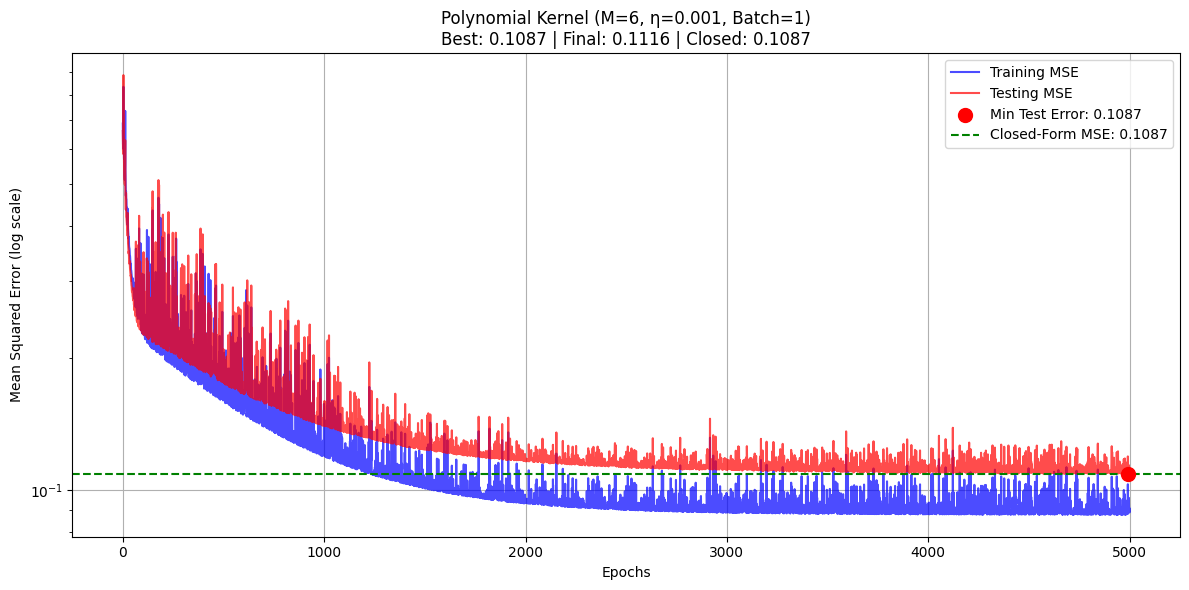


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.184555 |    -0.182225 |     0.002330
w1:    -1.604726 |    -1.617852 |     0.013126
w2:     0.187118 |     0.169228 |     0.017890
w3:     0.706994 |     0.726388 |     0.019394
w4:     0.013497 |     0.028699 |     0.015202
w5:    -0.066903 |    -0.073697 |     0.006795
w6:    -0.011262 |    -0.015759 |     0.004496
Epoch 0/6000: Train MSE=0.6866, Test MSE=0.6601, |∇|=9.341191
Epoch 600/6000: Train MSE=0.3130, Test MSE=0.3182, |∇|=34.616095
Epoch 1200/6000: Train MSE=0.2470, Test MSE=0.2585, |∇|=0.564267
Epoch 1800/6000: Train MSE=0.1992, Test MSE=0.2088, |∇|=0.273795
Epoch 2400/6000: Train MSE=0.1680, Test MSE=0.1778, |∇|=0.231461
Epoch 3000/6000: Train MSE=0.1480, Test MSE=0.1599, |∇|=2.729570
Epoch 3600/6000: Train MSE=0.1362, Test MSE=0.1496, |∇|=0.138163
Epoch 4200/6000: Train MSE=0.1281, Test MSE=0.1430, |∇|=0.322745
Epoch 4800/6000: Train MSE=0.1220, Test MSE=0.1369

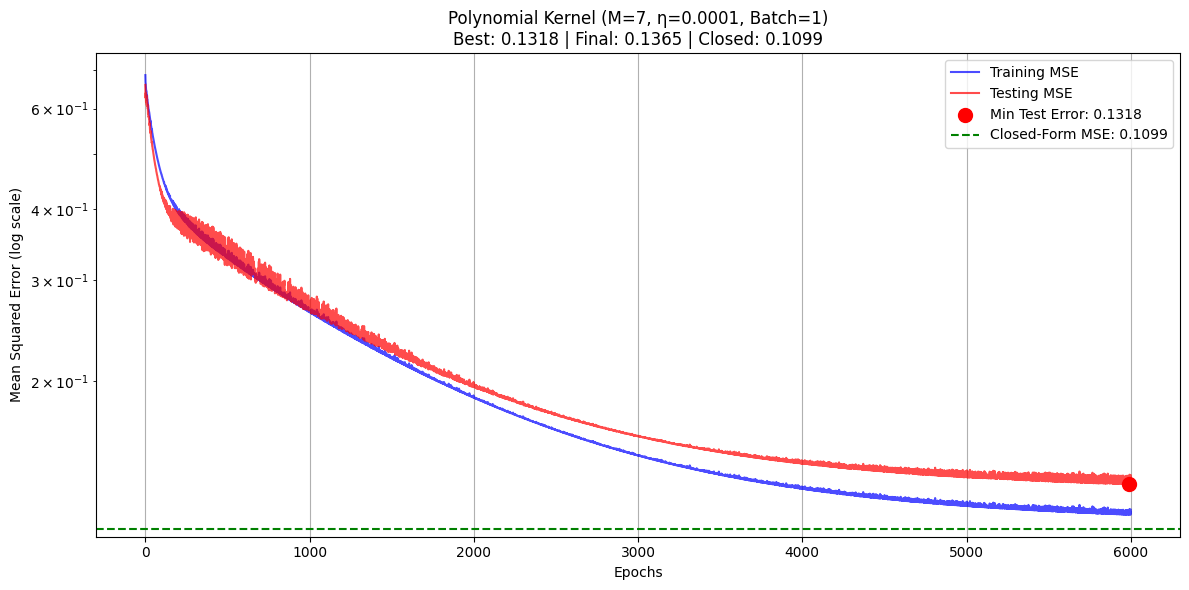


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.149291 |    -0.190425 |     0.041133
w1:    -1.172722 |    -1.674051 |     0.501329
w2:     0.117126 |     0.220480 |     0.103354
w3:    -0.122327 |     0.878043 |     1.000370
w4:     0.077849 |    -0.028486 |     0.106335
w5:     0.375503 |    -0.177026 |     0.552529
w6:    -0.028351 |    -0.000124 |     0.028228
w7:    -0.071433 |     0.020301 |     0.091733


In [ ]:
#For polynomial kernel

w5= training(X_train, Y_train, X_test, Y_test, 'polynomial', 5, 5000, 0.001, BatchSize=1)
w6 = training(X_train, Y_train,X_test,Y_test,'polynomial',6,5000,0.001,BatchSize=1)
w7 = training(X_train, Y_train,X_test,Y_test,'polynomial',7,6000,0.0001,BatchSize=1)

Epoch 0/4000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.815531
Epoch 400/4000: Train MSE=0.1334, Test MSE=0.1785, |∇|=0.084402
Epoch 800/4000: Train MSE=0.1296, Test MSE=0.1742, |∇|=0.223345
Epoch 1200/4000: Train MSE=0.1294, Test MSE=0.1743, |∇|=0.070944
Epoch 1600/4000: Train MSE=0.1294, Test MSE=0.1744, |∇|=0.015038
Epoch 2000/4000: Train MSE=0.1294, Test MSE=0.1744, |∇|=0.165589
Epoch 2400/4000: Train MSE=0.1294, Test MSE=0.1744, |∇|=0.124988
Epoch 2800/4000: Train MSE=0.1293, Test MSE=0.1744, |∇|=0.201126
Epoch 3200/4000: Train MSE=0.1293, Test MSE=0.1743, |∇|=0.225367
Epoch 3600/4000: Train MSE=0.1293, Test MSE=0.1743, |∇|=0.152538


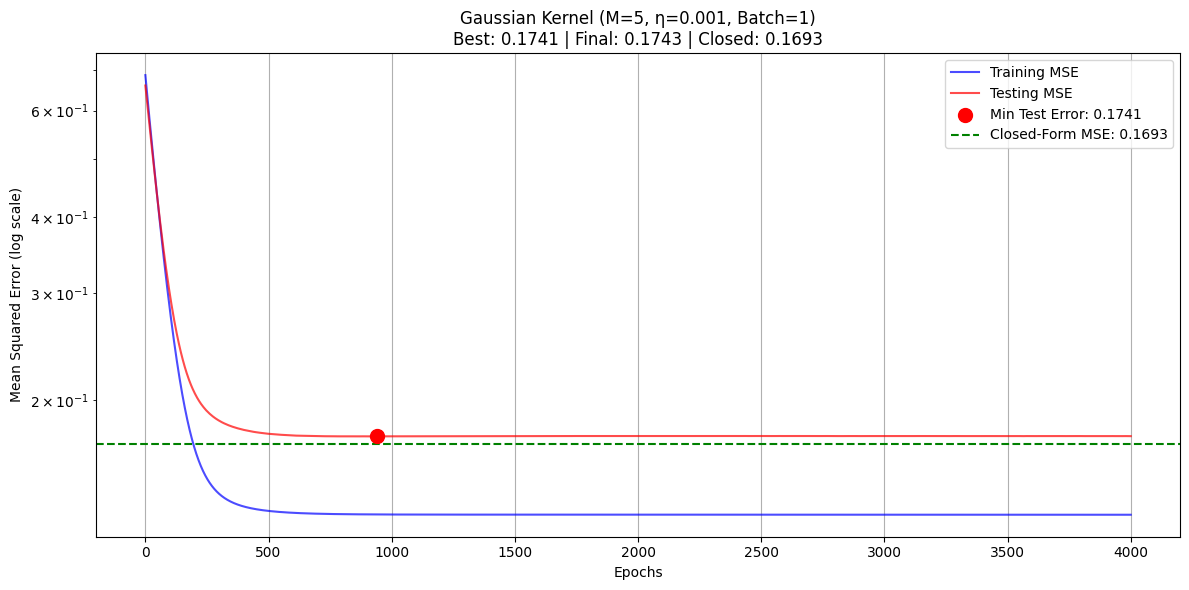


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.036805 |    -1.079955 |     1.043150
w1:     0.128877 |     1.082101 |     0.953224
w2:     1.055214 |     1.965845 |     0.910631
w3:     0.089168 |     1.011314 |     0.922146
w4:    -1.056621 |    -0.148048 |     0.908573
w5:    -0.216160 |     0.761309 |     0.977469
Epoch 0/4000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.322279
Epoch 400/4000: Train MSE=0.1056, Test MSE=0.1583, |∇|=0.175484
Epoch 800/4000: Train MSE=0.1004, Test MSE=0.1554, |∇|=0.015448
Epoch 1200/4000: Train MSE=0.1000, Test MSE=0.1564, |∇|=0.058666
Epoch 1600/4000: Train MSE=0.0999, Test MSE=0.1569, |∇|=0.036524
Epoch 2000/4000: Train MSE=0.0999, Test MSE=0.1570, |∇|=0.019987
Epoch 2400/4000: Train MSE=0.0999, Test MSE=0.1571, |∇|=0.178665
Epoch 2800/4000: Train MSE=0.0999, Test MSE=0.1571, |∇|=0.054990
Epoch 3200/4000: Train MSE=0.0999, Test MSE=0.1571, |∇|=0.038989
Epoch 3600/4000: Train MSE=0.0999,

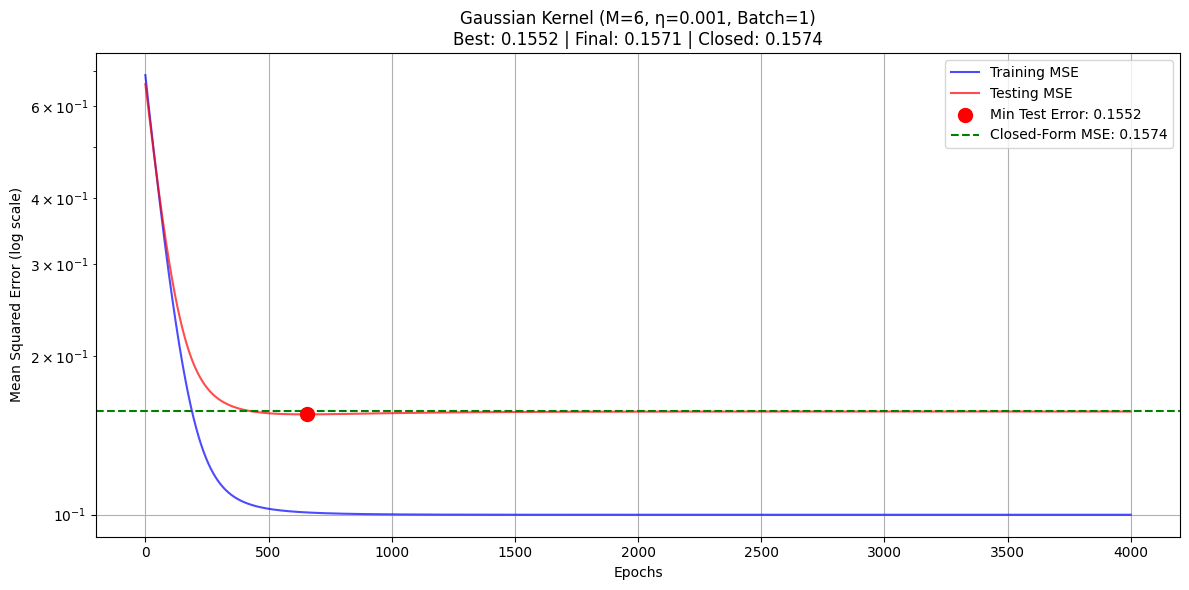


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.020391 |     0.085273 |     0.105664
w1:     0.068534 |    -0.071823 |     0.140358
w2:     0.950582 |     0.890804 |     0.059778
w3:     0.565743 |     0.466395 |     0.099348
w4:    -0.525457 |    -0.611919 |     0.086462
w5:    -0.910577 |    -1.011334 |     0.100758
w6:    -0.188449 |    -0.258428 |     0.069978
Epoch 0/4000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.340154
Epoch 400/4000: Train MSE=0.1074, Test MSE=0.1556, |∇|=0.226438
Epoch 800/4000: Train MSE=0.0985, Test MSE=0.1468, |∇|=0.075034
Epoch 1200/4000: Train MSE=0.0972, Test MSE=0.1467, |∇|=0.057526
Epoch 1600/4000: Train MSE=0.0969, Test MSE=0.1472, |∇|=0.135538
Epoch 2000/4000: Train MSE=0.0968, Test MSE=0.1476, |∇|=0.316912
Epoch 2400/4000: Train MSE=0.0968, Test MSE=0.1478, |∇|=0.315921
Epoch 2800/4000: Train MSE=0.0968, Test MSE=0.1479, |∇|=0.148199
Epoch 3200/4000: Train MSE=0.0968, Test MSE=0.1480, 

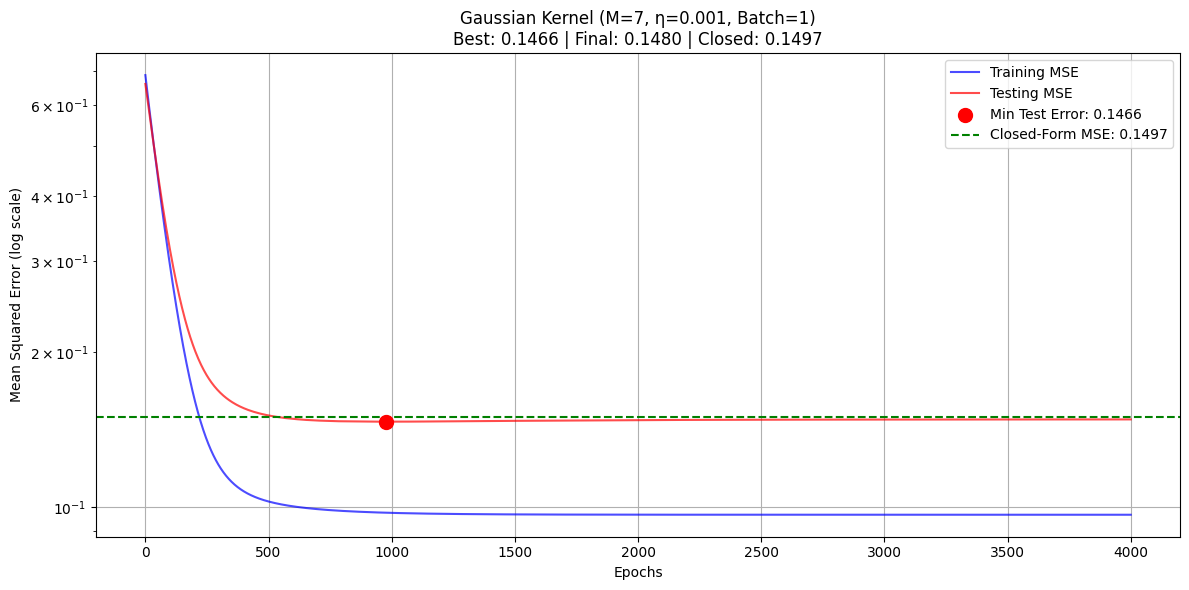


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.017169 |     0.401501 |     0.418670
w1:     0.020661 |    -0.390530 |     0.411191
w2:     0.838861 |     0.540258 |     0.298602
w3:     0.773547 |     0.397160 |     0.376388
w4:     0.063126 |    -0.265347 |     0.328473
w5:    -0.768220 |    -1.133333 |     0.365112
w6:    -0.837921 |    -1.176965 |     0.339044
w7:    -0.108917 |    -0.472384 |     0.363467


In [ ]:
# For gaussian kernel

w5_gaussian= training(X_train, Y_train, X_test, Y_test, 'gaussian', 5, 4000, 0.001, BatchSize=1)
w6_gaussian = training(X_train, Y_train,X_test,Y_test,'gaussian',6,4000,0.001,BatchSize=1)
w7_gaussian = training(X_train, Y_train,X_test,Y_test,'gaussian',7,4000,0.001,BatchSize=1)

Epoch 0/5000: Train MSE=0.6866, Test MSE=0.6601, |∇|=1.783533
Epoch 500/5000: Train MSE=0.2346, Test MSE=0.2667, |∇|=0.235740
Epoch 1000/5000: Train MSE=0.1907, Test MSE=0.2213, |∇|=0.355997
Epoch 1500/5000: Train MSE=0.1679, Test MSE=0.2000, |∇|=0.006662
Epoch 2000/5000: Train MSE=0.1550, Test MSE=0.1891, |∇|=0.055887
Epoch 2500/5000: Train MSE=0.1467, Test MSE=0.1825, |∇|=0.252027
Epoch 3000/5000: Train MSE=0.1407, Test MSE=0.1777, |∇|=0.433401
Epoch 3500/5000: Train MSE=0.1359, Test MSE=0.1738, |∇|=0.344120
Epoch 4000/5000: Train MSE=0.1317, Test MSE=0.1704, |∇|=0.154975
Epoch 4500/5000: Train MSE=0.1281, Test MSE=0.1675, |∇|=0.320485


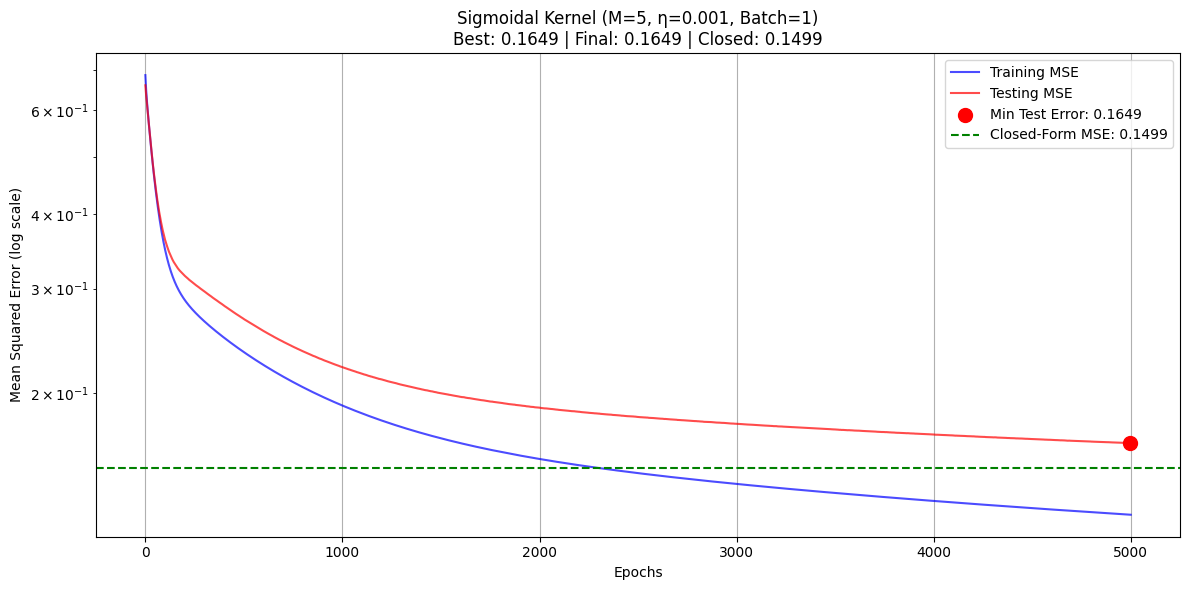


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.407945 |    -1.201077 |     0.793132
w1:     1.210826 |     2.258882 |     1.048056
w2:     0.150374 |    -0.206962 |     0.357336
w3:    -1.901864 |    -1.700698 |     0.201166
w4:     0.052198 |    -0.205441 |     0.257639
w5:     1.290984 |     2.090236 |     0.799252
Epoch 0/5000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.232069
Epoch 500/5000: Train MSE=0.2065, Test MSE=0.2378, |∇|=0.143817
Epoch 1000/5000: Train MSE=0.1547, Test MSE=0.1876, |∇|=0.358378
Epoch 1500/5000: Train MSE=0.1313, Test MSE=0.1704, |∇|=0.194431
Epoch 2000/5000: Train MSE=0.1208, Test MSE=0.1647, |∇|=0.074007
Epoch 2500/5000: Train MSE=0.1158, Test MSE=0.1627, |∇|=0.135991
Epoch 3000/5000: Train MSE=0.1129, Test MSE=0.1614, |∇|=0.052779
Epoch 3500/5000: Train MSE=0.1109, Test MSE=0.1604, |∇|=0.404087
Epoch 4000/5000: Train MSE=0.1092, Test MSE=0.1593, |∇|=0.144144
Epoch 4500/5000: Train MSE=0.1078

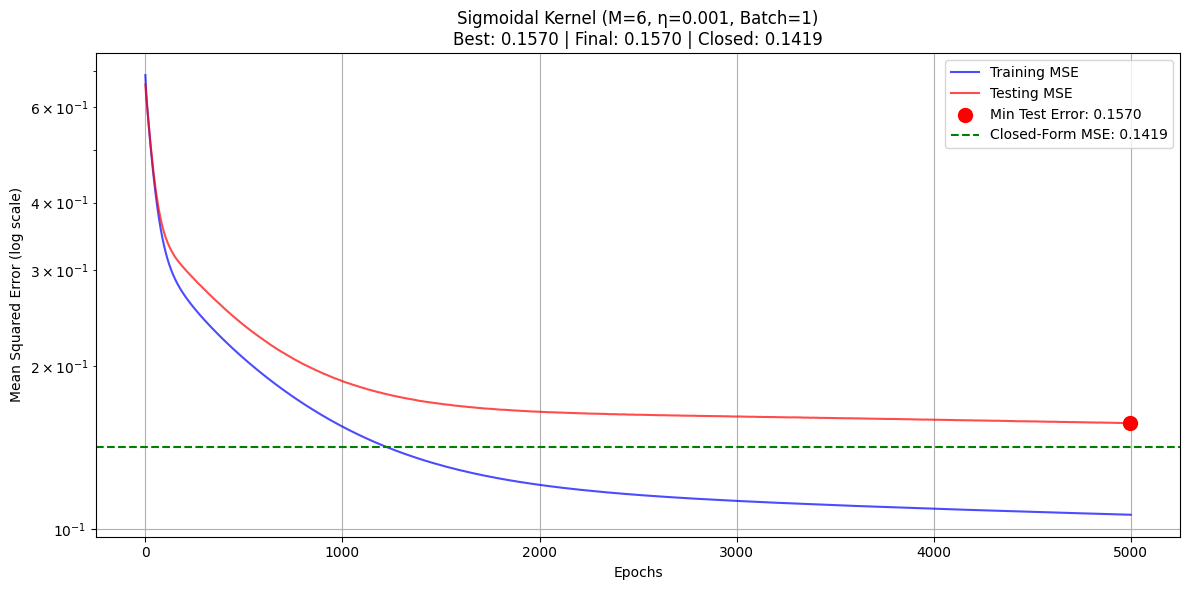


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.278608 |    -1.000519 |     0.721912
w1:     0.867975 |     1.917281 |     1.049306
w2:     0.625549 |     0.181035 |     0.444515
w3:    -1.145966 |    -1.006913 |     0.139053
w4:    -1.373684 |    -1.331561 |     0.042123
w5:     0.595436 |     0.377399 |     0.218037
w6:     0.918348 |     1.548205 |     0.629858
Epoch 0/5000: Train MSE=0.6866, Test MSE=0.6601, |∇|=0.810555
Epoch 500/5000: Train MSE=0.1846, Test MSE=0.2169, |∇|=0.701784
Epoch 1000/5000: Train MSE=0.1351, Test MSE=0.1715, |∇|=0.409602
Epoch 1500/5000: Train MSE=0.1165, Test MSE=0.1605, |∇|=0.045688
Epoch 2000/5000: Train MSE=0.1094, Test MSE=0.1583, |∇|=0.356473
Epoch 2500/5000: Train MSE=0.1061, Test MSE=0.1578, |∇|=0.156465
Epoch 3000/5000: Train MSE=0.1041, Test MSE=0.1574, |∇|=0.099385
Epoch 3500/5000: Train MSE=0.1026, Test MSE=0.1568, |∇|=0.283345
Epoch 4000/5000: Train MSE=0.1014, Test MSE=0.1561,

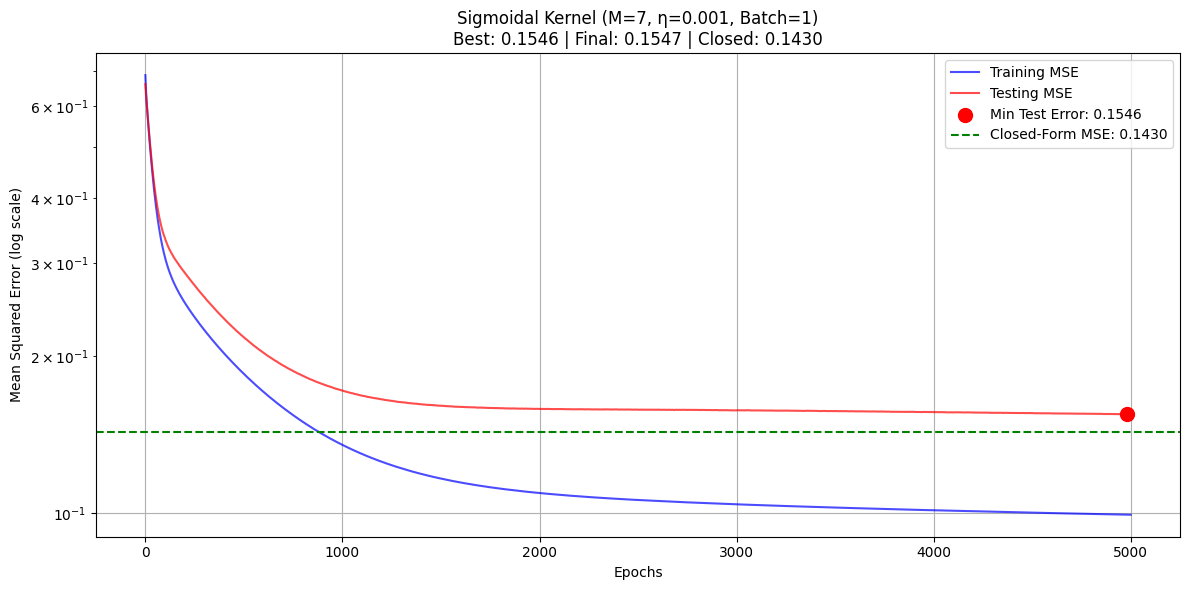


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:    -0.246693 |    -0.943652 |     0.696959
w1:     0.719882 |     1.801443 |     1.081561
w2:     0.778994 |     0.275344 |     0.503650
w3:    -0.617961 |    -0.477912 |     0.140048
w4:    -1.231627 |    -1.269949 |     0.038322
w5:    -0.716148 |    -0.603024 |     0.113124
w6:     0.713091 |     0.401490 |     0.311602
w7:     0.746520 |     1.465162 |     0.718643


In [ ]:
#For sigmoidal kernel

w5_sigmoidal= training(X_train, Y_train, X_test, Y_test, 'sigmoidal', 5, 5000, 0.001, BatchSize=1)
w6_sigmoidal = training(X_train, Y_train,X_test,Y_test,'sigmoidal',6,5000,0.001,BatchSize=1)
w7_sigmoidal = training(X_train, Y_train,X_test,Y_test,'sigmoidal',7,5000,0.001,BatchSize=1)

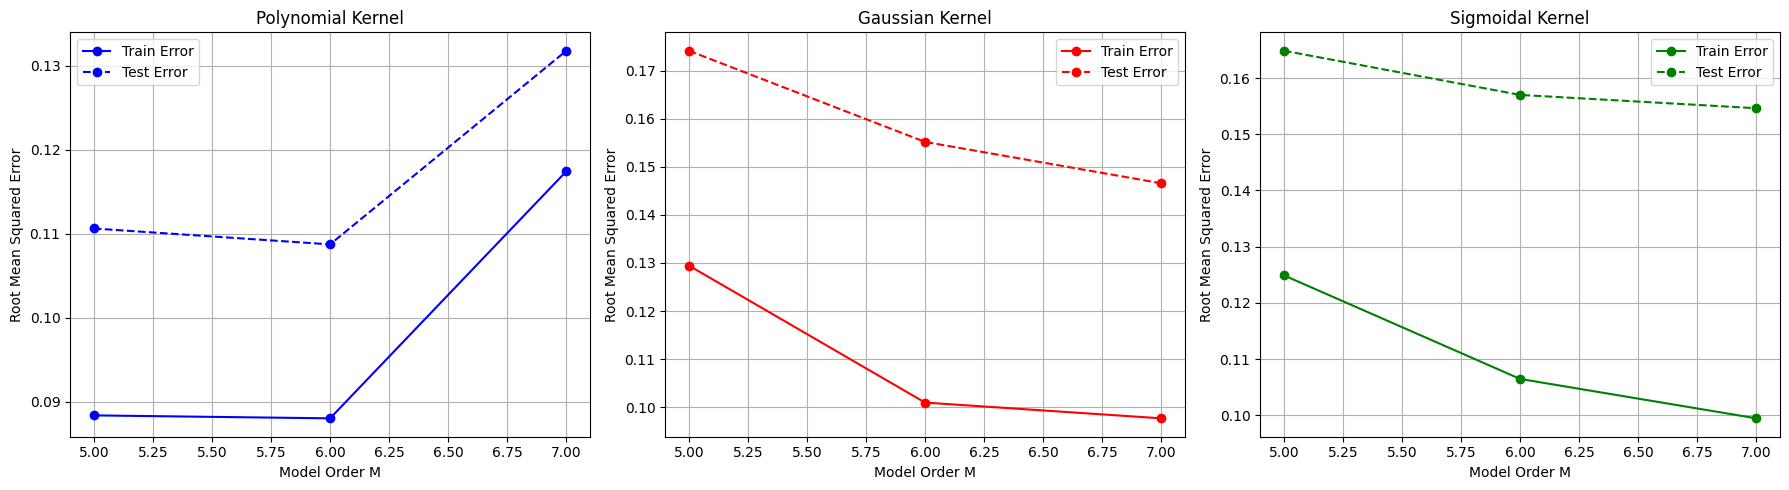

In [ ]:
# Plotting tarining and test errors vs model order from the weights obtained through stochastic gradient descent

m_orders = [5, 6, 7]

poly_tr_error = []
poly_te_error = []
gauss_tr_error = []
gauss_te_error = []
sigm_tr_error = []
sigm_te_error = []


tr_err, te_err = KernelRegressionPred_Error(w5,X_train,Y_train,X_test,Y_test,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6,X_train,Y_train,X_test,Y_test,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7,X_train,Y_train,X_test,Y_test,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)


tr_err, te_err = KernelRegressionPred_Error(w5_gaussian,X_train,Y_train,X_test,Y_test,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6_gaussian,X_train,Y_train,X_test,Y_test,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7_gaussian,X_train,Y_train,X_test,Y_test,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)

tr_err, te_err = KernelRegressionPred_Error(w5_sigmoidal,X_train,Y_train,X_test,Y_test,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6_sigmoidal,X_train,Y_train,X_test,Y_test,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7_sigmoidal,X_train,Y_train,X_test,Y_test,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
kernels = ['Polynomial', 'Gaussian', 'Sigmoidal']
train_errors = [poly_tr_error, gauss_tr_error, sigm_tr_error]
test_errors  = [poly_te_error, gauss_te_error, sigm_te_error]
colors = ['blue', 'red', 'green']

for i in range(3):
    axs[i].plot(m_orders, train_errors[i], marker='o', color=colors[i], label='Train Error')
    axs[i].plot(m_orders, test_errors[i], marker='o', color=colors[i], linestyle='--', label='Test Error')
    axs[i].set_title(f"{kernels[i]} Kernel")
    axs[i].set_xlabel("Model Order M")
    axs[i].set_ylabel("Root Mean Squared Error")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Repeating for 3b

In [ ]:
# Generating the dataset

x1 = np.random.uniform(0, 3, 100)
y1_true = np.zeros_like(x1)

mask1 = (x1 >= 0) & (x1 < 1)
mask2 = (x1 >= 1) & (x1 < 2)
mask3 = (x1 >= 2) & (x1 <= 3)

y1_true[mask1] = np.sin(2 * np.pi * x1[mask1])
y1_true[mask2] = 1 - 2 * np.abs(x1[mask2] - 1.5)
y1_true[mask3] = np.exp(-((x1[mask3] - 2.5) ** 2) / (2 * 0.1 ** 2))

y1 = y1_true + np.random.normal(0, 0.1, 100)

df1 = pd.DataFrame({'x1':x1, 'y1':y1})
train_df1 = df1.iloc[::2].reset_index(drop=True)
test_df1 = df1.iloc[1::2].reset_index(drop=True)
X_train1 = train_df1['x1']
Y_train1 = train_df1['y1']
X_test1 = test_df1['x1']
Y_test1 = test_df1['y1']

mean1 = np.mean(X_train1)
std_dev1 = np.std(X_train1)
X_train1 = (X_train1 - mean1) / std_dev1
X_test1 = (X_test1 - mean1) / std_dev1

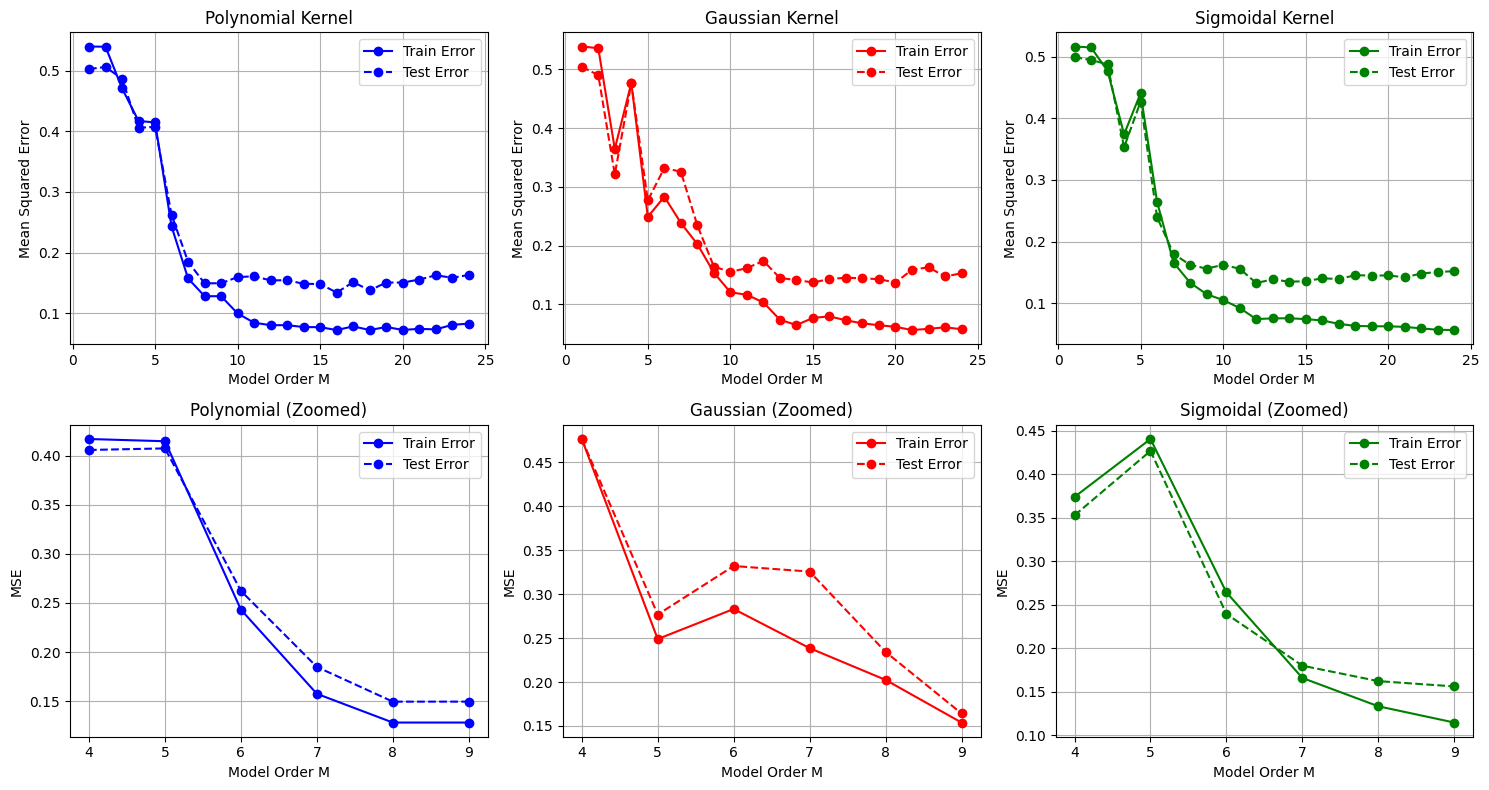

In [ ]:
M_range=list(range(1,25))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

for m in  M_range:
  w_polynomial = closed_form_solution(X_train1,Y_train1,'polynomial',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_polynomial,X_train1,Y_train1,X_test1,Y_test1,'polynomial')
  polynomial_tr_error.append(tr_err)
  polynomial_te_error.append(te_err)

  w_gaussian = closed_form_solution(X_train1,Y_train1,'gaussian',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_gaussian,X_train1,Y_train1,X_test1,Y_test1,'gaussian')
  gaussian_tr_error.append(tr_err)
  gaussian_te_error.append(te_err)

  w_sigmoidal= closed_form_solution(X_train1,Y_train1,'sigmoidal',m,0)
  tr_err, te_err = KernelRegressionPred_Error(w_sigmoidal,X_train1,Y_train1,X_test1,Y_test1,'sigmoidal')
  sigmoid_tr_error.append(tr_err)
  sigmoid_te_error.append(te_err)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

# ---------- Full Range Plots (Row 0) ----------
# Polynomial
axes[0, 0].plot(M_range, polynomial_tr_error, 'b-o', label='Train Error')
axes[0, 0].plot(M_range, polynomial_te_error, 'b--o', label='Test Error')
axes[0, 0].set_title('Polynomial Kernel')
axes[0, 0].set_xlabel('Model Order M')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gaussian
axes[0, 1].plot(M_range, gaussian_tr_error, 'r-o', label='Train Error')
axes[0, 1].plot(M_range, gaussian_te_error, 'r--o', label='Test Error')
axes[0, 1].set_title('Gaussian Kernel')
axes[0, 1].set_xlabel('Model Order M')
axes[0, 1].set_ylabel('Mean Squared Error')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Sigmoidal
axes[0, 2].plot(M_range, sigmoid_tr_error, 'g-o', label='Train Error')
axes[0, 2].plot(M_range, sigmoid_te_error, 'g--o', label='Test Error')
axes[0, 2].set_title('Sigmoidal Kernel')
axes[0, 2].set_xlabel('Model Order M')
axes[0, 2].set_ylabel('Mean Squared Error')
axes[0, 2].legend()
axes[0, 2].grid(True)

# ---------- Zoomed-In Plots (Row 1, M = 2 to 5) ----------
zoom_range = list(range(4, 10))  # M = 2 to 5
zoom_idx = [M_range.index(m) for m in zoom_range]

# Polynomial zoom
axes[1, 0].plot(zoom_range, [polynomial_tr_error[i] for i in zoom_idx], 'b-o', label='Train Error')
axes[1, 0].plot(zoom_range, [polynomial_te_error[i] for i in zoom_idx], 'b--o', label='Test Error')
axes[1, 0].set_title('Polynomial (Zoomed)')
axes[1, 0].set_xlabel('Model Order M')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Gaussian zoom
axes[1, 1].plot(zoom_range, [gaussian_tr_error[i] for i in zoom_idx], 'r-o', label='Train Error')
axes[1, 1].plot(zoom_range, [gaussian_te_error[i] for i in zoom_idx], 'r--o', label='Test Error')
axes[1, 1].set_title('Gaussian (Zoomed)')
axes[1, 1].set_xlabel('Model Order M')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Sigmoidal zoom
axes[1, 2].plot(zoom_range, [sigmoid_tr_error[i] for i in zoom_idx], 'g-o', label='Train Error')
axes[1, 2].plot(zoom_range, [sigmoid_te_error[i] for i in zoom_idx], 'g--o', label='Test Error')
axes[1, 2].set_title('Sigmoidal (Zoomed)')
axes[1, 2].set_xlabel('Model Order M')
axes[1, 2].set_ylabel('MSE')
axes[1, 2].legend()
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.479233
Epoch 500/5000: Train MSE=0.4251, Test MSE=0.4188, |∇|=0.361285
Epoch 1000/5000: Train MSE=0.4173, Test MSE=0.4086, |∇|=1.048220
Epoch 1500/5000: Train MSE=0.4184, Test MSE=0.4109, |∇|=6.366309
Epoch 2000/5000: Train MSE=0.4238, Test MSE=0.4093, |∇|=0.236064
Epoch 2500/5000: Train MSE=0.4152, Test MSE=0.4083, |∇|=5.357722
Epoch 3000/5000: Train MSE=0.4179, Test MSE=0.4074, |∇|=0.239637
Epoch 3500/5000: Train MSE=0.4165, Test MSE=0.4066, |∇|=0.658936
Epoch 4000/5000: Train MSE=0.4151, Test MSE=0.4073, |∇|=4.976239
Epoch 4500/5000: Train MSE=0.4147, Test MSE=0.4075, |∇|=0.132926


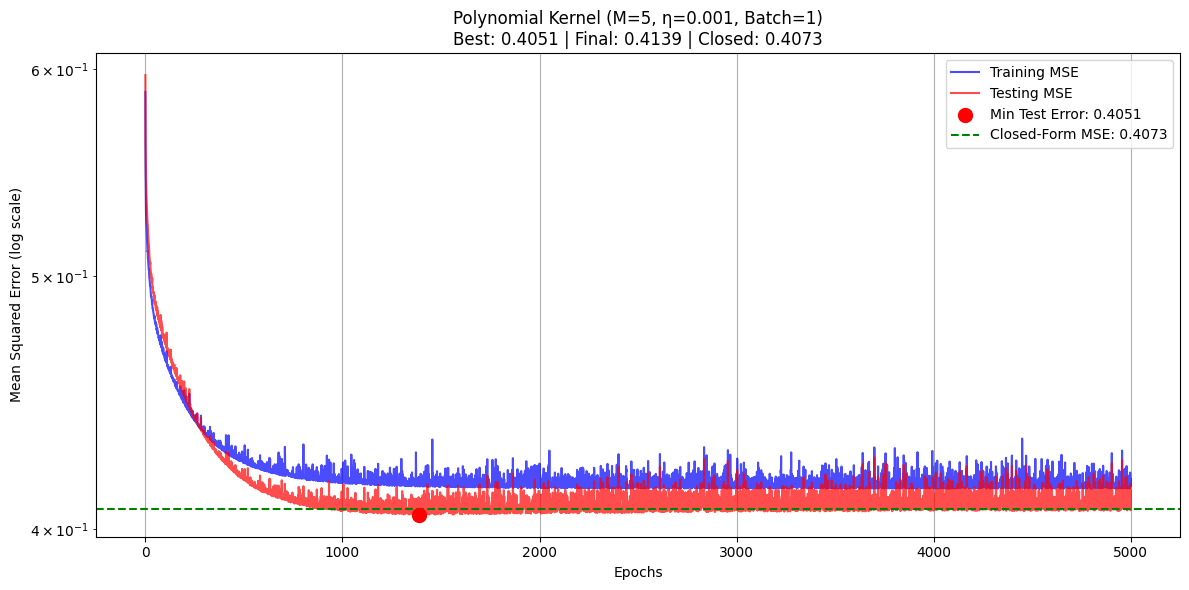


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.373173 |     0.373228 |     0.000055
w1:     0.770958 |     0.865701 |     0.094743
w2:    -0.588719 |    -0.588856 |     0.000137
w3:    -0.507283 |    -0.628533 |     0.121249
w4:     0.246327 |     0.237203 |     0.009124
w5:     0.033988 |     0.061004 |     0.027017
Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.385196
Epoch 500/5000: Train MSE=0.5801, Test MSE=0.5450, |∇|=0.690621
Epoch 1000/5000: Train MSE=0.3741, Test MSE=0.3684, |∇|=0.144914
Epoch 1500/5000: Train MSE=0.3345, Test MSE=0.3492, |∇|=31.800661
Epoch 2000/5000: Train MSE=0.4117, Test MSE=0.3581, |∇|=0.212322
Epoch 2500/5000: Train MSE=0.2812, Test MSE=0.2863, |∇|=0.202768
Epoch 3000/5000: Train MSE=0.3248, Test MSE=0.3419, |∇|=0.213603
Epoch 3500/5000: Train MSE=0.7520, Test MSE=0.7015, |∇|=0.010609
Epoch 4000/5000: Train MSE=0.2866, Test MSE=0.2632, |∇|=0.137833
Epoch 4500/5000: Train MSE=0.643

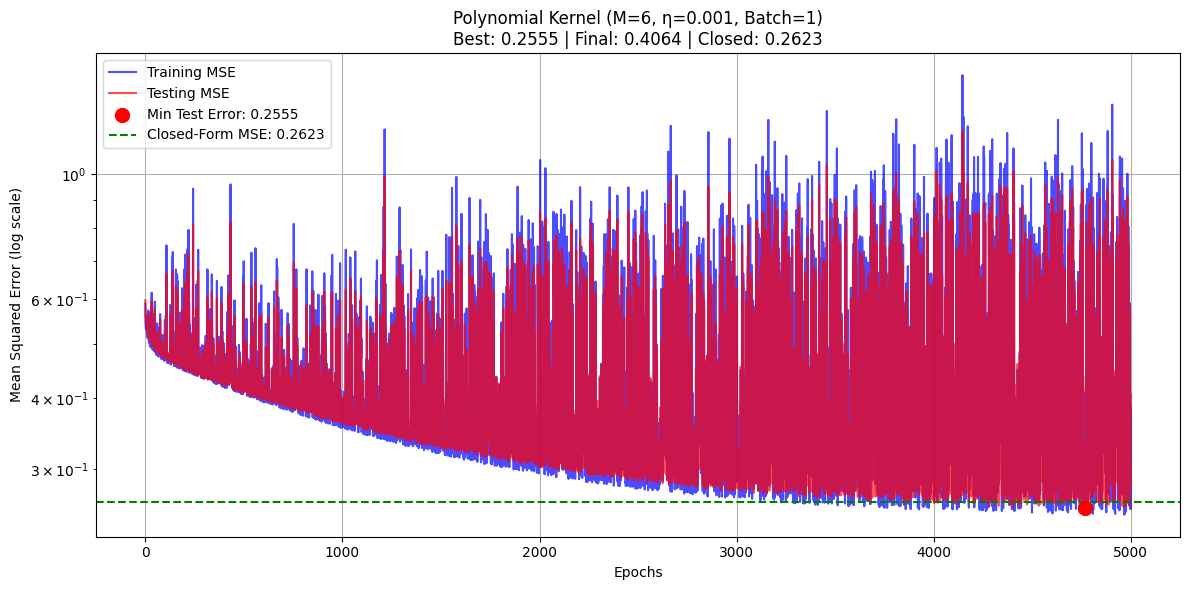


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.637205 |     0.698238 |     0.061032
w1:     1.287105 |     1.349339 |     0.062234
w2:    -2.371294 |    -2.769221 |     0.397927
w3:    -1.425857 |    -1.551592 |     0.125735
w4:     2.033396 |     2.365412 |     0.332016
w5:     0.352201 |     0.398807 |     0.046607
w6:    -0.436373 |    -0.502493 |     0.066120
Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=12.239850
Epoch 500/5000: Train MSE=0.4837, Test MSE=0.4893, |∇|=3.122905
Epoch 1000/5000: Train MSE=0.4613, Test MSE=0.4668, |∇|=0.514218
Epoch 1500/5000: Train MSE=0.4479, Test MSE=0.4559, |∇|=0.836754
Epoch 2000/5000: Train MSE=0.4397, Test MSE=0.4501, |∇|=0.313671
Epoch 2500/5000: Train MSE=0.4304, Test MSE=0.4409, |∇|=6.040545
Epoch 3000/5000: Train MSE=0.4208, Test MSE=0.4362, |∇|=0.722687
Epoch 3500/5000: Train MSE=0.4122, Test MSE=0.4291, |∇|=1.044813
Epoch 4000/5000: Train MSE=0.4052, Test MSE=0.4237

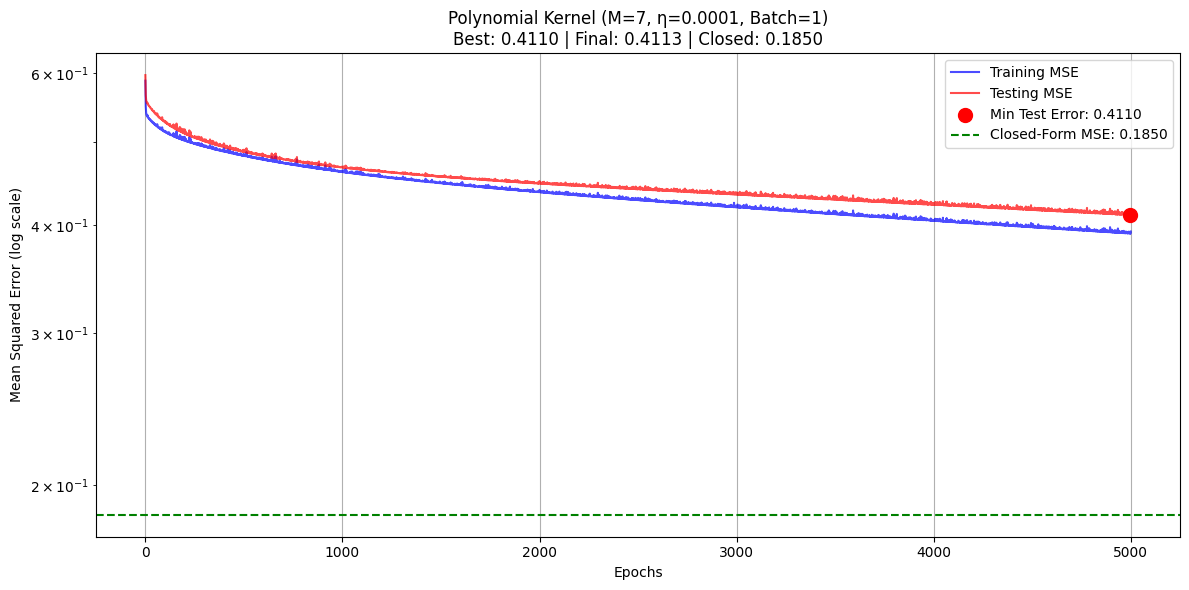


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.275690 |     0.800148 |     0.524459
w1:     0.607539 |     0.616049 |     0.008510
w2:    -0.557507 |    -3.662165 |     3.104659
w3:    -0.136045 |     0.596577 |     0.732623
w4:     0.517877 |     3.387266 |     2.869389
w5:    -0.249701 |    -1.122589 |     0.872888
w6:    -0.108684 |    -0.781095 |     0.672411
w7:     0.069133 |     0.306901 |     0.237768


In [ ]:
#For polynomial kernel

w5= training(X_train1, Y_train1, X_test1, Y_test1, 'polynomial', 5, 5000, 0.001, BatchSize=1)
w6 = training(X_train1, Y_train1,X_test1,Y_test1,'polynomial',6,5000,0.001,BatchSize=1)
w7 = training(X_train1, Y_train1,X_test1,Y_test1,'polynomial',7,5000,0.0001,BatchSize=1)

Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.000039
Epoch 500/5000: Train MSE=0.2623, Test MSE=0.2606, |∇|=0.152864
Epoch 1000/5000: Train MSE=0.2587, Test MSE=0.2593, |∇|=0.467553
Epoch 1500/5000: Train MSE=0.2586, Test MSE=0.2593, |∇|=0.572373
Epoch 2000/5000: Train MSE=0.2586, Test MSE=0.2594, |∇|=0.384924
Epoch 2500/5000: Train MSE=0.2585, Test MSE=0.2593, |∇|=0.630192
Epoch 3000/5000: Train MSE=0.2585, Test MSE=0.2594, |∇|=0.523127
Epoch 3500/5000: Train MSE=0.2584, Test MSE=0.2593, |∇|=0.295363
Epoch 4000/5000: Train MSE=0.2584, Test MSE=0.2594, |∇|=0.071849
Epoch 4500/5000: Train MSE=0.2584, Test MSE=0.2594, |∇|=0.303565


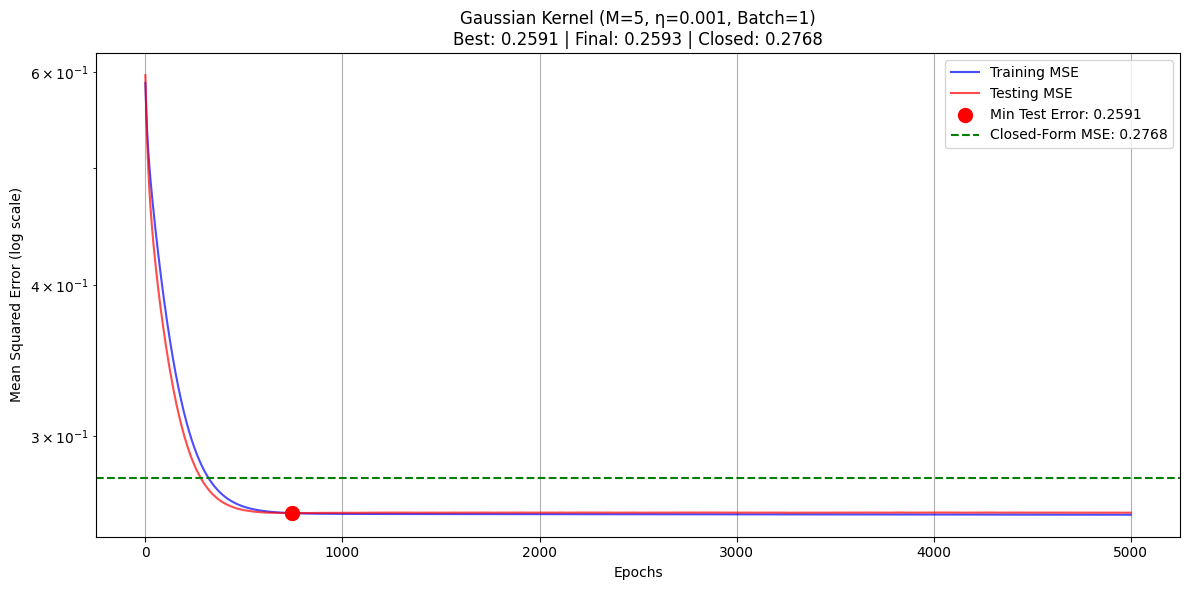


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.238318 |     3.407557 |     3.169239
w1:     0.724023 |    -2.171042 |     2.895065
w2:    -1.003460 |    -3.787037 |     2.783577
w3:     0.712648 |    -2.105494 |     2.818141
w4:    -0.197885 |    -2.979523 |     2.781638
w5:    -0.088135 |    -2.977568 |     2.889432
Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.575219
Epoch 500/5000: Train MSE=0.2972, Test MSE=0.3266, |∇|=0.498914
Epoch 1000/5000: Train MSE=0.2894, Test MSE=0.3276, |∇|=0.272461
Epoch 1500/5000: Train MSE=0.2892, Test MSE=0.3289, |∇|=0.297820
Epoch 2000/5000: Train MSE=0.2891, Test MSE=0.3292, |∇|=0.196070
Epoch 2500/5000: Train MSE=0.2891, Test MSE=0.3292, |∇|=0.874551
Epoch 3000/5000: Train MSE=0.2891, Test MSE=0.3292, |∇|=0.060655
Epoch 3500/5000: Train MSE=0.2891, Test MSE=0.3293, |∇|=0.196641
Epoch 4000/5000: Train MSE=0.2891, Test MSE=0.3292, |∇|=0.003375
Epoch 4500/5000: Train MSE=0.2890

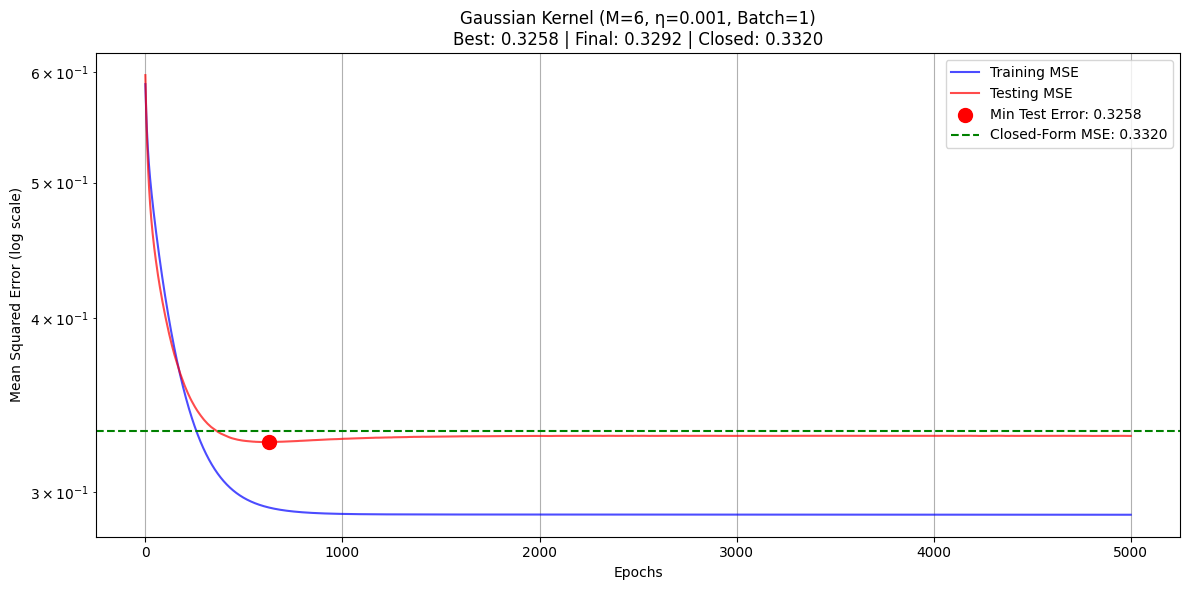


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.210253 |    -3.306105 |     3.516358
w1:     0.869388 |     4.126581 |     3.257193
w2:    -1.061688 |     1.807169 |     2.868856
w3:     0.364213 |     3.405347 |     3.041134
w4:     0.245695 |     3.191861 |     2.946165
w5:    -0.053355 |     2.937923 |     2.991278
w6:    -0.124897 |     2.982785 |     3.107682
Epoch 0/5000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.282052
Epoch 500/5000: Train MSE=0.2878, Test MSE=0.2572, |∇|=0.119653
Epoch 1000/5000: Train MSE=0.2778, Test MSE=0.2549, |∇|=0.300145
Epoch 1500/5000: Train MSE=0.2768, Test MSE=0.2560, |∇|=0.399841
Epoch 2000/5000: Train MSE=0.2766, Test MSE=0.2565, |∇|=0.045022
Epoch 2500/5000: Train MSE=0.2766, Test MSE=0.2567, |∇|=0.391899
Epoch 3000/5000: Train MSE=0.2765, Test MSE=0.2568, |∇|=0.169913
Epoch 3500/5000: Train MSE=0.2765, Test MSE=0.2568, |∇|=0.736752
Epoch 4000/5000: Train MSE=0.2764, Test MSE=0.2567,

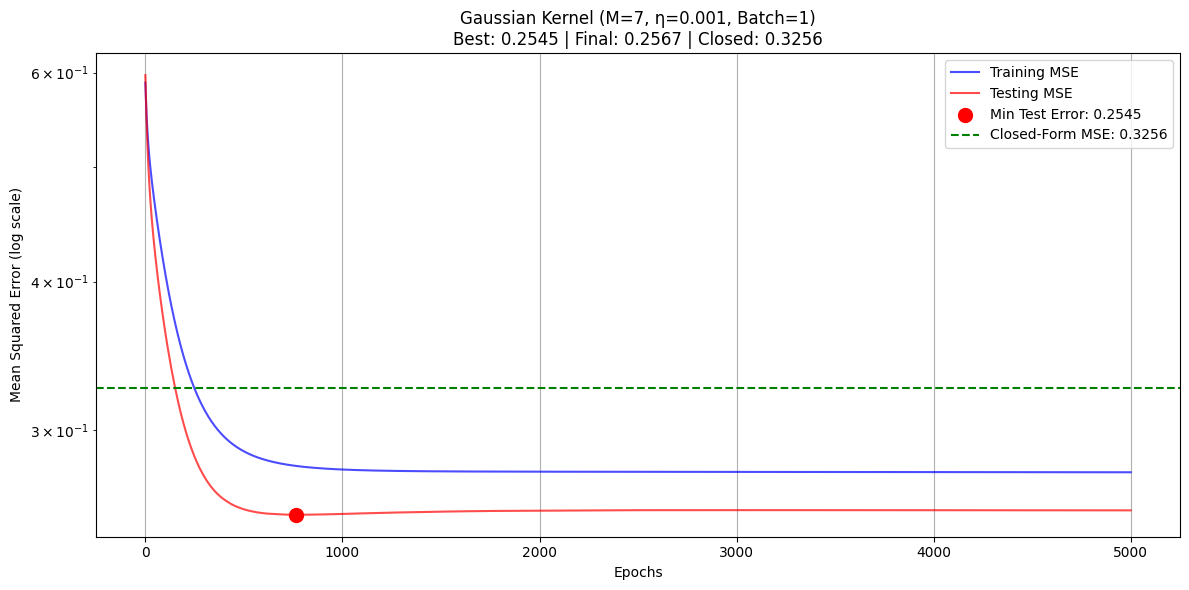


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.209234 |   -10.677278 |    10.886512
w1:     0.814370 |    10.496124 |     9.681754
w2:    -0.652079 |     8.175077 |     8.827156
w3:    -0.489022 |     8.585155 |     9.074177
w4:     0.867743 |     9.902413 |     9.034670
w5:    -0.264215 |     8.706421 |     8.970636
w6:     0.250703 |     9.289233 |     9.038530
w7:    -0.232649 |     9.231103 |     9.463752


In [ ]:
#For gaussian kernel

w5_gaussian= training(X_train1, Y_train1, X_test1, Y_test1, 'gaussian', 5, 5000, 0.001, BatchSize=1)
w6_gaussian = training(X_train1, Y_train1,X_test1,Y_test1,'gaussian',6,5000,0.001,BatchSize=1)
w7_gaussian = training(X_train1, Y_train1,X_test1,Y_test1,'gaussian',7,5000,0.001,BatchSize=1)

Epoch 0/1000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.026707
Epoch 100/1000: Train MSE=0.4977, Test MSE=0.4657, |∇|=0.177218
Epoch 200/1000: Train MSE=0.4807, Test MSE=0.4537, |∇|=0.760500
Epoch 300/1000: Train MSE=0.4695, Test MSE=0.4513, |∇|=0.883061
Epoch 400/1000: Train MSE=0.4620, Test MSE=0.4363, |∇|=0.096573
Epoch 500/1000: Train MSE=0.4555, Test MSE=0.4345, |∇|=0.536713
Epoch 600/1000: Train MSE=0.4512, Test MSE=0.4340, |∇|=1.180161
Epoch 700/1000: Train MSE=0.4497, Test MSE=0.4245, |∇|=0.164215
Epoch 800/1000: Train MSE=0.4468, Test MSE=0.4244, |∇|=1.076899
Epoch 900/1000: Train MSE=0.4445, Test MSE=0.4273, |∇|=0.658183


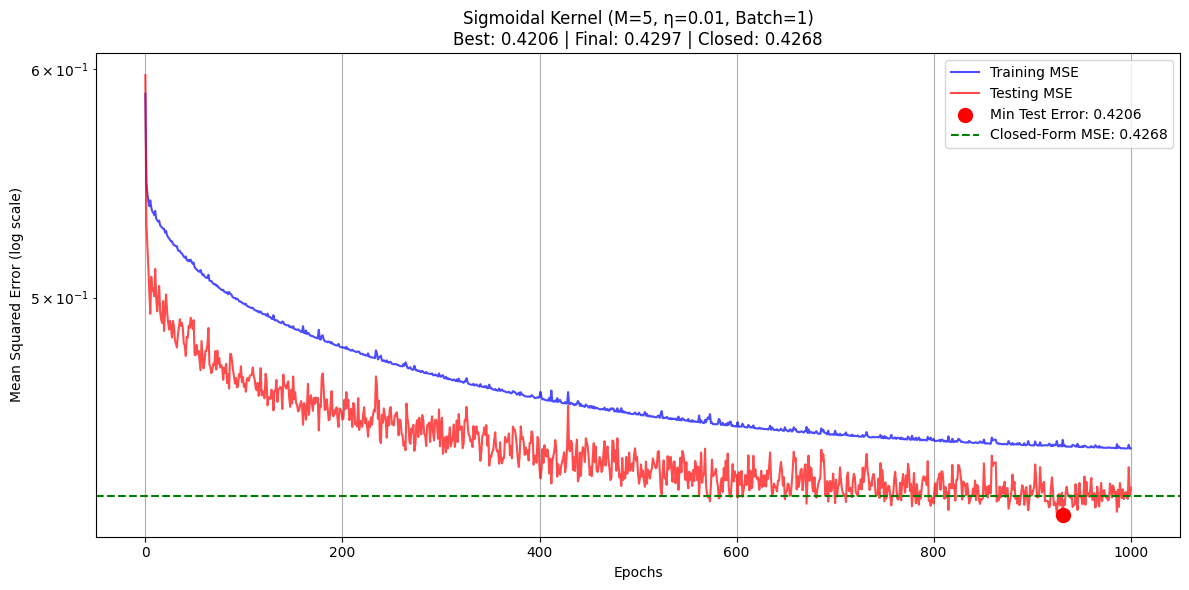


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     2.358733 |     2.893228 |     0.534494
w1:    -2.836688 |    -3.598180 |     0.761492
w2:     0.724420 |     0.978058 |     0.253638
w3:     0.375174 |     0.260641 |     0.114533
w4:    -0.462108 |    -0.393814 |     0.068294
w5:    -0.225274 |    -0.326056 |     0.100781
Epoch 0/4000: Train MSE=0.5882, Test MSE=0.5970, |∇|=0.352861
Epoch 400/4000: Train MSE=0.2966, Test MSE=0.2761, |∇|=1.005320
Epoch 800/4000: Train MSE=0.2806, Test MSE=0.2590, |∇|=0.118255
Epoch 1200/4000: Train MSE=0.2732, Test MSE=0.2499, |∇|=1.036109
Epoch 1600/4000: Train MSE=0.2692, Test MSE=0.2452, |∇|=0.431078
Epoch 2000/4000: Train MSE=0.2672, Test MSE=0.2427, |∇|=0.445487
Epoch 2400/4000: Train MSE=0.2667, Test MSE=0.2429, |∇|=0.147602
Epoch 2800/4000: Train MSE=0.2655, Test MSE=0.2413, |∇|=0.030582
Epoch 3200/4000: Train MSE=0.2649, Test MSE=0.2403, |∇|=0.573599
Epoch 3600/4000: Train MSE=0.2647,

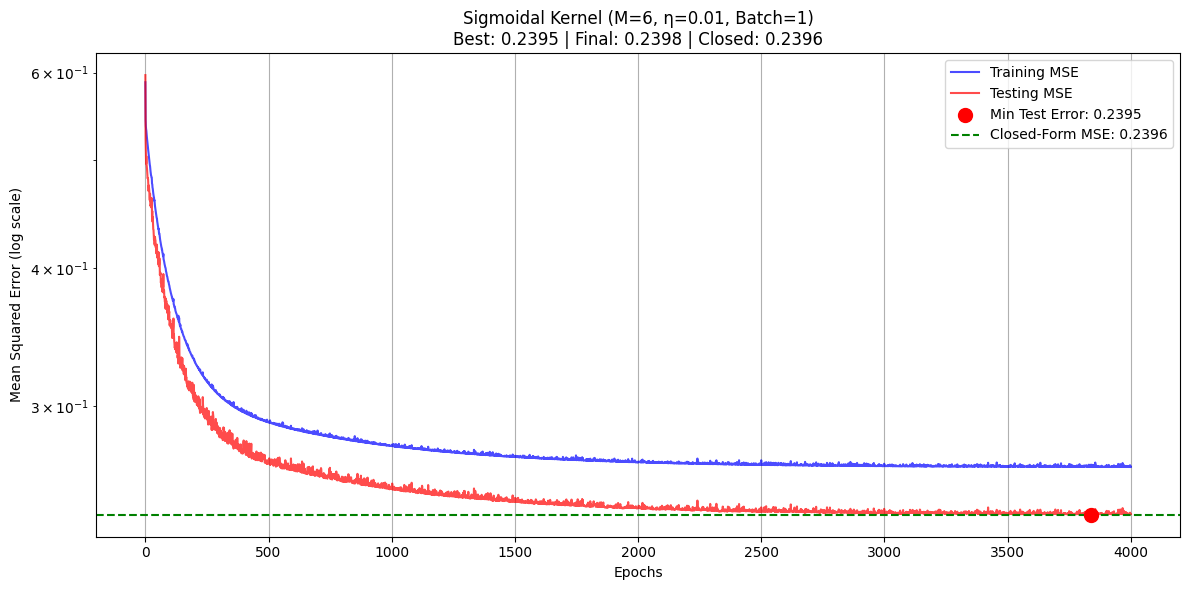


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     1.244495 |     1.223181 |     0.021314
w1:    -0.778235 |    -0.748760 |     0.029475
w2:    -1.710622 |    -1.734280 |     0.023658
w3:     3.024230 |     3.052851 |     0.028622
w4:    -2.393826 |    -2.440419 |     0.046594
w5:     1.896269 |     2.008707 |     0.112438
w6:    -3.007928 |    -3.229147 |     0.221218
Epoch 0/4000: Train MSE=0.5882, Test MSE=0.5970, |∇|=1.054844
Epoch 400/4000: Train MSE=0.2367, Test MSE=0.2498, |∇|=0.148145
Epoch 800/4000: Train MSE=0.2053, Test MSE=0.2240, |∇|=0.528571
Epoch 1200/4000: Train MSE=0.1908, Test MSE=0.2128, |∇|=0.378237
Epoch 1600/4000: Train MSE=0.1822, Test MSE=0.2046, |∇|=0.331439
Epoch 2000/4000: Train MSE=0.1769, Test MSE=0.1981, |∇|=0.897089
Epoch 2400/4000: Train MSE=0.1734, Test MSE=0.1951, |∇|=0.976367
Epoch 2800/4000: Train MSE=0.1709, Test MSE=0.1907, |∇|=0.305789
Epoch 3200/4000: Train MSE=0.1694, Test MSE=0.1883, 

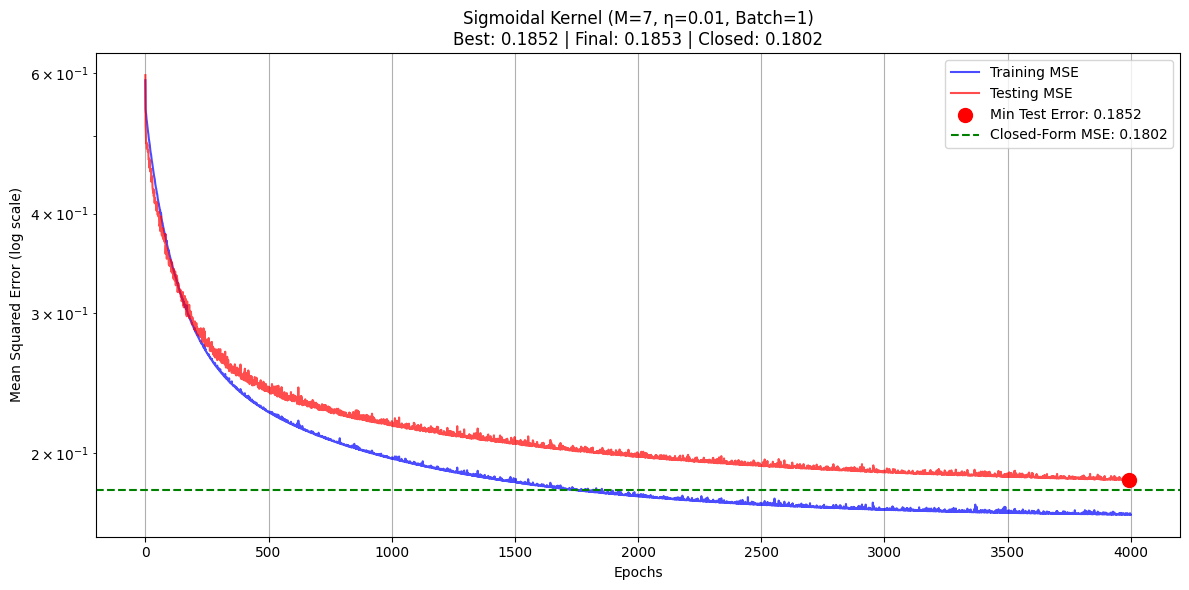


Weight Comparison:
                SGD Weights               Closed-Form Weights       Difference     
w0:     0.001630 |    -0.135473 |     0.137103
w1:     1.675571 |     1.891713 |     0.216141
w2:    -3.969357 |    -4.085927 |     0.116570
w3:     3.917907 |     3.947830 |     0.029924
w4:    -1.180033 |    -1.144039 |     0.035994
w5:    -0.698645 |    -0.833548 |     0.134904
w6:     1.472144 |     1.812709 |     0.340565
w7:    -2.717091 |    -3.317852 |     0.600761


In [ ]:
#For sigmoidal kernel

w5_sigmoidal= training(X_train1, Y_train1, X_test1, Y_test1, 'sigmoidal', 5, 1000, 0.01, BatchSize=1)
w6_sigmoidal = training(X_train1, Y_train1,X_test1,Y_test1,'sigmoidal',6,4000,0.01,BatchSize=1)
w7_sigmoidal = training(X_train1, Y_train1,X_test1,Y_test1,'sigmoidal',7,4000,0.01,BatchSize=1)

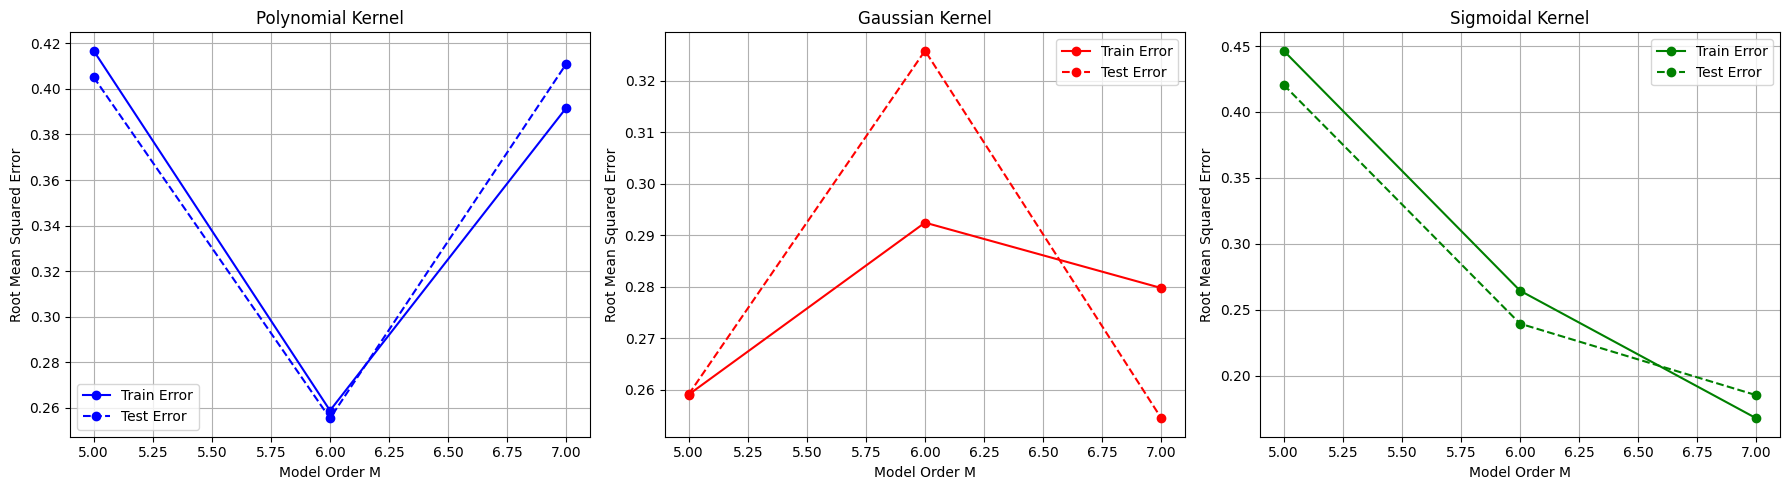

In [ ]:
m_orders = [5, 6, 7]

poly_tr_error = []
poly_te_error = []
gauss_tr_error = []
gauss_te_error = []
sigm_tr_error = []
sigm_te_error = []


tr_err, te_err = KernelRegressionPred_Error(w5,X_train1,Y_train1,X_test1,Y_test1,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6,X_train1,Y_train1,X_test1,Y_test1,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7,X_train1,Y_train1,X_test1,Y_test1,'polynomial')
poly_tr_error.append(tr_err)
poly_te_error.append(te_err)


tr_err, te_err = KernelRegressionPred_Error(w5_gaussian,X_train1,Y_train1,X_test1,Y_test1,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6_gaussian,X_train1,Y_train1,X_test1,Y_test1,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7_gaussian,X_train1,Y_train1,X_test1,Y_test1,'gaussian')
gauss_tr_error.append(tr_err)
gauss_te_error.append(te_err)

tr_err, te_err = KernelRegressionPred_Error(w5_sigmoidal,X_train1,Y_train1,X_test1,Y_test1,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w6_sigmoidal,X_train1,Y_train1,X_test1,Y_test1,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)
tr_err, te_err = KernelRegressionPred_Error(w7_sigmoidal,X_train1,Y_train1,X_test1,Y_test1,'sigmoidal')
sigm_tr_error.append(tr_err)
sigm_te_error.append(te_err)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
kernels = ['Polynomial', 'Gaussian', 'Sigmoidal']
train_errors = [poly_tr_error, gauss_tr_error, sigm_tr_error]
test_errors  = [poly_te_error, gauss_te_error, sigm_te_error]
colors = ['blue', 'red', 'green']

for i in range(3):
    axs[i].plot(m_orders, train_errors[i], marker='o', color=colors[i], label='Train Error')
    axs[i].plot(m_orders, test_errors[i], marker='o', color=colors[i], linestyle='--', label='Test Error')
    axs[i].set_title(f"{kernels[i]} Kernel")
    axs[i].set_xlabel("Model Order M")
    axs[i].set_ylabel("Root Mean Squared Error")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


Training with step size: 0.0005

Training with step size: 0.0001

Training with step size: 0.001

Training with step size: 0.01


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-263-d4fda89f334a>:47: RuntimeWarning: overflow encountered in multiply
  gradient += error * X_tr
<ipython-input-263-d4fda89f334a>:50: RuntimeWarning: invalid value encountered in subtract
  weights -= stepSize * gradient_avg


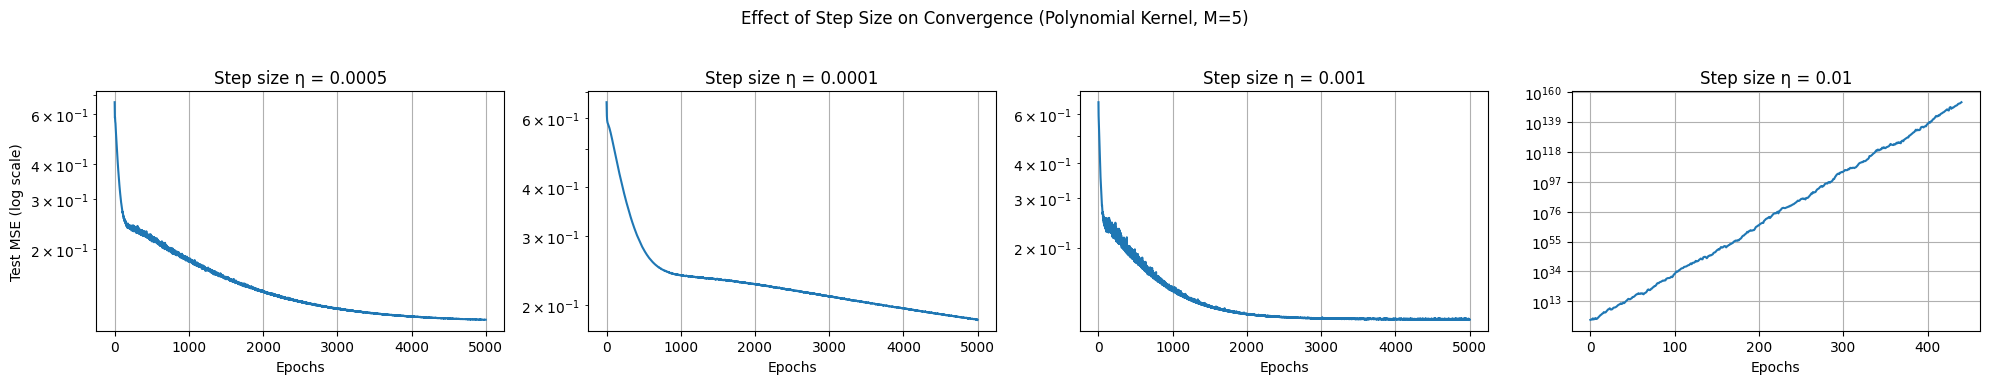

In [ ]:
#Now, to study the effect of step size on convergence of weights, we will focus on a fixed kernel, let that be 'polynomial' and a fixed M = 5 and fixed batchsize = 1. We will vary the stepSize

step_sizes = [0.0005, 0.0001, 0.001,0.01]
all_test_errors = {}

for step in step_sizes:
  print(f"\nTraining with step size: {step}")
  _, _, test_err = training(X_train,Y_train,X_test,Y_test,'polynomial',M=5, epochs = 5000 ,stepSize=step,BatchSize=1,print_epochs=False,plot_=False,return_err=True)
  all_test_errors[step] = test_err

fig, axs = plt.subplots(1, len(step_sizes), figsize=(20, 4))

for i, step in enumerate(step_sizes):
    axs[i].semilogy(all_test_errors[step], color='tab:blue')
    axs[i].set_title(f"Step size η = {step}")
    axs[i].set_xlabel("Epochs")
    if i == 0:
        axs[i].set_ylabel("Test MSE (log scale)")
    axs[i].grid(True)

plt.suptitle("Effect of Step Size on Convergence (Polynomial Kernel, M=5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot effectively demonstrates the impact of different step sizes (learning rates) on the convergence behavior of weights in stochastic gradient descent. With very small step sizes like η = 0.0005 and η = 0.0001, the mean squared error (MSE) decreases gradually and smoothly over epochs, indicating stable and consistent convergence. A slightly larger step size, η = 0.001, shows faster initial error reduction but introduces significant fluctuations, suggesting instability and overshooting due to larger update steps. At η = 0.01, the training completely diverges, with the error increasing exponentially—highlighting that too large a step size leads to unstable updates and failure to converge. Overall, the plots clearly show that while a small learning rate ensures stability, an appropriately chosen moderate learning rate (like 0.0001) achieves a good balance between speed and stability, whereas a large step size results in divergence and ineffective training.


Training with batch size: 1

Training with batch size: 4

Training with batch size: 8

Training with batch size: 16

Training with batch size: 32

Training with batch size: 50


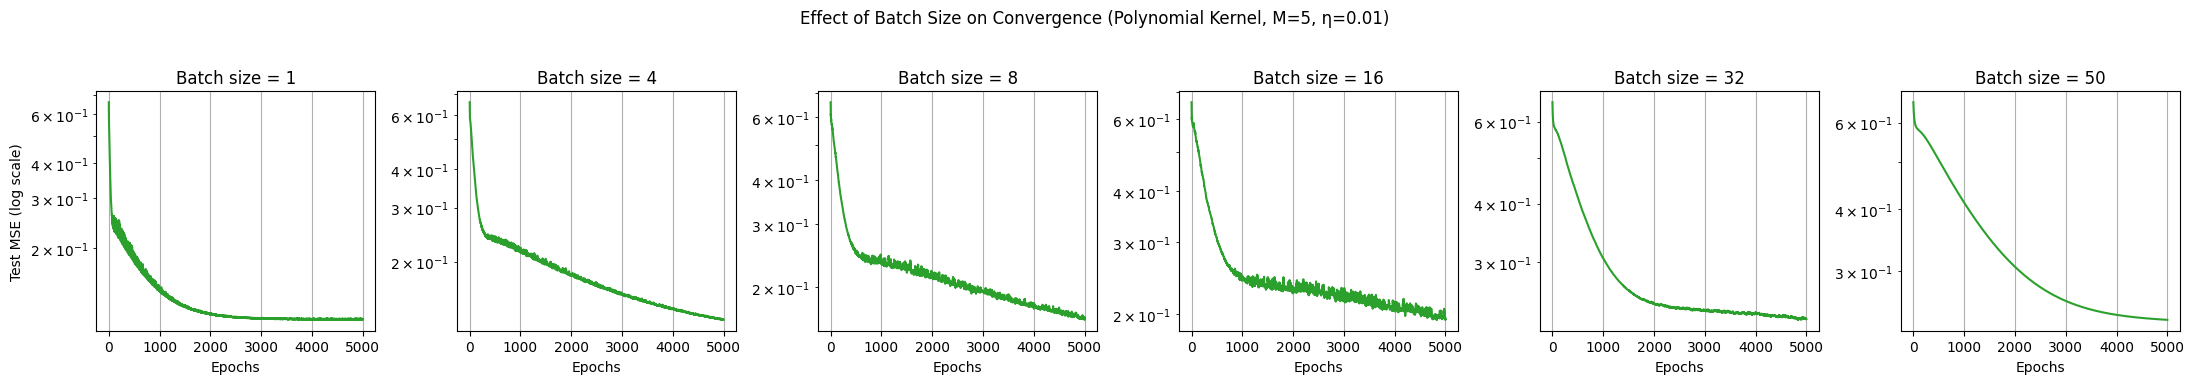

In [ ]:
# Now, to study the effect of batch size on weights, we will focus on a fixed kernel, let that be 'polynomial' and a fixed M = 5 and fixed stepsize=0.001 . We will vary the batchSize

batch_sizes = [1, 4, 8, 16, 32, 50]
all_errors = {}

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}")
    _, _, test_err = training(X_train, Y_train, X_test, Y_test,
                              'polynomial',
                              M=5,
                              epochs=5000,
                              stepSize=0.001,
                              BatchSize=bs,
                              print_epochs=False,
                              plot_=False,
                              return_err=True)
    all_errors[bs] = test_err

# Plotting
fig, axs = plt.subplots(1, len(batch_sizes), figsize=(22, 4))

for i, bs in enumerate(batch_sizes):
    axs[i].semilogy(all_errors[bs], color='tab:green')
    axs[i].set_title(f"Batch size = {bs}")
    axs[i].set_xlabel("Epochs")
    if i == 0:
        axs[i].set_ylabel("Test MSE (log scale)")
    axs[i].grid(True)

plt.suptitle("Effect of Batch Size on Convergence (Polynomial Kernel, M=5, η=0.01)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

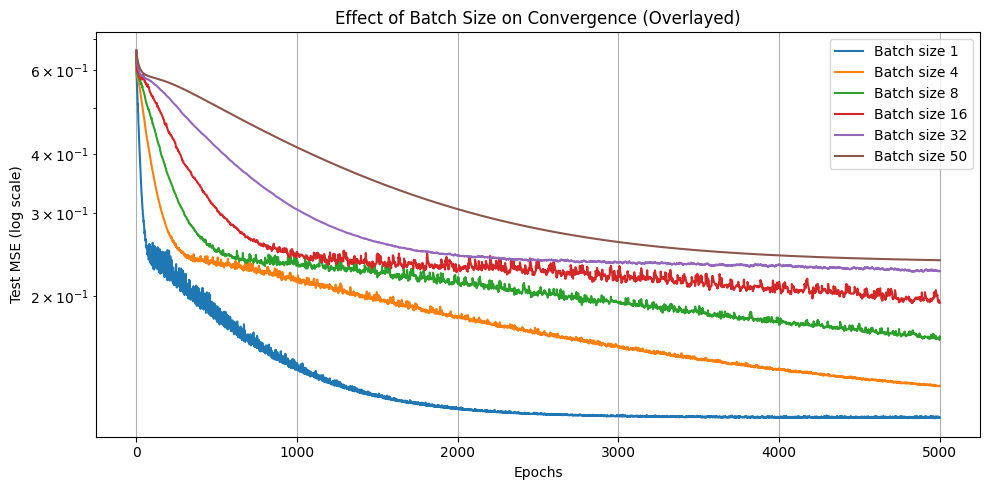

In [ ]:
plt.figure(figsize=(10, 5))
for bs in batch_sizes:
    plt.semilogy(all_errors[bs], label=f'Batch size {bs}')
plt.xlabel("Epochs")
plt.ylabel("Test MSE (log scale)")
plt.title("Effect of Batch Size on Convergence (Overlayed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The plots illustrate the effect of batch size on the convergence behavior. It is evident that smaller batch sizes, particularly batch size 1 (stochastic gradient descent), lead to faster initial convergence due to more frequent weight updates, although the updates are noisier. As the batch size increases, the convergence becomes smoother but slower, with batch sizes like 32 and 50 showing noticeably delayed error reduction over the same number of epochs. This highlights the classic trade-off between the speed and stability of convergence in gradient-based optimization — smaller batches improve responsiveness, while larger batches improve gradient accuracy but require more epochs to achieve similar performance.

**OBSERVATIONS**

1. Convergence of weights to closed form solutions depend on the model complexity. More complex models require slower learning rate and hence, more number of iterations.

2. Small step sizes lead to stable and gradual convergence, while moderately larger step sizes accelerate learning but may introduce fluctuations. Extremely large step sizes result in instability and divergence. Overall, a balanced step size ensures efficient and reliable training in stochastic gradient descent.

3. Smaller batch sizes lead to quicker but noisier convergence due to more frequent updates, while larger batch sizes result in slower yet smoother and more stable convergence. This reflects the classic trade-off: small batches offer responsiveness, large batches offer accuracy.









Method to choose efficient stepSize and batchSize

We can create a matrix with the rows as stepSize and the columns as BatchSize. For each cell in the matrix, we can run the model for a fixed number of epochs, and test its accuracy. We can chose the cell with the highest accuracy.

If during training, gradients or errors become extremely large (a sign of divergence or instability), gradient clipping can be applied.This technique sets a maximum threshold for gradient values.It helps prevent exploding gradients, especially in models using SGD or mini-batch SGD.

Q.5 Understanding the bias-variance trade-off

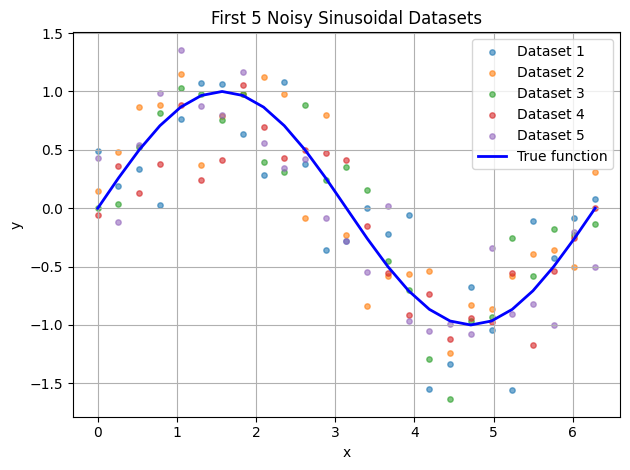

First dataset sample:
          x         y
0  0.000000  0.486288
1  0.261799  0.193566
2  0.523599  0.334038
3  0.785398  0.026854
4  1.047198  0.763762


In [ ]:
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
L = 100
N = 25
noise_std = 0.3
x= np.linspace(0, 2*np.pi, N)
x_norm = x / (2 * np.pi)

# Generating datasets
all_datasets = []
for i in range(L):
    y_true = np.sin(x);
    y_noisy = y_true + np.random.normal(0, noise_std, size=N)
    dataset = np.column_stack((x, y_noisy))
    all_datasets.append((dataset))
    if i < 5:
        plt.scatter(x, y_noisy, s=15, alpha=0.6, label=f'Dataset {i+1}')

plt.plot(x, np.sin(x),  color='blue', linewidth=2.0, label='True function')
plt.title("First 5 Noisy Sinusoidal Datasets")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df_list = [pd.DataFrame(data, columns=['x', 'y']) for data in all_datasets]
print("First dataset sample:")
print(df_list[0].head())

In [ ]:
def gaussian_features_fixed(X, M=24, sigma=0.1):
    centers = np.linspace(0, 1, M)
    features = np.zeros((len(X), M))
    for j in range(M):
        mu_j = centers[j]
        features[:, j] = np.exp(-(X - mu_j)**2 / (2 * sigma**2))
    features = np.hstack([np.ones((len(X), 1)), features])
    return features

In [ ]:
Phi_list = []
Y_list = []
for data in all_datasets:
    x_i = data[:, 0] / (2 * np.pi)
    y_i = data[:, 1]
    Phi_i = gaussian_features_fixed(x_i)
    Phi_list.append(Phi_i)
    Y_list.append(y_i)

In [ ]:
########################################
#Use regularized least squares to estimate w
########################################

def ridge_regression(Phi, y, lam):
    """
    Solves (ΦᵀΦ + λI)w = Φᵀy for w
    """
    M = Phi.shape[1]
    I = np.eye(M)
    return np.linalg.solve(Phi.T @ Phi + lam * I, Phi.T @ y)

lambda_val = 1.0
W_list = [ridge_regression(Phi_list[i], Y_list[i], lambda_val) for i in range(L)]


In [ ]:
x_plot = np.linspace(0, 1, 200)
Phi_plot = gaussian_features_fixed(x_plot)
def plot_dataset(i):
    Phi = Phi_list[i]
    y = Y_list[i]
    w = ridge_regression(Phi, y, lam=0.01)
    y_fit = Phi_plot @ w

    plt.figure(figsize=(7, 3.5))
    plt.scatter(Phi[:, 1], y, alpha=0.5, s=15, color='blue', label='Noisy Data')
    plt.plot(x_plot, y_fit, '-', color='grey', linewidth=2, label=f'Fitted Curve')
    plt.plot(x_plot, np.sin(x_plot * 2 * np.pi), '--', color='black', label='True Function')

    plt.title(f"Ridge Regression Fit | Dataset {i} | λ = 0.01")
    plt.xlabel("x (normalized)")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(plot_dataset, i=(0, L-1));

interactive(children=(IntSlider(value=49, description='i', max=99), Output()), _dom_classes=('widget-interact'…

In [ ]:
# Bias-Variance Curves
def compute_bias_variance(Phi_plot, lam):
    y_preds = np.array([
        Phi_plot @ ridge_regression(Phi_list[i], Y_list[i], lam)
        for i in range(L)
    ])
    y_mean = np.mean(y_preds, axis=0)
    y_true = np.sin(x_plot * 2 * np.pi)
    bias_sq = (y_mean - y_true)**2
    variance = np.var(y_preds, axis=0)
    return bias_sq, variance, y_preds

bias_sq, variance, y_preds = compute_bias_variance(Phi_plot, lam=0.01)

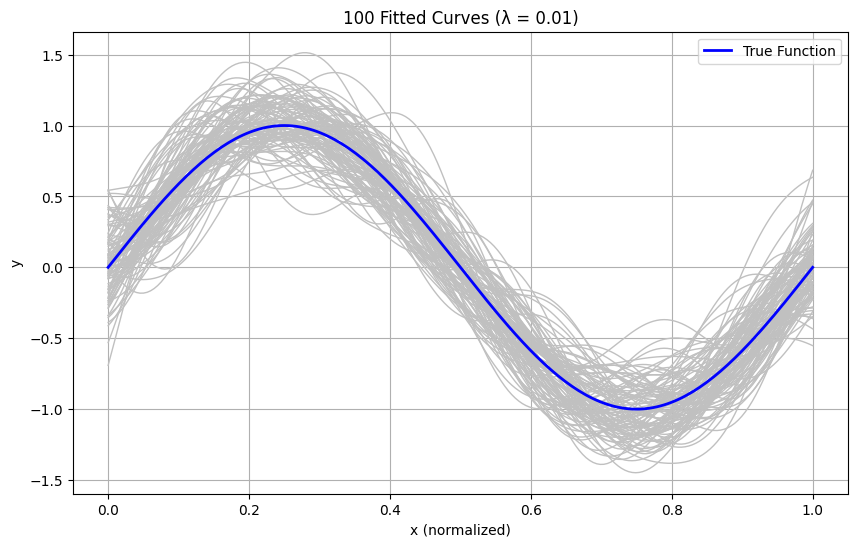

In [ ]:
########################################
#Illustrate the concept of Bias-Variance trade off
########################################

plt.figure(figsize=(10, 6))
for i in range(100):
    Phi_i = Phi_list[i]
    y_i = Y_list[i]

    w_i = ridge_regression(Phi_i, y_i, lam=0.01)
    y_plot_i = Phi_plot @ w_i
    plt.plot(x_plot, y_plot_i, color='silver', linewidth=1)

plt.plot(x_plot, np.sin(x_plot * 2 * np.pi), '-', label='True Function', linewidth=2, color='blue')

plt.title("100 Fitted Curves (λ = 0.01)")
plt.xlabel("x (normalized)")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

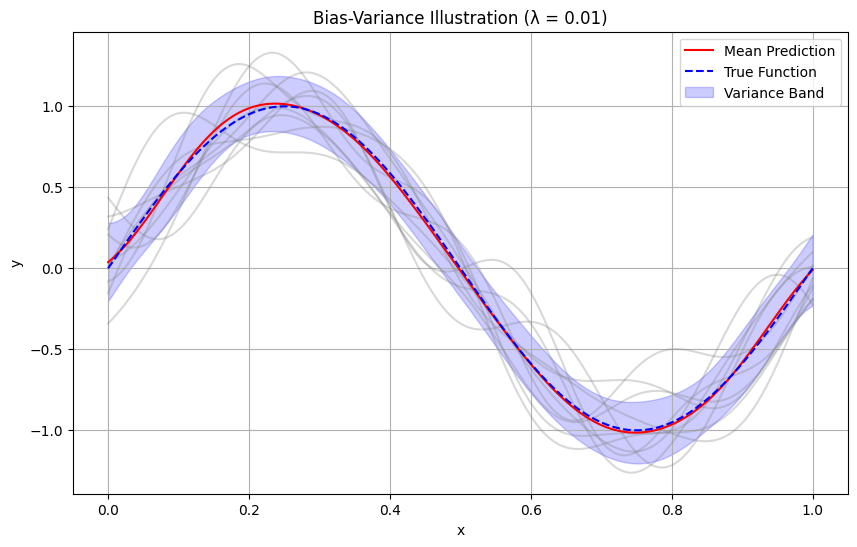

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(0, 100, 10):
    plt.plot(x_plot, y_preds[i], color='gray', alpha=0.3)

plt.plot(x_plot, np.mean(y_preds, axis=0), 'r-', label='Mean Prediction')

plt.plot(x_plot, np.sin(x_plot * 2 * np.pi), 'b--', label='True Function')

plt.fill_between(x_plot, np.mean(y_preds, axis=0) - np.sqrt(variance), np.mean(y_preds, axis=0) + np.sqrt(variance),
                 color='blue', alpha=0.2, label='Variance Band')

plt.title("Bias-Variance Illustration (λ = 0.01)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


The plot above shows 100 fitted curves from ridge regression models trained on different noisy datasets, all using the same λ = 0.01.  
Variance: The spread of the 100 gray curves indicates model variance.The width of the blue shaded area shows how much predictions vary across datasets. Since the curves are relatively close to each other, the variance is moderate.  
Bias: The average prediction(red curve) are close to the true function (blue curve), suggesting low bias.  
This plot demonstrates how models can differ across datasets due to noise, even when trained with the same hyperparameters.


Average total error MSE: 0.1190


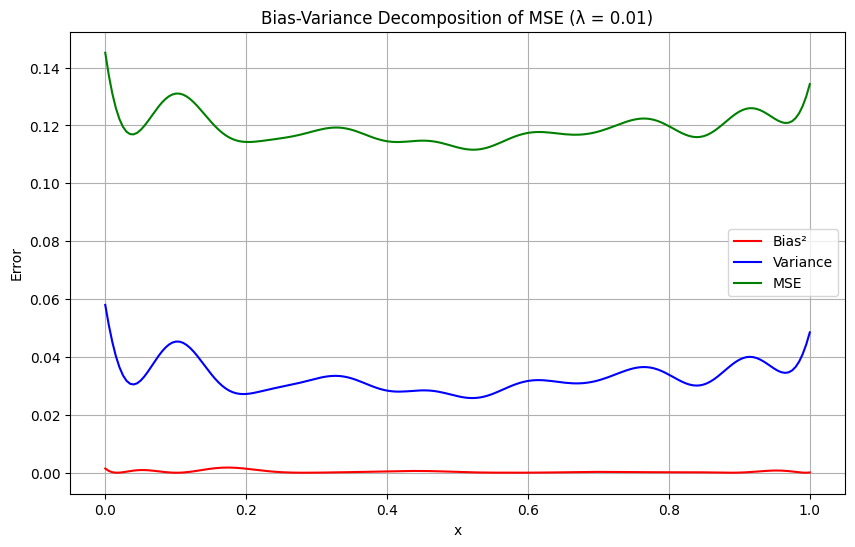

In [ ]:
#Decomposition: Bias² + Var + Noise

estimated_noise_var = np.mean([np.var(Y_list[i] - np.sin(all_datasets[i][:, 0])) for i in range(L)])

mse = bias_sq + variance + estimated_noise_var
total_error = np.mean(mse)
print(f"Average total error MSE: {total_error:.4f}")

# Plot Bias², Variance, and MSE
plt.figure(figsize=(10, 6))
plt.plot(x_plot, bias_sq, label='Bias²', color='red')
plt.plot(x_plot, variance, label='Variance', color='blue')
plt.plot(x_plot, mse, label='MSE', color='green')
plt.title("Bias-Variance Decomposition of MSE (λ = 0.01)")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()



High bias²: Mean prediction is far from true function (underfitting).  
High variance: Predictions vary greatly across datasets (overfitting).  
MSE peaks: Indicate areas where the model performs poorly.

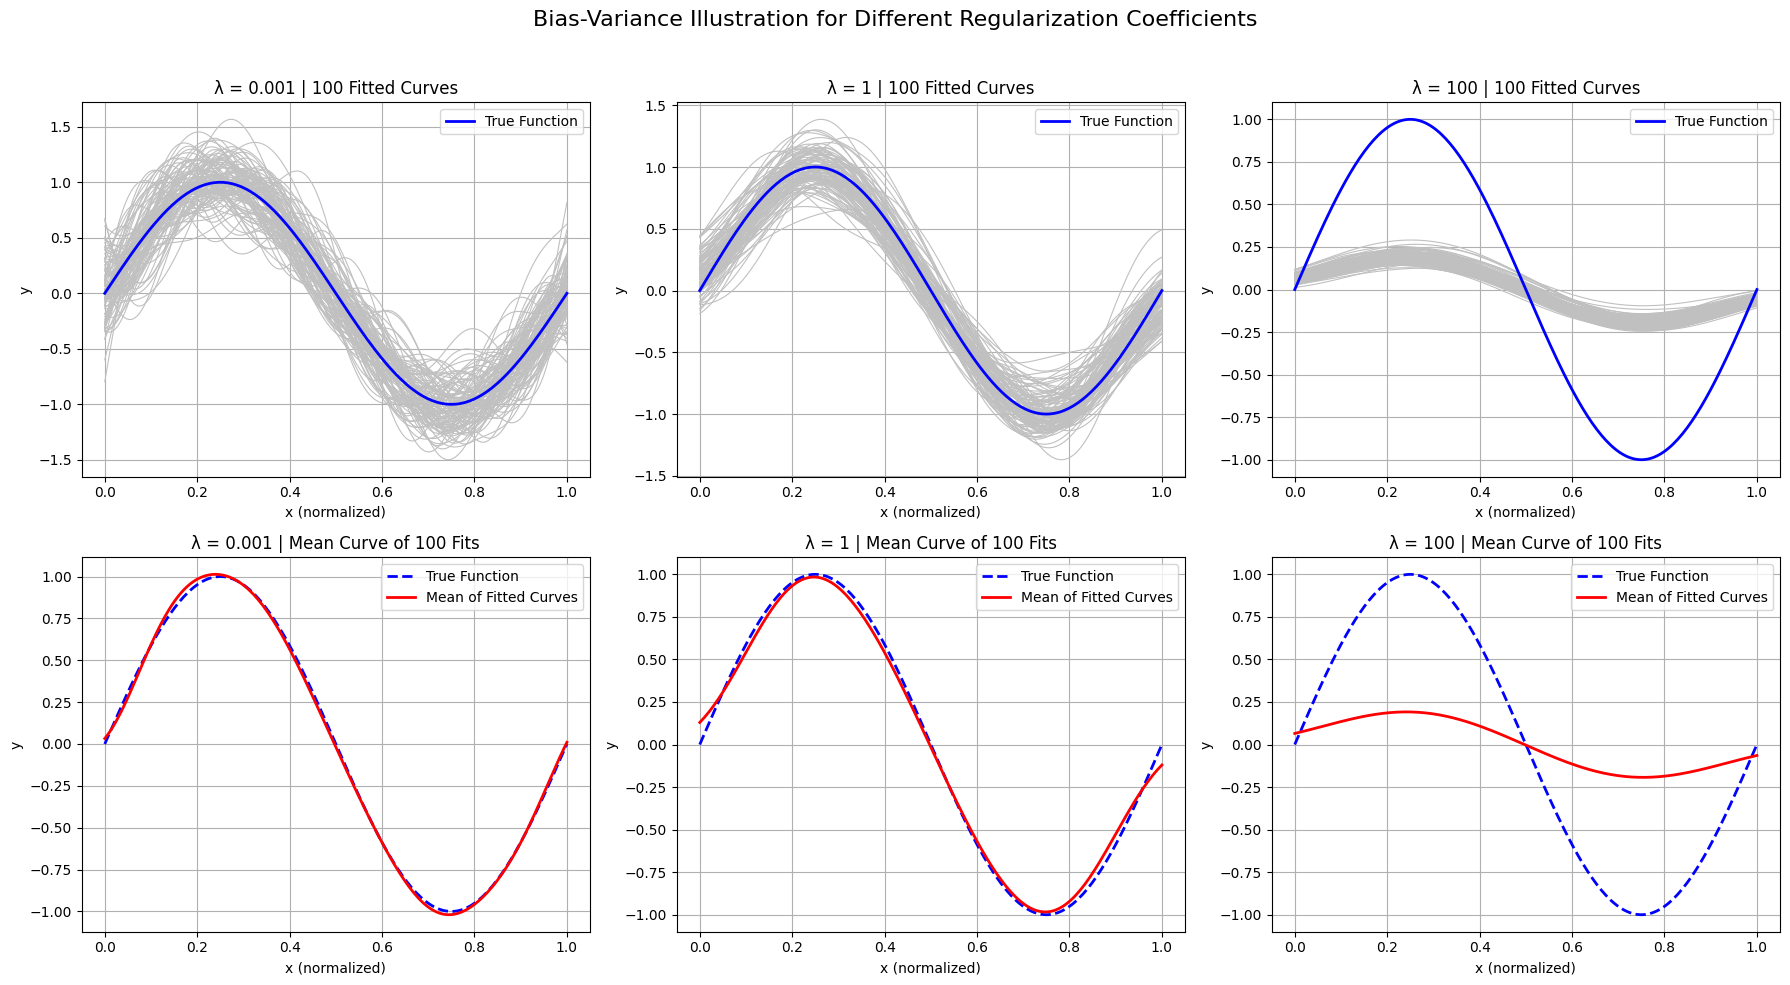

In [ ]:
#1. Chose three different regularization coefficeints (low,middle and high)

lambda_values = [1e-3, 1, 100]  # Low, Medium, High
true_function = np.sin(2 * np.pi * x_plot)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Bias-Variance Illustration for Different Regularization Coefficients", fontsize=16)

for col, lam in enumerate(lambda_values):

    Y_fitted_all = []

    # Plot 100 individual fits
    ax = axes[0, col]
    for i in range(100):
        Phi_i = Phi_list[i]
        y_i = Y_list[i]
        w_i = ridge_regression(Phi_i, y_i, lam=lam)
        y_fit_i = Phi_plot @ w_i
        Y_fitted_all.append(y_fit_i)
        ax.plot(x_plot, y_fit_i, color='silver', linewidth=0.8)

    # Plot true function
    ax.plot(x_plot, true_function, 'b-', label='True Function', linewidth=2)
    ax.set_title(f"λ = {lam} | 100 Fitted Curves")
    ax.set_xlabel("x (normalized)")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()

    # Plot Mean Curve
    ax = axes[1, col]
    Y_fitted_all = np.array(Y_fitted_all)
    y_mean = Y_fitted_all.mean(axis=0)

    ax.plot(x_plot, true_function, 'b--', label='True Function', linewidth=2)
    ax.plot(x_plot, y_mean, 'r-', label='Mean of Fitted Curves', linewidth=2)
    ax.set_title(f"λ = {lam} | Mean Curve of 100 Fits")
    ax.set_xlabel("x (normalized)")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Bias Variance Tradeoff

- The top row shows fitted curves across datasets. It shows variance - the spread of fitted curves indicates how sensitive the model is to dataset variations.

- The bottom row (mean vs trur function) shows bias - the deviation of the average prediction from the true function.

- Effect of Regularization λ:
  - Low λ leads to low bias but high variance.(Overfitting)
  - High λ leads to low variance but high bias. Model is too rigid and underfits the data.

- Mean Squared Error (MSE) Decomposition:
  - MSE = Bias² + Variance + Noise
  - Plotting these components shows that MSE is minimized at an intermediate value of λ, balancing both bias and variance.


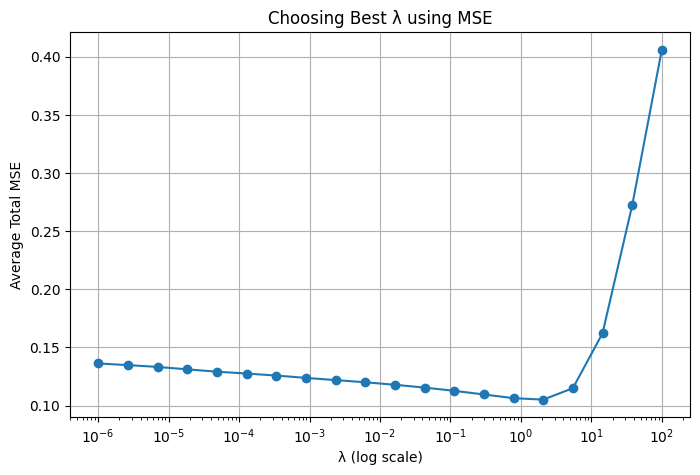

Best λ that minimizes MSE: 2.0691


In [ ]:
lambda_range = np.logspace(-6, 2, 20)  # Try 20 λ values from 1e-6 to 1e2
mse_list = []

for lam in lambda_range:
    bias_sq, variance, _ = compute_bias_variance(Phi_plot, lam)
    mse = bias_sq + variance + estimated_noise_var
    mse_list.append(np.mean(mse))

# Plot MSE vs Lambda
plt.figure(figsize=(8, 5))
plt.plot(lambda_range, mse_list, marker='o')
plt.xscale('log')
plt.xlabel("λ (log scale)")
plt.ylabel("Average Total MSE")
plt.title("Choosing Best λ using MSE")
plt.grid(True)
plt.show()

# Find λ that gives minimum MSE
best_lambda = lambda_range[np.argmin(mse_list)]
print(f"Best λ that minimizes MSE: {best_lambda:.4f}")


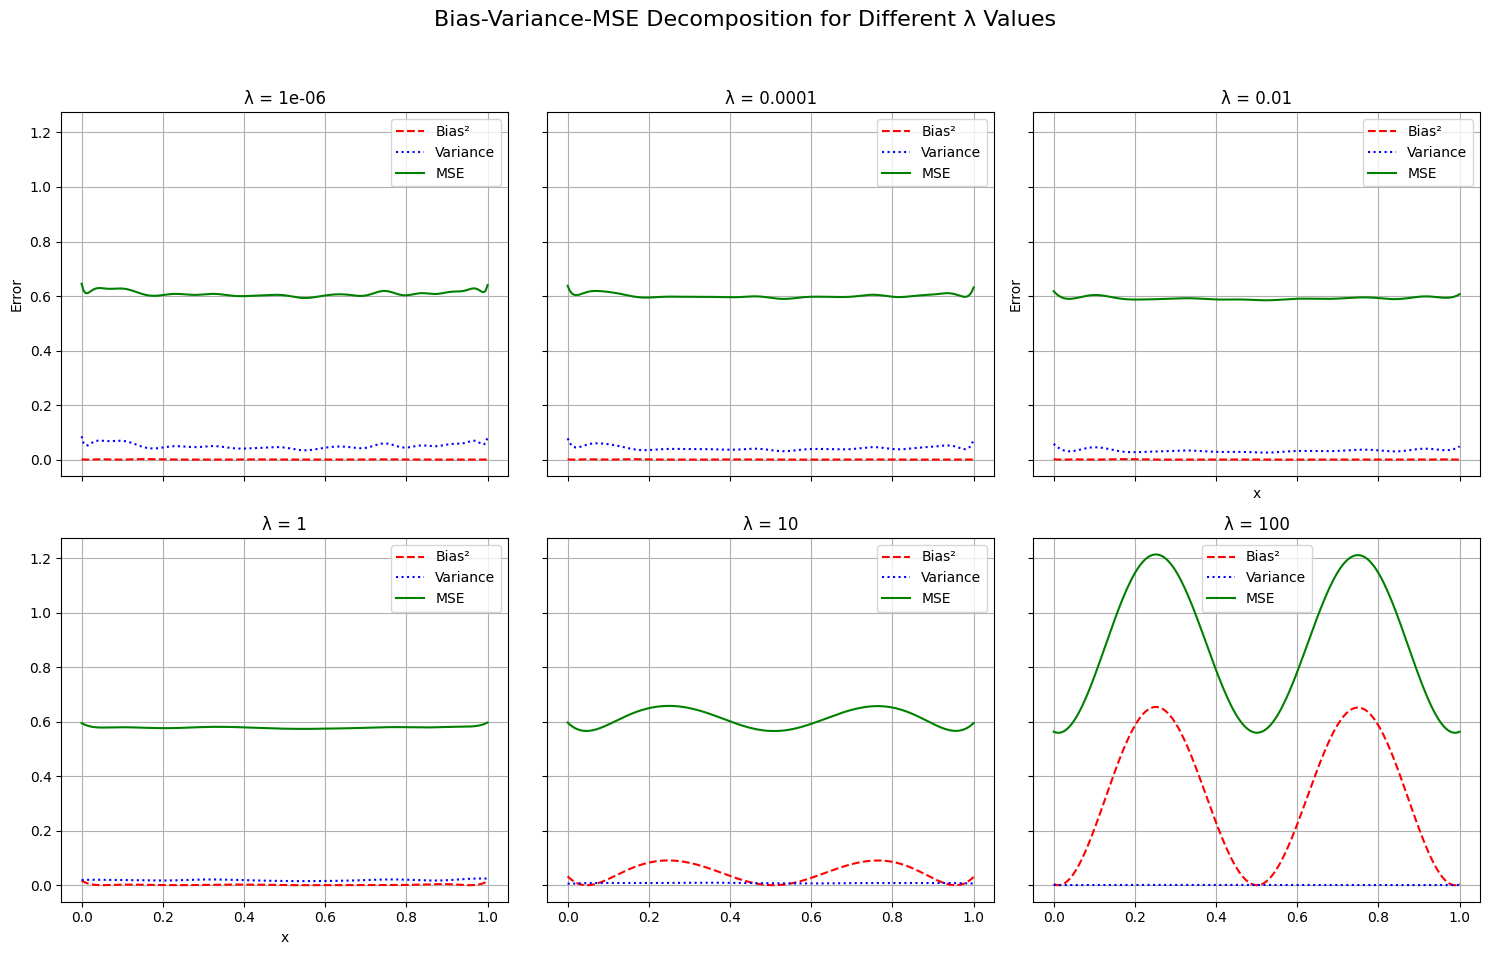

In [ ]:
#same graph as above , just divided into 4
lambda_values = [1e-6, 1e-4, 1e-2, 1, 10, 100]
titles = [f"λ = {lam}" for lam in lambda_values]
colors = {'Bias²': 'red', 'Variance': 'blue', 'MSE': 'green'}

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

# Estimate constant noise variance across datasets
estimated_noise_var = np.mean([
    np.var(Y_list[i] - np.sin(Phi_list[i][:, 1] * 2 * np.pi))
    for i in range(100)
])

for idx, (lam, ax) in enumerate(zip(lambda_values, axes.flat)):
    bias_sq, variance, y_preds = compute_bias_variance(Phi_plot, lam)
    mse = bias_sq + variance + estimated_noise_var

    ax.plot(x_plot, bias_sq, label='Bias²', color=colors['Bias²'], linestyle='--')
    ax.plot(x_plot, variance, label='Variance', color=colors['Variance'], linestyle=':')
    ax.plot(x_plot, mse, label='MSE', color=colors['MSE'], linestyle='-')

    ax.set_title(titles[idx])
    ax.grid(True)
    ax.legend()
    if idx in [2, 3]:
        ax.set_xlabel("x")
    if idx in [0, 2]:
        ax.set_ylabel("Error")

fig.suptitle("Bias-Variance-MSE Decomposition for Different λ Values", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
def plot_bias_variance(lambda_exp):
    lam = 10 ** lambda_exp
    bias_sq, variance, _ = compute_bias_variance(Phi_plot, lam)
    mse = bias_sq + variance + estimated_noise_var

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, bias_sq, label='Bias²', color='red')
    plt.plot(x_plot, variance, label='Variance', color='blue')
    plt.plot(x_plot, mse, label='MSE (Bias² + Var + Noise)', color='green')
    plt.title(f"Bias-Variance Decomposition (λ = 10^{lambda_exp})")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.show()

interact(plot_bias_variance, lambda_exp=(-4.0, 2.0, 0.5));


interactive(children=(FloatSlider(value=-1.0, description='lambda_exp', max=2.0, min=-4.0, step=0.5), Output()…

Observations on Bias-Variance Tradeoff   

In this experiment, we explored the effect of the regularization parameter (λ) in ridge regression on model performance. Using 100 datasets with noisy observations and a fixed feature mapping (Gaussian basis), we estimated bias², variance, and MSE for different values of λ.   

**Observations**    

1. For Low Regularization (λ ≈ 1e-6 - 0.01):  
The model closely fits each dataset, resulting in low bias but higher variance.  
Predictions vary significantly between datasets, which leads to overfitting.  

2. Moderate Regularization (λ ≈ 1.0):  
A balance is achieved between bias and variance.  
MSE is minimized around this point.  

3. High Regularization (λ ≈ 10.0 or more):  
The model becomes overly smooth, failing to capture the true function well.  
This increases bias, while variance decreases drastically and leads to leads to underfitting.

Why Gaussian Basis Functions Were Used  
1. Localized: Only affect nearby input regions.  
2. Smooth & nonlinear: Capture patterns like sinusoids effectively.  
3. They avoid issues like wild oscillations common in high-degree polynomials.   
4. Improve interpretability and local fitting flexibility.

Hence they are well-suited for studying bias-variance behavior in controlled regions.


Q.6 Exploring Maximum a Posteriori (MAP) Estimation

In [ ]:
from scipy import stats

In [ ]:
#########################################
# Generate 100 data points of noisy sinusoidal data
#########################################

def generate_sinusoidal_data(n_points=100, noise_var=0.1):
    x = np.linspace(0, 1, n_points)
    noise = np.random.normal(0, np.sqrt(noise_var), n_points)
    t = np.sin(2 * np.pi * x) + noise
    return x, t

# Generate dataset
X, T = generate_sinusoidal_data(100, 0.1)

In [ ]:
#########################################
# Gaussian basis functions and design matrix
#########################################
M = 20  # 20th-order model-> 21 basis functions (including bias)
mu = np.linspace(0, 1, M)

def gaussian_basis_functions(x, mu, s= 0.1):
    s = (np.max(x) - np.min(x)) / M * 2
    s = np.where(s == 0, 1e-8, s)
    return np.exp(-0.5 * ((x[:, np.newaxis] - mu[np.newaxis, :]) / s) ** 2)

def create_design_matrix(x, mu, include_bias=True):
    phi = gaussian_basis_functions(x, mu)
    if include_bias:
        phi = np.hstack([np.ones((x.shape[0], 1)), phi])
    return phi

Phi = create_design_matrix(X, mu)
N, M_plus_1 = Phi.shape

In [ ]:
#########################################
# Update the statistics of posterior density
#########################################

# Initialize parameters for standard normal prior
alpha = 1.0  # prior precision
beta = 1.0 / 0.1  # noise precision (inverse variance)

# Initialise the parameters for standard normal priors
S0_inv = alpha * np.eye(M_plus_1)
m0 = np.zeros(M_plus_1)

In [ ]:
#########################################
# Sequential Bayesian update
#########################################

def sequential_bayesian_update(phi_n, t_n, S_prev_inv, m_prev):
    S_new_inv = S_prev_inv + beta * np.outer(phi_n, phi_n)
    S_new = np.linalg.inv(S_new_inv)
    m_new = S_new @ (S_prev_inv @ m_prev + beta * t_n * phi_n)
    return S_new_inv, S_new, m_new

S_inv_history = [S0_inv.copy()]
S_history = [np.linalg.inv(S0_inv)]
m_history = [m0.copy()]
S_current_inv = S0_inv.copy()
m_current = m0.copy()

for i in range(N):
    phi_n = Phi[i, :]
    t_n = T[i]
    S_current_inv, S_current, m_current = sequential_bayesian_update(phi_n, t_n, S_current_inv, m_current)
    S_inv_history.append(S_current_inv.copy())
    S_history.append(S_current.copy())
    m_history.append(m_current.copy())

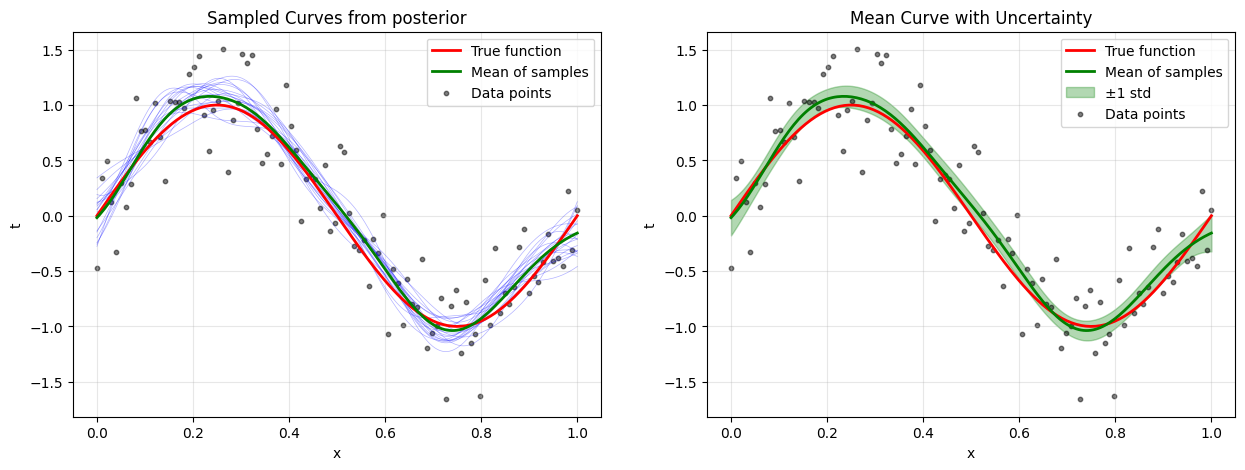

In [ ]:
#########################################
# Sampling weight vector from posterior distribution
#########################################

def sample_from_posterior(m, S, n_samples=1):
    return np.random.multivariate_normal(m, S, n_samples)

def predict_with_weights(w, x_test, mu):
    phi_test = create_design_matrix(x_test, mu)
    return phi_test @ w

x_test = np.linspace(0, 1, 200)
true_function = np.sin(2 * np.pi * x_test)
final_m = m_history[-1]
final_S = S_history[-1]
n_curve_samples = 100

sampled_curves = []
for i in range(n_curve_samples):
    w_sample = sample_from_posterior(final_m, final_S, 1)[0]
    y_pred = predict_with_weights(w_sample, x_test, mu)
    sampled_curves.append(y_pred)

sampled_curves = np.array(sampled_curves)
mean_curve = np.mean(sampled_curves, axis=0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i in range(20):
    plt.plot(x_test, sampled_curves[i], 'b-', alpha=0.3, linewidth=0.5)
plt.plot(x_test, true_function, 'r-', linewidth=2, label='True function')
plt.plot(x_test, mean_curve, 'g-', linewidth=2, label='Mean of samples')
plt.scatter(X, T, color='black', s=10, alpha=0.5, label='Data points')
plt.title('Sampled Curves from posterior')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_test, true_function, 'r-', linewidth=2, label='True function')
plt.plot(x_test, mean_curve, 'g-', linewidth=2, label='Mean of samples')
plt.fill_between(x_test,
                mean_curve - np.std(sampled_curves, axis=0),
                mean_curve + np.std(sampled_curves, axis=0),
                alpha=0.3, color='green', label='±1 std')
plt.scatter(X, T, c='black', s=10, alpha=0.5, label='Data points')
plt.title('Mean Curve with Uncertainty')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
#########################################
# Predictive distribution analysis
#########################################

def predictive_distribution(x_star, phi_star, m, S, beta):
    mean = phi_star @ m
    var = 1 / beta + phi_star @ S @ phi_star.T
    return mean, var

x_star = 0.5
phi_star = create_design_matrix(np.array([x_star]), mu).flatten()
data_points_to_analyze = [10, 25, 50, 75, 100]

predictive_means = []
predictive_vars = []

for n_data in data_points_to_analyze:
    idx = min(n_data, len(m_history) - 1)
    m_n = m_history[idx]
    S_n = S_history[idx]
    mean_pred, var_pred = predictive_distribution(x_star, phi_star, m_n, S_n, beta)
    predictive_means.append(mean_pred)
    predictive_vars.append(var_pred)

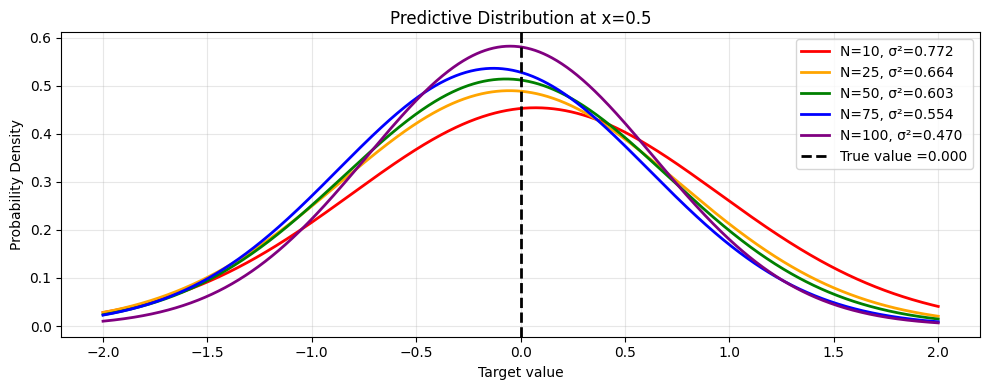

In [ ]:
plt.figure(figsize=(10, 4))
x_vals = np.linspace(-2, 2, 1000)
colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, (n_data, mean, var) in enumerate(zip(data_points_to_analyze, predictive_means, predictive_vars)):
    std = np.sqrt(var)
    pdf = stats.norm.pdf(x_vals, mean, std)
    plt.plot(x_vals, pdf, color=colors[i], linewidth=2, label=f'N={n_data}, σ²={var:.3f}')

true_value_at_star = np.sin(2 * np.pi * x_star)
plt.axvline(true_value_at_star, color='black', linestyle='--', linewidth=2, label=f'True value ={true_value_at_star:.3f}')
plt.title(f'Predictive Distribution at x={x_star}')
plt.xlabel('Target value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


1. **Uncertainty reduces with more data**  
   As training size increases (N=10 to N=100), the predictive variance shrinks significantly, especially between N=10 and N=25, reflecting rapid early learning.

2. **Predictive accuracy improves**  
   The predictive mean aligns more closely with the true function value at `x = 0.5` as N increases, with the true value consistently moving closer to the mode of the distribution.

3. **Model confidence saturates at higher N**  
   Beyond N=75, additional data yields diminishing returns — the predictive distribution becomes only marginally narrower, indicating stabilized learning.


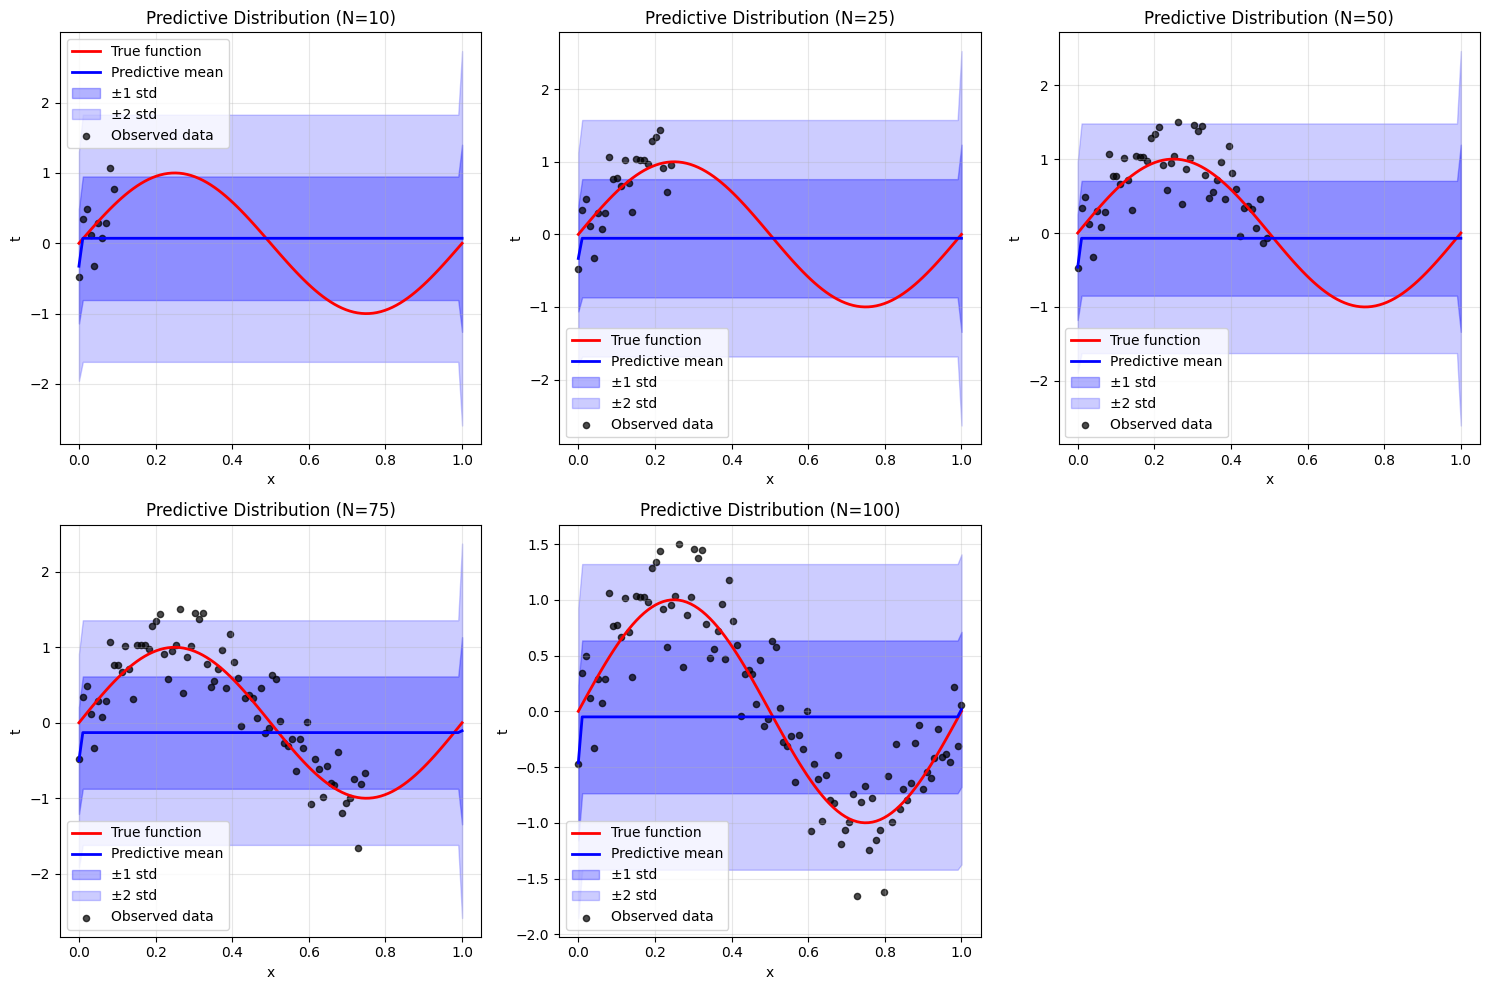

In [ ]:
# Detailed analysis of predictive distributions across input space
plt.figure(figsize=(15, 10))

# Create a grid of test points
x_test_grid = np.linspace(0, 1, 100)

for subplot_idx, n_data in enumerate([10, 25, 50, 75, 100]):
    plt.subplot(2, 3, subplot_idx + 1)

    idx = min(n_data, len(m_history) - 1)
    m_n = m_history[idx]
    S_n = S_history[idx]

    # Compute predictive mean and variance for all test points
    pred_means = []
    pred_stds = []

    for x_val in x_test_grid:
        phi_test = create_design_matrix(np.array([x_val]), mu).flatten()
        mean_pred, var_pred = predictive_distribution(x_val, phi_test, m_n, S_n, beta)
        pred_means.append(mean_pred)
        pred_stds.append(np.sqrt(var_pred))

    pred_means = np.array(pred_means)
    pred_stds = np.array(pred_stds)

    # Plot true function
    plt.plot(x_test_grid, np.sin(2 * np.pi * x_test_grid), 'r-', linewidth=2, label='True function')

    # Plot predictive mean
    plt.plot(x_test_grid, pred_means, 'b-', linewidth=2, label='Predictive mean')

    # Plot uncertainty bounds
    plt.fill_between(x_test_grid,
                    pred_means - pred_stds,
                    pred_means + pred_stds,
                    alpha=0.3, color='blue', label='±1 std')

    plt.fill_between(x_test_grid,
                    pred_means - 2*pred_stds,
                    pred_means + 2*pred_stds,
                    alpha=0.2, color='blue', label='±2 std')

    # Plot observed data points
    if n_data < len(X):
        plt.scatter(X[:n_data], T[:n_data], c='black', s=20, alpha=0.7, label='Observed data')
    else:
        plt.scatter(X, T, c='black', s=20, alpha=0.7, label='Observed data')

    plt.title(f'Predictive Distribution (N={n_data})')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### Observations from Predictive Distributions

1. **Uncertainty reduces with increasing data**  
   The shaded uncertainty bands (±1σ and ±2σ) are wide when only 10–25 points are used but become progressively narrower with 50, 75, and 100 data points — confirming that model confidence increases as more data becomes available.

2. **Better alignment with the true function**  
   With 75 and 100 training points, the predictive mean (blue line) closely follows the true sinusoidal function (red line), whereas with fewer points, it deviates more — especially in less observed regions like the middle and right.

3. **Uncertainty highest in data-sparse regions**  
   For smaller training sizes, variance is especially high where data is sparse (e.g., right end of plots for N=10, 25). As more points cover the input space, especially near \( x = 0.5 \) and beyond, uncertainty visibly drops.


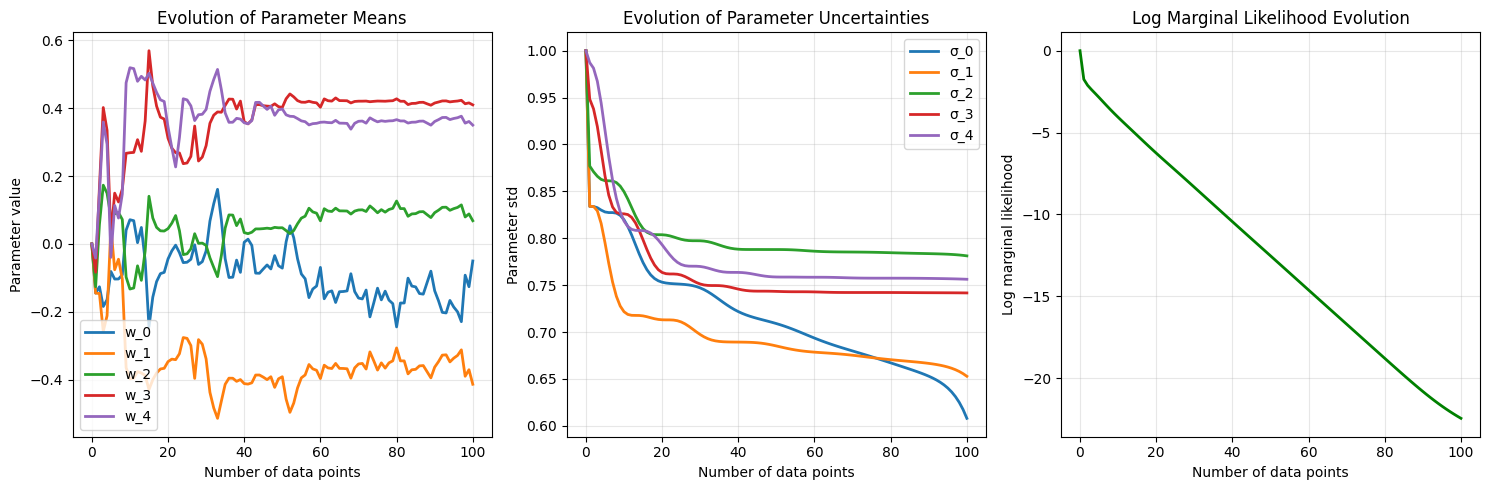

In [ ]:
# Analysis of parameter evolution
plt.figure(figsize=(15, 5))

# Plot evolution of first few parameters
plt.subplot(1, 3, 1)
n_params_to_plot = min(5, M_plus_1)
for i in range(n_params_to_plot):
    param_evolution = [m[i] for m in m_history]
    plt.plot(range(len(param_evolution)), param_evolution,
             linewidth=2, label=f'w_{i}')
plt.title('Evolution of Parameter Means')
plt.xlabel('Number of data points')
plt.ylabel('Parameter value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot evolution of parameter uncertainties (diagonal of covariance)
plt.subplot(1, 3, 2)
for i in range(n_params_to_plot):
    param_std_evolution = [np.sqrt(S[i, i]) for S in S_history]
    plt.plot(range(len(param_std_evolution)), param_std_evolution,
             linewidth=2, label=f'σ_{i}')
plt.title('Evolution of Parameter Uncertainties')
plt.xlabel('Number of data points')
plt.ylabel('Parameter std')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot log marginal likelihood evolution (model evidence)
plt.subplot(1, 3, 3)
log_marginal_likelihoods = []
for i in range(len(m_history)):
    if i == 0:
        log_ml = 0  # Prior
    else:
        # Approximate log marginal likelihood
        S_inv = S_inv_history[i]
        m = m_history[i]
        log_ml = -0.5 * (np.linalg.slogdet(S_inv)[1] - np.linalg.slogdet(S0_inv)[1])
    log_marginal_likelihoods.append(log_ml)

plt.plot(range(len(log_marginal_likelihoods)), log_marginal_likelihoods,
         'g-', linewidth=2)
plt.title('Log Marginal Likelihood Evolution')
plt.xlabel('Number of data points')
plt.ylabel('Log marginal likelihood')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Observations from Parameter Evolution

1. **Stabilization of parameter means with more data**  
   As training data increases, the mean estimates of parameters (w₀ to w₄) gradually stabilize, indicating convergence of the posterior toward true underlying weights.

2. **Reduction in parameter uncertainty**  
   The standard deviations of parameters (√diag(S)) decrease steadily with data size, showing increasing model confidence in the learned weights.

3. **Log marginal likelihood increases initially**  
   The log marginal likelihood (model evidence) grows rapidly at first, then saturates — implying that new data improves model fit early on, with diminishing returns as data becomes abundant.


**OBSERVATIONS**

1. As more data is observed, the MAP estimates of parameters converge, with their mean values stabilizing and uncertainty (standard deviation) reducing — indicating the model is learning more confidently.

2. The posterior distribution narrows significantly with increasing data, particularly in early stages, reflecting higher certainty in parameter values and less reliance on the prior.

3. With more training points, the MAP-based predictive mean closely tracks the true function, and the predictive uncertainty shrinks — especially in regions previously data-sparse.